**Table of contents**<a id='toc0_'></a>    
- [Functions](#toc1_)    
  - [Compare distributions between BI and STAN](#toc1_1_)    
  - [Load BI for R](#toc1_2_)    
  - [Load BI](#toc1_3_)    
- [Rethinking](#toc2_)    
  - [Continuous variable: Model (model 4.3)](#toc2_1_)    
    - [BI](#toc2_1_1_)    
    - [BIR](#toc2_1_2_)    
    - [STAN](#toc2_1_3_)    
    - [Output comparison](#toc2_1_4_)    
    - [Parameter recovery](#toc2_1_5_)    
  - [Categorical variable: Model (model 5.9)](#toc2_2_)    
    - [BI](#toc2_2_1_)    
    - [BIR](#toc2_2_2_)    
    - [STAN](#toc2_2_3_)    
    - [Output comparaison](#toc2_2_4_)    
    - [Parameter recovery](#toc2_2_5_)    
  - [Continuous interactions terms (model 8.3)](#toc2_3_)    
    - [BI](#toc2_3_1_)    
    - [BIR](#toc2_3_2_)    
    - [STAN](#toc2_3_3_)    
    - [Output comparison](#toc2_3_4_)    
    - [Parameter recovery](#toc2_3_5_)    
  - [Binomial (model 11.1)](#toc2_4_)    
    - [BI](#toc2_4_1_)    
    - [BIR](#toc2_4_2_)    
    - [STAN](#toc2_4_3_)    
    - [Output comparison](#toc2_4_4_)    
    - [Parameter recovery](#toc2_4_5_)    
  - [Binomial with indices (model 11.4)](#toc2_5_)    
    - [BI](#toc2_5_1_)    
    - [BIR](#toc2_5_2_)    
    - [STAN](#toc2_5_3_)    
    - [Output comparison](#toc2_5_4_)    
    - [Parameter recovery](#toc2_5_5_)    
  - [Poisson (model 11.10)](#toc2_6_)    
    - [BI](#toc2_6_1_)    
    - [BIR](#toc2_6_2_)    
    - [STAN](#toc2_6_3_)    
    - [Output comparison](#toc2_6_4_)    
    - [Parameter recovery](#toc2_6_5_)    
  - [Negative binomial (model 11.12)](#toc2_7_)    
    - [Simulated data](#toc2_7_1_)    
    - [BI](#toc2_7_2_)    
    - [BIR](#toc2_7_3_)    
    - [STAN](#toc2_7_4_)    
    - [Output comparison](#toc2_7_5_)    
    - [Parameter recovery](#toc2_7_6_)    
  - [Multinomial (model 11.13)](#toc2_8_)    
    - [Simulated data](#toc2_8_1_)    
    - [BI](#toc2_8_2_)    
    - [BIR](#toc2_8_3_)    
    - [STAN](#toc2_8_4_)    
    - [Output comparison](#toc2_8_5_)    
    - [Parameter recovery](#toc2_8_6_)    
  - [Beta binomial (model m12.1)](#toc2_9_)    
    - [BI](#toc2_9_1_)    
    - [BIR](#toc2_9_2_)    
    - [STAN](#toc2_9_3_)    
    - [Output comparison](#toc2_9_4_)    
    - [Parameter recovery](#toc2_9_5_)    
  - [Zero inflated outcomes](#toc2_10_)    
    - [BI](#toc2_10_1_)    
    - [BIR](#toc2_10_2_)    
    - [STAN](#toc2_10_3_)    
    - [Output comparison](#toc2_10_4_)    
    - [Parameter recovery](#toc2_10_5_)    
  - [OrderedLogistic (Todo: PB)](#toc2_11_)    
  - [Varying interceps](#toc2_12_)    
    - [BI](#toc2_12_1_)    
    - [BIR](#toc2_12_2_)    
    - [STAN](#toc2_12_3_)    
    - [Output comparison](#toc2_12_4_)    
    - [Parameter recovery](#toc2_12_5_)    
  - [Varying effects](#toc2_13_)    
    - [Data simulation](#toc2_13_1_)    
    - [BI](#toc2_13_2_)    
    - [BIR](#toc2_13_3_)    
    - [STAN](#toc2_13_4_)    
    - [Output comparison](#toc2_13_5_)    
    - [Parameter recovery](#toc2_13_6_)    
  - [Gaussian Processes](#toc2_14_)    
    - [BI](#toc2_14_1_)    
    - [BIR](#toc2_14_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Functions](#toc0_)
## <a id='toc1_1_'></a>[Compare distributions between BI and STAN](#toc0_)

In [1]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi

import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax

m = bi(platform='cpu')
data_path = os.path.dirname(os.path.abspath("")) + "/BI/resources/data/"

jax.local_device_count 32


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_bi_data(m):
    #data_dict = m.sampler.get_samples()
    data_dict = m.posteriors
    # Initialize an empty DataFrame to collect parameters
    all_params = []

    # Loop through each array in the dictionary
    for key, array in data_dict.items():
        # Check the shape of the array
        if array.ndim > 1 and array.ndim < 3:
            # Create a DataFrame from the array and add a column for each parameter
            param_df = pd.DataFrame(array)
            # Rename columns to include the parameter name
            param_df.columns = [f"{key}_{j+1}" for j in range(array.shape[1])]
            all_params.append(param_df)
    
        elif array.ndim >= 3:# we have a matrix
            array_shape = array.shape
            row = array_shape[1]
            col = array_shape[2]
            for a in range(col):
                for b in range(row):
                    all_params.append(pd.DataFrame({key + '_' + str(a) +  '_' + str(b): array[:,a,b]}))
        else:
            # If it's a 1D array, create a single column DataFrame
            all_params.append(pd.DataFrame({key: array}))

    # Concatenate all parameter DataFrames along the rows
    df_bi = pd.concat(all_params, axis=1)
    return df_bi

def prepare_stan_data(df):
    columns_to_remove = ['lp__',	'accept_stat__',	'stepsize__',	'treedepth__',	'n_leapfrog__',	'divergent__',	'energy__']
    d = df.drop(columns=columns_to_remove)
    return d

def combine_data(df_bi, d):
    #df_bi = pd.DataFrame(samples)
    params = df_bi.columns.values
    d.columns = df_bi.columns

    df_bi['method'] = 'BI'
    d['method'] = 'STAN'
    d_comb = pd.concat([d, df_bi], ignore_index=True)
    return d_comb

def plot_comparaison(m, df):

    d = prepare_stan_data(df)
    df_bi = prepare_bi_data(m)
    d_comb = combine_data(df_bi, d)

    # Calculate the number of rows needed
    params = df_bi.columns.values[:-1]
    num_params = len(params)
    num_cols = 3
    num_rows = (num_params + num_cols - 1) // num_cols  # Ceiling division

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5), sharey=True)
    if num_rows * num_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    a = 0

    for i in d_comb.columns:
        if i in params:
            if a == 0:
                axes[a].set_ylabel('Density')
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=True)
                axes[a].spines['right'].set_visible(False)
                a += 1
            elif a == num_params:
                print('found')
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=True)
                a += 1
            elif a < num_params:
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=False)
                a += 1


    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9)
    axes[1].set_yticks([])

    # Remove extra subplots if there are any
    for a in range(len(params), len(axes)):
        fig.delaxes(axes[a])

    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9)
    axes[1].set_yticks([])
    plt.show()
    return plt


## <a id='toc1_2_'></a>[Load BI for R](#toc0_)

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
#devtools::install_github("https://github.com/BGN-for-ASNA/BIR.git", force = T)
library(BayesianInference)
library(reticulate)
jnp = import("jax.numpy")
jax = import("jax")
m=importBI()


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    jax.local_device_count 16


Virtual environment ('BayesInference') is available.

----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


## <a id='toc1_3_'></a>[Load BI](#toc0_)

# <a id='toc2_'></a>[Rethinking](#toc0_)

## <a id='toc2_1_'></a>[Continuous variable: Model (model 4.3)](#toc0_)

### <a id='toc2_1_1_'></a>[BI](#toc0_)

In [2]:
import time as tm

# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data(data_path + 'Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])


# define model ------------------------------------------------
def model(weight, height):    
    alpha = m.dist.normal( 178, 20, name = 'a')
    beta = m.dist.log_normal( 0, 1, name = 'b')   
    sigma = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(alpha + beta * weight , sigma, obs=height)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500) 
m.latex()
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1275.07it/s, 7 steps of size 7.35e-01. acc. prob=0.93]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a  154.64  0.26    154.27     155.14       0.01     0.01    422.23    407.54   
b    5.82  0.29      5.40       6.31       0.02     0.01    376.62    356.33   
s    5.15  0.20      4.81       5.47       0.01     0.01    446.91    333.97   

   r_hat  
a    NaN  
b    NaN  
s    NaN

### BIR

In [5]:
%%R
data_path = '/home/sosa/work/BI/BI/resources/data/'
m=importBI(platform='cpu')

# Load csv file
m$data(paste0(data_path,'Howell1.csv'), sep=';')

# fileter data frame
m$df = m$df[m$df$age > 18,]

# Scale
m$scale(list('weight')) 

# convert data to jax arrays
m$data_to_model(list('weight', 'height'))

# Define model ------------------------------------------------
model <- function(height, weight){
  # Parameters priors distributions
  s = bi.dist.uniform(0, 50, name = 's')
  a = bi.dist.normal(178, 20,  name = 'a')
  b = bi.dist.log_normal(0, 1, name = 'b')
  
  # Likelihood
  bi.dist.normal(a + b * weight, s, obs = height)
}

# Run mcmc ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 788.25it/s, 3 steps of size 7.44e-01. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


    mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail r_hat
a 154.66 0.28   154.26    155.12      0.01    0.01   398.91   381.14   NaN
b   5.80 0.29     5.34      6.24      0.02    0.01   396.56   259.25   NaN
s   5.17 0.21     4.87      5.53      0.01    0.01   388.44   314.86   NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_1_3_'></a>[STAN](#toc0_)

In [7]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
nest_asyncio.apply()
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass
stan_code = """
data{
  vector[346] height;
  vector[346] weight;
}
parameters{
  real a;
  real<lower=0> b;
  real<lower=0,upper=50> s;
}
model{
  vector[346] mu;
  s ~ uniform( 0 , 50 );
  b ~ lognormal( 0 , 1 );
  a ~ normal( 178 , 20 );
  for ( i in 1:346 ) {
    mu[i] = a + b* weight[i] ;
  }
  height ~ normal( mu , s );  
  
}
"""
data = {
  'height': m.df.height.values,
  'weight': m.df.weight.values,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_o3i86p46/model_cmjcmbv2.stan', line 15, column 20: Argument
    20 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_o3i86p46/model_cmjcmbv2.stan', line 15, column 14: Argument
    178 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_o3i86p46/model_cmjcmbv2.stan', line 13, column 19: Argument
    50 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
    its declaration. These hard constraints are not recommended, for two
    reasons: (a) Except when there are logical or physical constraints, it is
    very unusual for you to be sure that a parameter will fall inside a
    specified range, and (b) The infinite gradient induced by a

Pystan took: 0.9038 seconds


### <a id='toc2_1_4_'></a>[Output comparison](#toc0_)

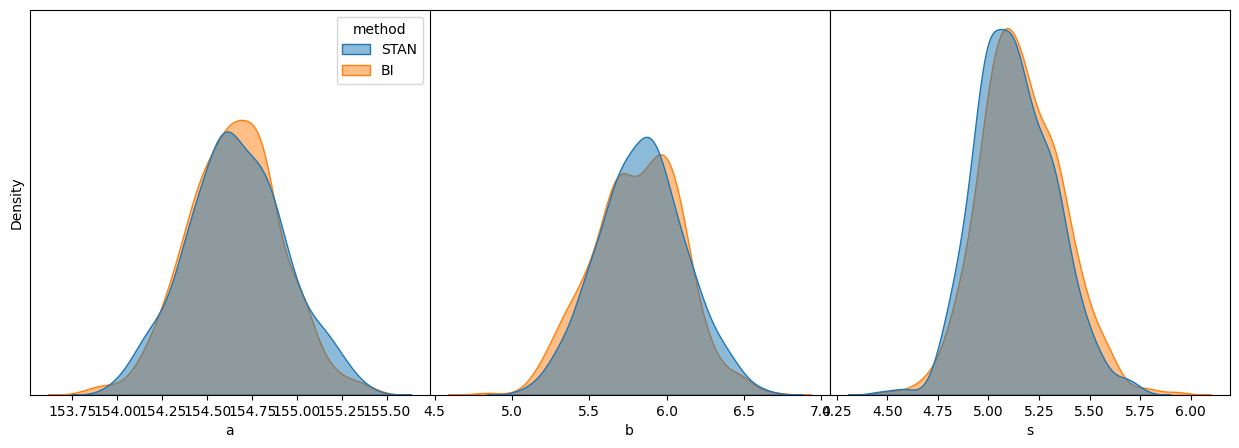

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [8]:
plot_comparaison(m, df)

### <a id='toc2_1_5_'></a>[Parameter recovery](#toc0_)


In [8]:
def sim_data(a, b, s):
    x = m.dist.normal(0, 1, shape=(100,))
    y = m.dist.normal(a * x + b, s)
    return x, y
Nsim = 2
a = m.dist.normal(178, 20, shape=(nsim, 1), sample=True)
b = m.dist.log_normal(0, 1, shape=(nsim, 1,), sample=True, seed = 2)
s = m.dist.uniform(0, 50, shape=(nsim, 1), sample=True)

a[0,:]

Array([162.94627076], dtype=float64)

In [ ]:
for a in range(Nsim):
    x, y = sim_data(b[0], 0.5, 1)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_93336/2176794275.py:36: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2,

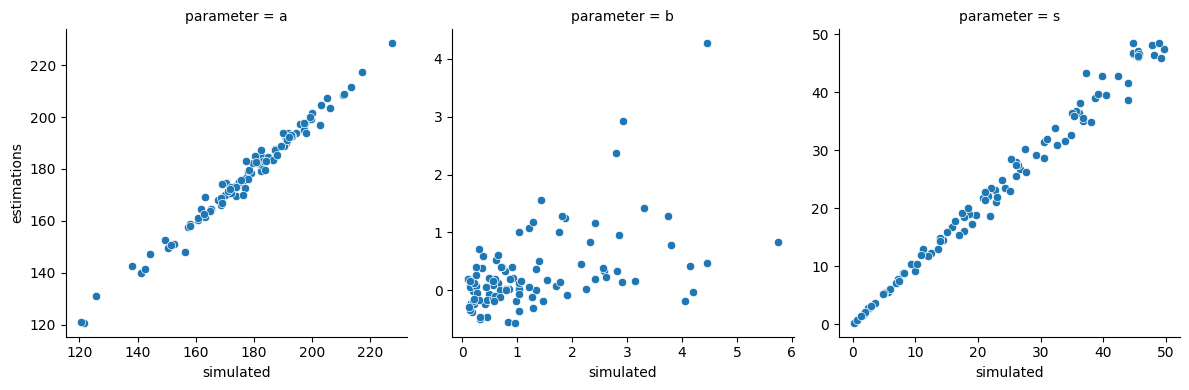

In [6]:
import seaborn as sns
def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')   
    b = m.dist.normal(0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height)

def simulate_height(weight, a, b, s):    
    weight = (weight - weight.mean())/weight.std()
    height = m.dist.normal( a + b * weight , s, sample = True)
    return weight, height

def estimate(weight, a, b, s):
    weight, height = simulate_height(weight,a, b, s)
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"weight": weight, "height": height})
    #m.df = m.df[m.df.age > 18]
    m.scale(['weight'])
    m.data_to_model(['weight', 'height'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(weight, a, b, s, N, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(weight[i,:], a[i,:], b[i,:], s[i,:])
        data = {'sim': [i,i,i], 'parameter': estimations.index.values, 'simulated' : [a[i,:][0], b[i,:][0], s[i,:][0]], 'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

N = 100
nsim = 100
a = m.dist.normal(178, 20, shape=(nsim, 1), sample=True)
b = m.dist.log_normal(0, 1, shape=(nsim, 1,), sample=True, seed = 2)
s = m.dist.uniform(0, 50, shape=(nsim, 1), sample=True)
weight = m.dist.normal( 80, 30, sample = True, shape = (nsim, N))
res = param_recovery(weight, a, b, s, N, nsim = nsim)

## <a id='toc2_2_'></a>[Categorical variable: Model (model 5.9)](#toc0_)

### <a id='toc2_2_1_'></a>[BI](#toc0_)

In [6]:
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data(data_path + 'milk.csv', sep=';') 
m.index(["clade"])
m.scale(['kcal_per_g'])

def model(kcal_per_g, index_clade):
    a = m.dist.normal(0, 0.5, shape=(4,), name = 'a')
    s = m.dist.exponential( 1, name = 's')    
    mu = a[index_clade]
    m.dist.normal(mu, s, obs=kcal_per_g)

m.data_to_model(['kcal_per_g', "index_clade"])
m.fit(model) 
m.latex()
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:01<00:00, 546.68it/s, 7 steps of size 6.13e-01. acc. prob=0.93]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a[0] -0.46  0.24     -0.86      -0.12       0.01     0.01    561.92    359.00   
a[1]  0.36  0.25     -0.08       0.72       0.01     0.01    653.34    425.66   
a[2]  0.64  0.28      0.16       1.03       0.01     0.01    675.05    434.02   
a[3] -0.54  0.32     -1.03      -0.07       0.01     0.02    541.70    274.38   
s     0.80  0.12      0.62       0.97       0.01     0.01    437.10    242.17   

      r_hat  
a[0]    NaN  
a[1]    NaN  
a[2]    NaN  
a[3]    NaN  
s       NaN

### <a id='toc2_2_2_'></a>[BIR](#toc0_)

In [11]:
%%R
m=importBI(platform='cpu')

# Load csv file
m$data(paste(data_path,"/milk.csv", sep = ''), sep=';')
m$scale(list('kcal.per.g')) # Manipulate
m$index(list('clade')) # Scale
m$data_to_model(list('kcal_per_g', 'index_clade')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(kcal_per_g, index_clade){
  # Parameters priors distributions
  beta =  bi.dist.normal( 0, 0.5, name = 'beta', shape=c(4))
  sigma = bi.dist.exponential(1, name = 's')
  # Likelihood
  bi.dist.normal(beta[index_clade], sigma, obs=kcal_per_g)
}


# Run mcmc ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1120.99it/s, 7 steps of size 7.67e-01. acc. prob=0.89]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


         mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail r_hat
beta[0] -0.46 0.24    -0.80     -0.03      0.01    0.01   581.14   428.71   NaN
beta[1]  0.32 0.25    -0.07      0.72      0.01    0.01   497.52   180.00   NaN
beta[2]  0.64 0.29     0.16      1.07      0.01    0.01   526.81   360.97   NaN
beta[3] -0.54 0.31    -1.04     -0.08      0.01    0.01   567.86   393.95   NaN
s        0.81 0.12     0.64      0.99      0.01    0.00   393.17   359.00   NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_2_3_'></a>[STAN](#toc0_)

In [12]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """
data{
    vector[29] K;
    array[29] int clade_id;
}
parameters{
    vector[4] a;
    real<lower=0> s;
}
model{
    vector[29] mu;
    s ~ exponential( 1 );
    a ~ normal( 0 , 0.5 );
    for ( i in 1:29 ) {
        mu[i] = a[clade_id[i]];
    }
    K ~ normal( mu , s );
    
}
"""
data = {
  'clade_id': m.df.index_clade.values+1,
  'K': m.df.kcal_per_g.values,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 17.6s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!


Pystan took: 17.7086 seconds


### <a id='toc2_2_4_'></a>[Output comparaison](#toc0_)

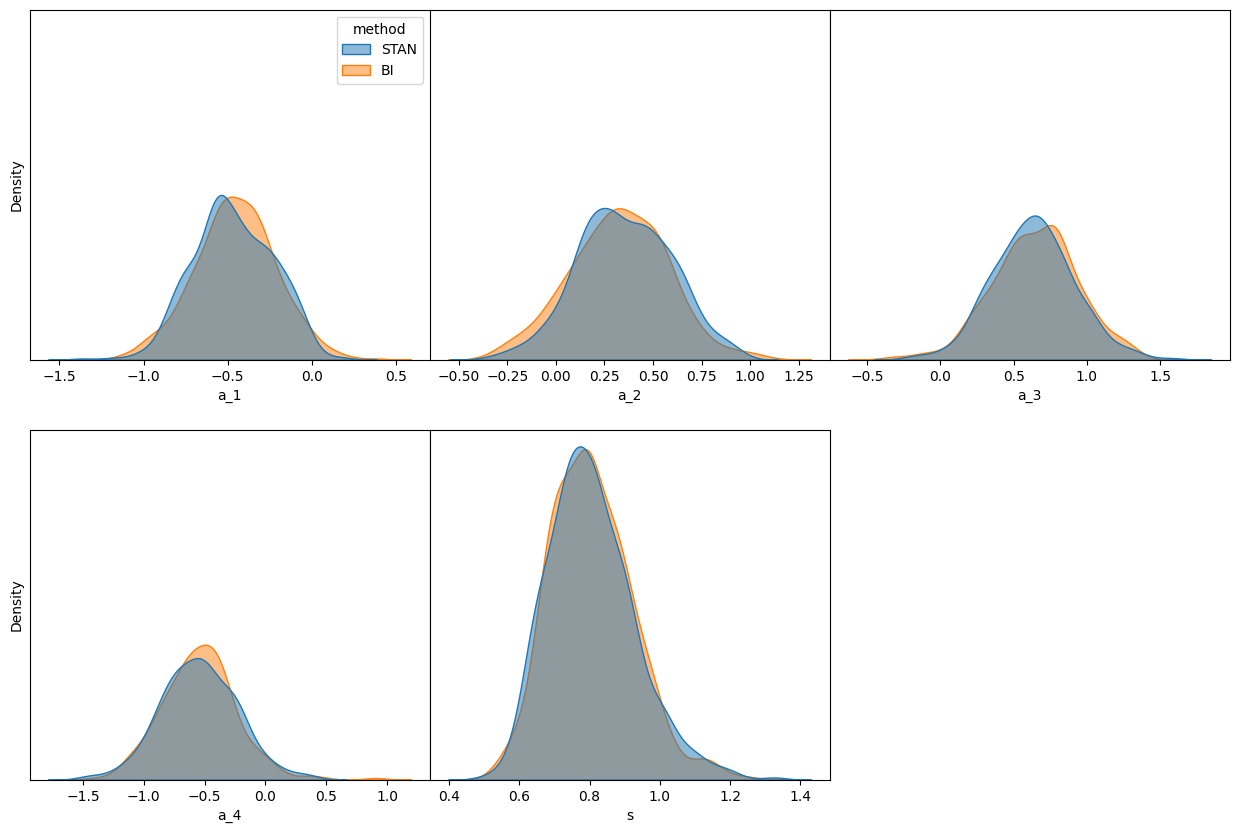

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [13]:
plot_comparaison(m, df)

### <a id='toc2_2_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2702095/3447918894.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

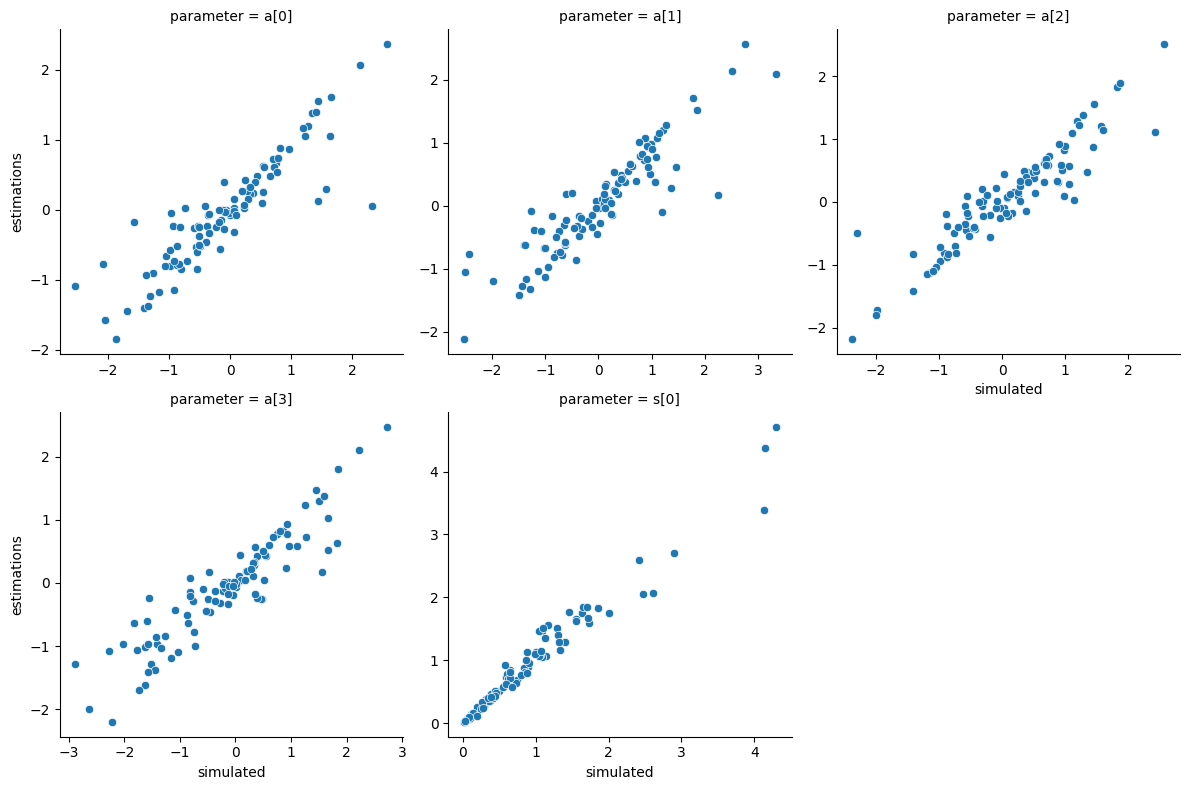

In [15]:
m = bi(platform='cpu')
import jax.numpy as jnp
def model(kcal_per_g, index_clade):
    a = m.dist.normal(0, 0.5, shape=(4,), name = 'a')
    s = m.dist.exponential( 1, shape = (1,), name = 's')    
    tmp = a[index_clade]
    m.dist.normal(tmp, s, obs=kcal_per_g)
    
def simulate_data(a, sigma, N):
    index_clade = m.dist.categorical(probs=jnp.array([0.25,0.25,.25,.25]), shape = (N,), sample=True).astype(int) # Generate clade index
    tmp = a[index_clade] # Generate mean of each clade
    cal = m.dist.normal(tmp, sigma, sample = True) # Generate calories based on mean and std
    return cal, index_clade
    
def estimate(alpha, sigma, N):
    cal, index_clade = simulate_data(alpha, sigma, N) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"kcal_per_g": cal, "index_clade": index_clade})
    #m.scale(['kcal_per_g'])
    m.data_to_model(['kcal_per_g', 'index_clade'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(a, sigma, N, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i], sigma[i], N)
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([jnp.array(a[i]), jnp.array([sigma[i][0]])]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

N = 30
Ngrp = 4
nsim = 100
a = m.dist.normal(0, 1, shape=(nsim, Ngrp,), sample=True, seed = 0)
sigma = m.dist.exponential(1, shape=(nsim, 1,), sample=True, seed = 10)

result = param_recovery(a,sigma, N = N, nsim = nsim)

## <a id='toc2_3_'></a>[Continuous interactions terms (model 8.3)](#toc0_)

### <a id='toc2_3_1_'></a>[BI](#toc0_)

In [7]:
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data(data_path + 'tulips.csv', sep=';') 
m.scale(['blooms', 'water', 'shade'])

# define model ------------------------------------------------
def model(blooms,shade, water):
    sigma = m.dist.exponential(1, name = 'sigma')
    beta_s = m.dist.normal(0, 0.25, name = 'bws')
    beta_w = m.dist.normal(0, 0.25, name = 'bs')
    beta_ws = m.dist.normal(0, 0.25, name = 'bw')
    a = m.dist.normal(0.5, 0.25, name = 'a')
    mu = a + beta_w*water +  beta_s*shade +  beta_ws*water*shade
    m.dist.normal(mu, sigma, obs=blooms)

# Run sampler ------------------------------------------------ 

m.fit(model) 
m.latex()
# Diagnostic ------------------------------------------------
m.summary()


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 427.82it/s, 7 steps of size 5.41e-01. acc. prob=0.94]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a      0.09  0.11     -0.09       0.24       0.00     0.00    622.85   
bs     0.57  0.12      0.38       0.74       0.01     0.01    499.49   
bw    -0.33  0.11     -0.51      -0.15       0.00     0.01    562.61   
bws   -0.31  0.11     -0.46      -0.13       0.00     0.01    534.36   
sigma  0.58  0.09      0.44       0.71       0.00     0.01    436.25   

       ess_tail  r_hat  
a        381.88    NaN  
bs       344.08    NaN  
bw       312.57    NaN  
bws      353.12    NaN  
sigma    399.55    NaN

### <a id='toc2_3_2_'></a>[BIR](#toc0_)

In [ ]:
%%R

m=importBI(platform='cpu')

# Load csv file
m$data(paste(data_path,"/tulips.csv", sep = ''), sep=';')
m$scale(list('blooms', 'water', 'shade')) # Scale
m$data_to_model(list('blooms', 'water', 'shade')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(blooms, water,shade){
  # Parameters priors distributions
  alpha = bi.dist.normal( 0.5, 0.25, name = 'a')
  bw = bi.dist.normal( 0,  0.25, name = 'bw')
  bs = bi.dist.normal(  0,  0.25, name = 'bs')   
  bws = bi.dist.normal(  0, 0.25, name = 'bws') 
  sigma = bi.dist.exponential(1, name = 's')
  # Likelihood
  bi.dist.normal(alpha + bw*water + bs*shade + bws*water*shade, sigma, obs=blooms)
}

# Run mcmc ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling
# Summary ------------------------------------------------
m$summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 533.55it/s, 7 steps of size 5.99e-01. acc. prob=0.92]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


     mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail r_hat
a    0.09 0.12    -0.09      0.26      0.01    0.01   529.93   290.89   NaN
bs  -0.31 0.12    -0.49     -0.11      0.00    0.00   752.20   461.64   NaN
bw   0.56 0.11     0.40      0.72      0.00    0.00   516.61   381.14   NaN
bws -0.32 0.11    -0.47     -0.14      0.01    0.00   404.06   278.74   NaN
s    0.58 0.10     0.44      0.74      0.00    0.00   424.62   373.06   NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_3_3_'></a>[STAN](#toc0_)

In [19]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    vector[27] blooms_std;
    array[27] int shade_cent;
    array[27] int water_cent;
}
parameters{
    real a;
    real bs;
    real bw;    
    real bws;
    real<lower=0> sigma;
}
model{
    vector[27] mu;
    sigma ~ exponential( 1 );
    bws ~ normal( 0 , 0.25 );
    bs ~ normal( 0 , 0.25 );
    bw ~ normal( 0 , 0.25 );
    a ~ normal( 0.5 , 0.25 );
    for ( i in 1:27 ) {
        mu[i] = a + bw * water_cent[i] + bs * shade_cent[i] + bws * water_cent[i] * shade_cent[i];
    }

    
    blooms_std ~ normal( mu , sigma );
}
"""

data = {
    'blooms_std' : m.df["blooms"].values,
    "water_cent": m.df["water"].values.astype(int),
    "shade_cent": m.df["shade"].values.astype(int),
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 18.2s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_w64vqbfx/model_dffbsqrs.stan', line 26, column 4 to column 38)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


Pystan took: 18.3412 seconds


### <a id='toc2_3_4_'></a>[Output comparison](#toc0_)

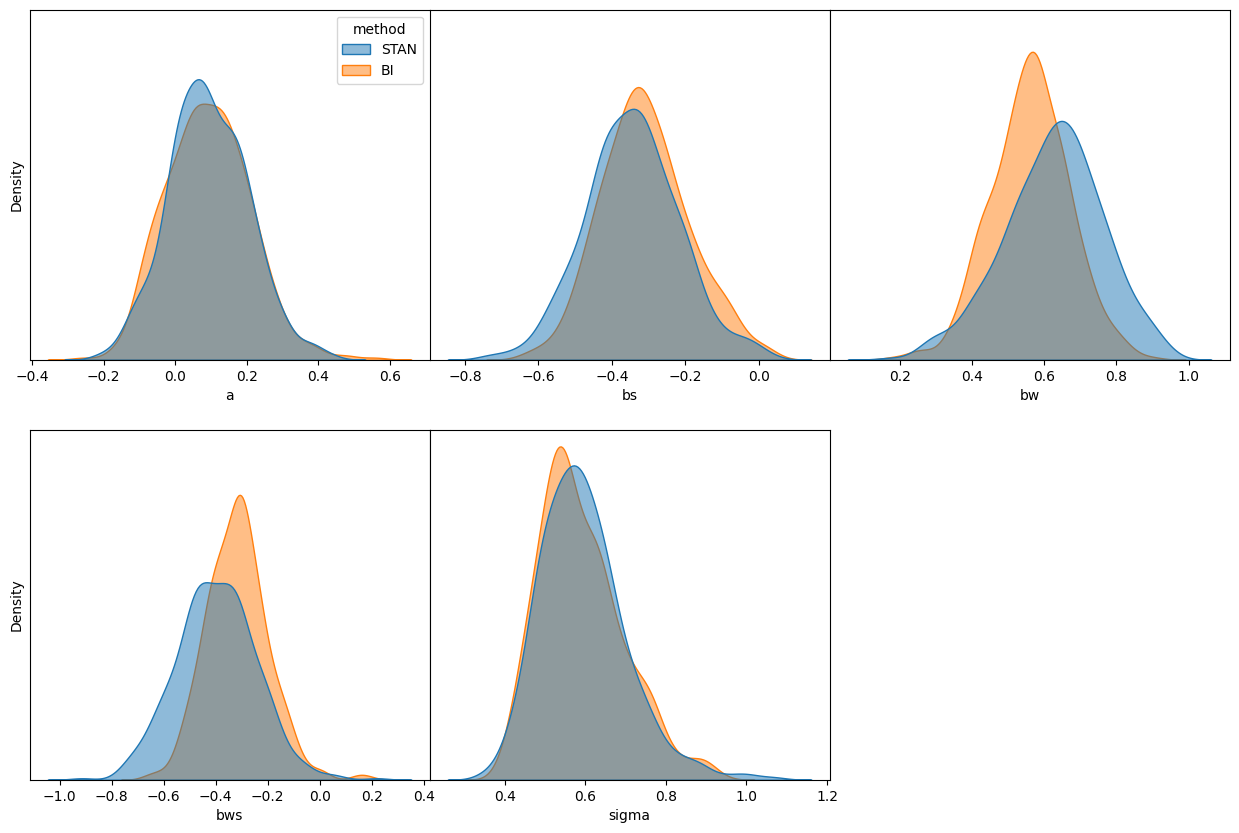

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [20]:
plot_comparaison(m, df)

### <a id='toc2_3_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2702095/1088514727.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

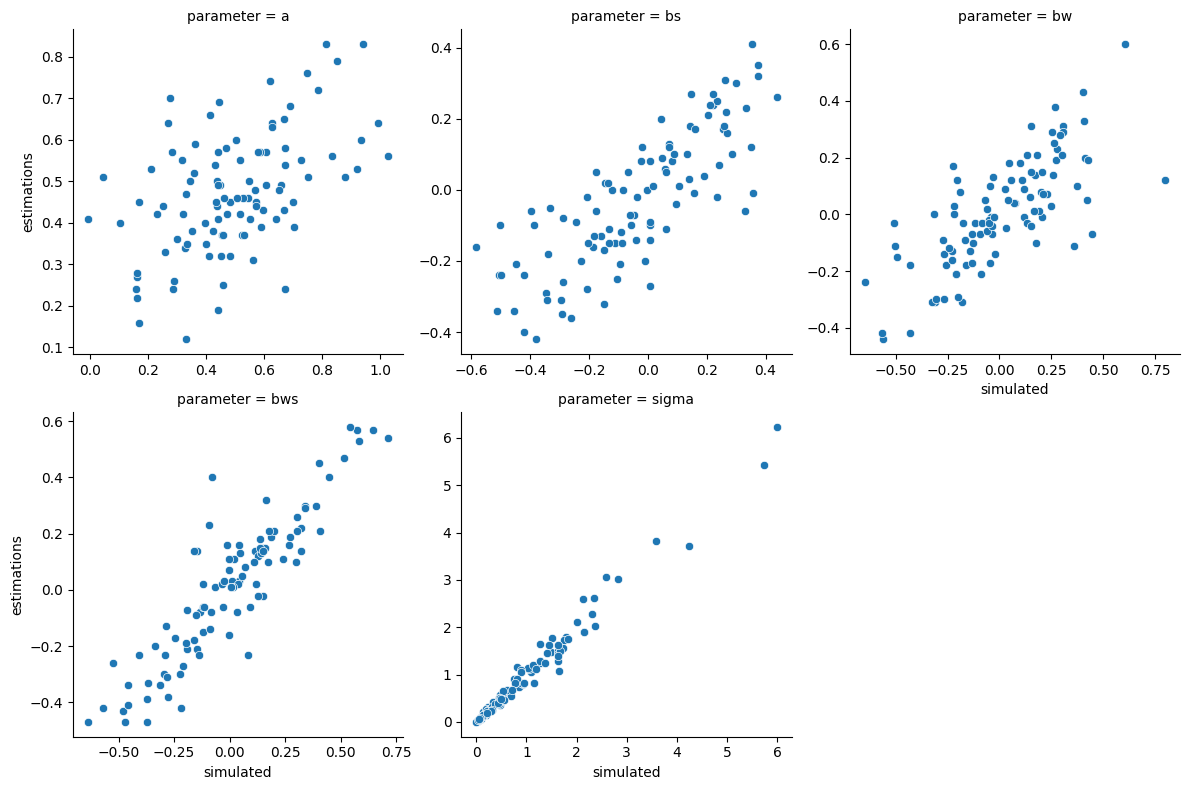

In [21]:
m = bi(platform='cpu')

def model(blooms,shade, water):
    sigma = m.dist.exponential(1, name = 'sigma')
    bws = m.dist.normal(0, 0.25, name = 'bws')
    bs = m.dist.normal(0, 0.25, name = 'bs')
    bw = m.dist.normal(0, 0.25, name = 'bw')
    a = m.dist.normal(0.5, 0.25, name = 'a')
    mu = a + bw*water + bs*shade + bws*water*shade
    m.dist.normal(mu, sigma, obs=blooms)

def simulate_bloom(water, shade, sigma, bws, bs, bw, a ):
    mu = a + bw*water + bs*shade + bws*water*shade
    return  m.dist.normal(mu, sigma, sample=True) # bloom
    
def estimate(water, shade, sigma,bws, bs, bw, a ):
    blooms = simulate_bloom(water, shade, sigma,bws, bs, bw, a ) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"water": water, "shade": shade, "blooms": blooms})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(water, shade, sigma, bws, bs, bw, a, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(water, shade, sigma[i], bws[i], bs[i], bw[i], a[i] )
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], bs[i], bw[i], bws[i], sigma[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
# Shade and water are all possible conbinations of shade (1 to 3) and water (1 to 3)
m.data(data_path + 'tulips.csv', sep=';') 
shade = m.df.shade.values
water = m.df.water.values
sigma = m.dist.exponential(1, name = 'sigma', shape = (nsim, 1,), sample = True)
bws = m.dist.normal(0, 0.25, name = 'bws', shape = (nsim, 1,), sample = True, seed = 1)
bs = m.dist.normal(0, 0.25, name = 'bs', shape = (nsim, 1,), sample = True, seed = 2)
bw = m.dist.normal(0, 0.25, name = 'bw', shape = (nsim, 1,), sample = True, seed = 3)
a = m.dist.normal(0.5, 0.25, name = 'a', shape = (nsim, 1,), sample = True, seed = 4)

result = param_recovery(water, shade, sigma,bws, bs, bw, a, nsim = nsim)

## <a id='toc2_4_'></a>[Binomial (model 11.1)](#toc0_)

### <a id='toc2_4_1_'></a>[BI](#toc0_)

In [9]:
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data(data_path + 'chimpanzees.csv', sep=';') 
m.data_to_model(['pulled_left'])
def model(pulled_left):
    alpha = m.dist.normal( 0, 10,  name = 'a')
    m.dist.binomial(total_count = 1, logits=alpha, obs=pulled_left)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500) 
m.latex()
# Diagnostic ------------------------------------------------
m.summary()


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:01<00:00, 600.82it/s, 3 steps of size 9.99e-01. acc. prob=0.90]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a  0.32  0.09      0.18       0.46       0.01      0.0     215.2    279.92   

   r_hat  
a    NaN

In [10]:
m.latex()

<IPython.core.display.Latex object>

'\\begin{align*}\nm.dist.binomial(total_{count} = 1, logits=\\alpha[0], obs=pulled_{left}) \\\\\n\\alpha \\sim \\text{Normal}(0, 10, (1,))\\\\\n\\end{align*}\n'

In [7]:
import ast
import re

from IPython.display import Latex

# Greek symbols mapping
greek_symbols = {
    'alpha': '\\alpha', 'beta': '\\beta', 'gamma': '\\gamma', 'delta': '\\delta',
    'epsilon': '\\epsilon', 'zeta': '\\zeta', 'eta': '\\eta', 'theta': '\\theta',
    'iota': '\\iota', 'kappa': '\\kappa', 'lambda_': '\\lambda', 'mu': '\\mu',
    'nu': '\\nu', 'xi': '\\xi', 'omicron': 'o', 'pi': '\\pi', 'rho': '\\rho',
    'sigma': '\\sigma', 'tau': '\\tau', 'upsilon': '\\upsilon', 'phi': '\\phi',
    'chi': '\\chi', 'psi': '\\psi', 'omega': '\\omega'
}

def extract_lines(code_str):
    return [line.rstrip() for line in code_str.split("\n") if line.strip() != ""]

def convert_to_greek(var_name):
    return greek_symbols.get(var_name.lower(), var_name)

def format_latex_var(var_name):
    if '_' in var_name:
        parts = var_name.split('_', 1)
        base = convert_to_greek(parts[0])
        return f"{base}_{{{parts[1]}}}"
    else:
        return convert_to_greek(var_name)

def convert_line_names(line):
    tokens = re.split(r'(\W)', line)
    return ''.join([format_latex_var(t) if re.match(r'^[A-Za-z_]\w*$', t) else t for t in tokens])


def extract_latex_line_final(line):
    leading_spaces = len(line) - len(line.lstrip())
    stripped_line = line.lstrip()

    def format_arg(arg):
        """Convert a Name to Greek/subscript, leave others unchanged"""
        if isinstance(arg, ast.Name):
            return format_latex_var(arg.id)
        elif isinstance(arg, ast.Subscript):
            return ast_to_latex(arg)
        else:
            # MODIFICATION 1: Use a more conservative conversion for complex arguments.
            # This unparses the expression and then converts only the variable names,
            # preserving the original operators and structure.
            return convert_line_names(ast.unparse(arg))

    def ast_to_latex(node):
        """Recursively convert arithmetic expressions to LaTeX with Greek/subscripted variables"""
        if isinstance(node, ast.Name):
            return format_latex_var(node.id)
        elif isinstance(node, ast.Subscript):
            val = ast_to_latex(node.value)
            if hasattr(node.slice, 'value'):
                sl = ast_to_latex(node.slice.value)
            else:
                sl = ast_to_latex(node.slice)
            return f"{val}_{{{sl}}}"
        elif isinstance(node, ast.BinOp):
            left = ast_to_latex(node.left)
            right = ast_to_latex(node.right)
            # MODIFICATION 2: Change the multiplication operator from \times to *.
            op = {ast.Add: '+', ast.Sub: '-', ast.Mult: '*', ast.Div: '/'}[type(node.op)]
            return f"{left} {op} {right}"
        elif isinstance(node, ast.Constant):
            return str(node.value)
        else:
            return convert_line_names(ast.unparse(node))

    try:
        tree = ast.parse(stripped_line)
        node = tree.body[0]

        # Handle assignments and function calls (distributions)
        if isinstance(node, ast.Assign) and isinstance(node.value, ast.Call):
            assign = node
            func = assign.value

            # ----  convert dist names like log_normal → LogNormal ----
            if isinstance(func.func, ast.Attribute):
                func_name = func.func.attr
            else:
                func_name = func.func.id
            func_name = ''.join([part.capitalize() for part in func_name.split('_')])
            # -------------------------------------------------------------

            obs_var = None
            args_list = []

            for kw in func.keywords:
                if kw.arg == 'obs':
                    obs_var = format_latex_var(kw.value.id) if isinstance(kw.value, ast.Name) else ast.unparse(kw.value)
                elif kw.arg != 'name':
                    args_list.append(format_arg(kw.value))

            args_list = [format_arg(a) for a in func.args] + args_list

            lhs_var = assign.targets[0].id
            lhs_latex = obs_var if obs_var else format_latex_var(lhs_var)
            args_str = ", ".join(args_list)
            return " " * leading_spaces + f"{lhs_latex} \\sim \\text{{{func_name}}}({args_str})"

        elif isinstance(node, ast.Expr) and isinstance(node.value, ast.Call):
            func = node.value

            if isinstance(func.func, ast.Attribute):
                func_name = func.func.attr
            else:
                func_name = func.func.id
            func_name = ''.join([part.capitalize() for part in func_name.split('_')])

            obs_var = None
            args_list = []

            for kw in func.keywords:
                if kw.arg == 'obs':
                    obs_var = format_latex_var(kw.value.id) if isinstance(kw.value, ast.Name) else ast.unparse(kw.value)
                elif kw.arg != 'name':
                    args_list.append(format_arg(kw.value))

            args_list = [format_arg(a) for a in func.args] + args_list

            if obs_var is not None:
                lhs_latex = obs_var
                args_str = ", ".join(args_list)
                return " " * leading_spaces + f"{lhs_latex} \\sim \\text{{{func_name}}}({args_str})"

        elif isinstance(node, ast.Assign):
            lhs = format_latex_var(node.targets[0].id)
            rhs = ast_to_latex(node.value)
            return " " * leading_spaces + f"{lhs} = {rhs}"

        else:
            return " " * leading_spaces + convert_line_names(stripped_line)

    except Exception:
        return " " * leading_spaces + convert_line_names(stripped_line)


def to_latex(model):
    import inspect
    code = inspect.getsource(model)
    lines = extract_lines(code)
    lines_clean = [line.lstrip() for line in lines][1:]
    latex_lines = [extract_latex_line_final(line.lstrip()) for line in lines_clean]

    latex_str = "\\begin{align*}\n"
    latex_str += " \\\\\n".join(reversed(latex_lines))
    latex_str += "\\\\\n"
    latex_str += "\\end{align*}\n"
    display(Latex(latex_str))
    return latex_str

### <a id='toc2_4_2_'></a>[BIR](#toc0_)

In [24]:
%%R

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(data_path,"/chimpanzees.csv", sep = ''), sep=';')
m$data_to_model(list('pulled_left')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(pulled_left){
  # Parameters priors distributions
  alpha = bi.dist.normal( 0, 10, name = 'alpha', shape=c(1))
  # Likelihood
  bi.dist.binomial(logits = alpha, obs=pulled_left)
}


# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1064.77it/s, 3 steps of size 1.03e+00. acc. prob=0.93]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


         mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail r_hat
alpha[0] 0.32 0.09      0.2      0.48      0.01    0.01   156.91   197.05   NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_4_3_'></a>[STAN](#toc0_)

In [25]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    array[504] int pulled_left;
}
parameters{
    real a;
}
model{
    real p;
    a ~ normal( 0 , 10 );
    p = a;
    p = inv_logit(p);
    pulled_left ~ binomial( 1 , p );    
}
"""

data = {
    'pulled_left' : m.df["pulled_left"].values.astype(int)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 15.6s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!


Pystan took: 15.7063 seconds


### <a id='toc2_4_4_'></a>[Output comparison](#toc0_)

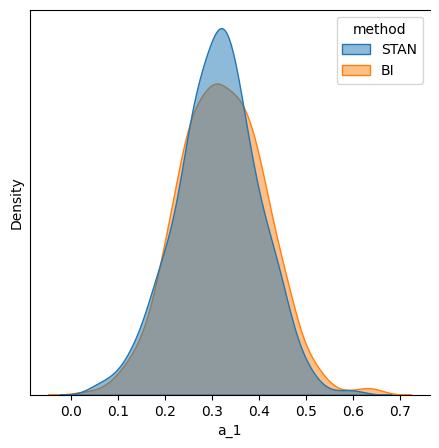

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [26]:
plot_comparaison(m, df)

### <a id='toc2_4_5_'></a>[Parameter recovery](#toc0_)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2702095/4188326335.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

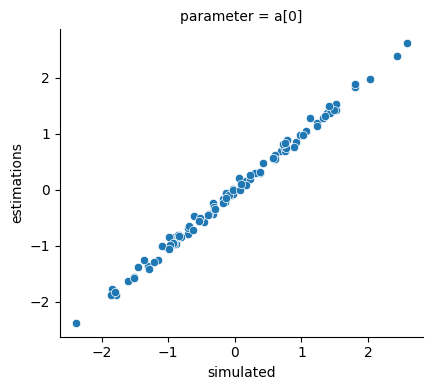

In [27]:
def model(pulled_left):
    a = m.dist.normal( 0, 10,shape = (1,), name = 'a')
    m.dist.binomial(logits=a, obs=pulled_left)

def sim_pulled_left(a):
    return m.dist.binomial(logits=a, sample=True, shape=(1000,))

def estimate(a):
    pulled_left = sim_pulled_left(a)[:,0] # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"pulled_left": pulled_left})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(a, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : a[i], 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
a = m.dist.normal( 0, 1, shape = (nsim, 1), sample=True)
result = param_recovery(a, nsim = nsim)

## <a id='toc2_5_'></a>[Binomial with indices (model 11.4)](#toc0_)

### <a id='toc2_5_1_'></a>[BI](#toc0_)

In [6]:
m = bi(platform='cpu')
m.data(data_path + 'chimpanzees.csv', sep=';') 
m.df['treatment'] =  m.df.prosoc_left + 2 * m.df.condition
m.df['actor'] = m.df['actor'] - 1

m.data_to_model(['actor', 'treatment', 'pulled_left'])

def model(actor, treatment, pulled_left):
    alpha = m.dist.normal(0, 1.5, shape = (7,), name='a')
    beta = m.dist.normal(0, 0.5, shape = (4,), name='b')
    p = alpha[actor] + beta[treatment]
    m.dist.binomial(total_count = 1, logits=p, obs=pulled_left)

# Run sampler ------------------------------------------------
m.fit(model) 
m.latex()
# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 499.12it/s, 7 steps of size 4.51e-01. acc. prob=0.90] 


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a[0] -0.41  0.32     -0.91       0.07       0.02     0.01    186.35    354.97   
a[1]  3.93  0.75      2.84       5.25       0.03     0.03    569.23    368.55   
a[2] -0.71  0.32     -1.20      -0.22       0.02     0.01    204.61    272.61   
a[3] -0.71  0.32     -1.25      -0.20       0.02     0.01    193.84    272.65   
a[4] -0.41  0.32     -0.88       0.14       0.02     0.01    207.96    275.64   
a[5]  0.53  0.33      0.02       1.02       0.02     0.01    190.03    259.49   
a[6]  2.03  0.42      1.34       2.64       0.03     0.02    220.36    154.00   
b[0] -0.08  0.28     -0.50       0.39       0.02     0.01    173.06    345.46   
b[1]  0.44  0.27     -0.01       0.84       0.02     0.01    194.34    280.35   
b[2] -0.43  0.28     -0.89       0.00       0.02     0.01    193.39    313.13   
b[3]  0.33  0.26     -0.08       0.77       0.02     0.01    197.83    379.32   

      r_hat  
a[0]    NaN  
a[1]    NaN  
a[2]    NaN  
a[3]    NaN  
a[4]    NaN  
a[5]    NaN  
a[6]    NaN  
b[0]    NaN  
b[1]    NaN  
b[2]    NaN  
b[3]    NaN

### <a id='toc2_5_2_'></a>[BIR](#toc0_)

In [10]:
%%R

# setup platform------------------------------------------------
m=importBI(platform='cpu')
jnp = reticulate::import("jax.numpy")
# import data ------------------------------------------------
m$data(paste(data_path,"/chimpanzees.csv", sep = ''), sep=';')
m$df$treatment =  m$df$prosoc_left + 2 * m$df$condition
m$df$actor = m$df$actor - 1
keys <- c("actor", "treatment", 'pulled_left')
values <- list(jnp$array(as.integer(m$df$actor)),jnp$array(as.integer(m$df$treatment)), jnp$array(as.integer(m$df$pulled_left)))
m$data_on_model = reticulate::py_dict(keys, values, convert = TRUE)

# Define model ------------------------------------------------
model <- function(actor, treatment, pulled_left){
  # Parameters priors distributions
  a = bi.dist.normal( 0, 1.5, shape = c(7), name = 'a') # 7 actors
  b = bi.dist.normal( 0, 0.5, shape = c(4), name = 'b') # 4 treatments
  p = a[actor] + b[treatment]
  # Likelihood
  bi.dist.binomial(1,logits =  p, obs=pulled_left)
}


# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 594.10it/s, 7 steps of size 4.63e-01. acc. prob=0.89]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


      mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail r_hat
a[0] -0.42 0.34    -0.93      0.15      0.02    0.02   210.43   383.87   NaN
a[1]  3.92 0.77     2.62      5.07      0.03    0.02   687.18   395.00   NaN
a[2] -0.71 0.33    -1.26     -0.25      0.02    0.02   237.14   300.26   NaN
a[3] -0.71 0.31    -1.26     -0.22      0.02    0.02   200.33   333.30   NaN
a[4] -0.41 0.32    -0.94      0.10      0.02    0.02   207.38   251.27   NaN
a[5]  0.54 0.33     0.00      0.98      0.02    0.02   206.73   252.59   NaN
a[6]  2.02 0.43     1.26      2.65      0.03    0.02   305.94   163.69   NaN
b[0] -0.09 0.28    -0.57      0.33      0.02    0.01   192.22   356.51   NaN
b[1]  0.44 0.29    -0.05      0.87      0.02    0.01   219.50   323.90   NaN
b[2] -0.44 0.29    -0.86      0.04      0.02    0.01   225.48   336.44   NaN
b[3]  0.33 0.27    -0.14      0.72      0.02    0.01   201.14   345.45   NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_5_3_'></a>[STAN](#toc0_)

In [14]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    array[504] int pulled_left;
    array[504] int treatment;
    array[504] int actor;
}
parameters{
    vector[7] a;
    vector[4] b;
}
model{
    vector[504] p;
    a ~ normal( 0 , 1.5 );
    b ~ normal( 0 , 0.5 );    
    for ( i in 1:504 ) {
        p[i] = a[actor[i]] + b[treatment[i]];
        p[i] = inv_logit(p[i]);
    }
    pulled_left ~ binomial( 1 , p );
}

"""

data = {
    'pulled_left' : m.df["pulled_left"].values.astype(int),
    'treatment' : m.df["treatment"].values.astype(int) + 1,
    'actor' : m.df["actor"].values.astype(int) +1 
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 21.7s, done.Sampling:   0%/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Sampling:  10% (100/1000)
Sampling:  40% (400/1000)
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 8.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.
  Adjust your expectations accordingly!


Pystan took: 22.8342 seconds


### <a id='toc2_5_4_'></a>[Output comparison](#toc0_)

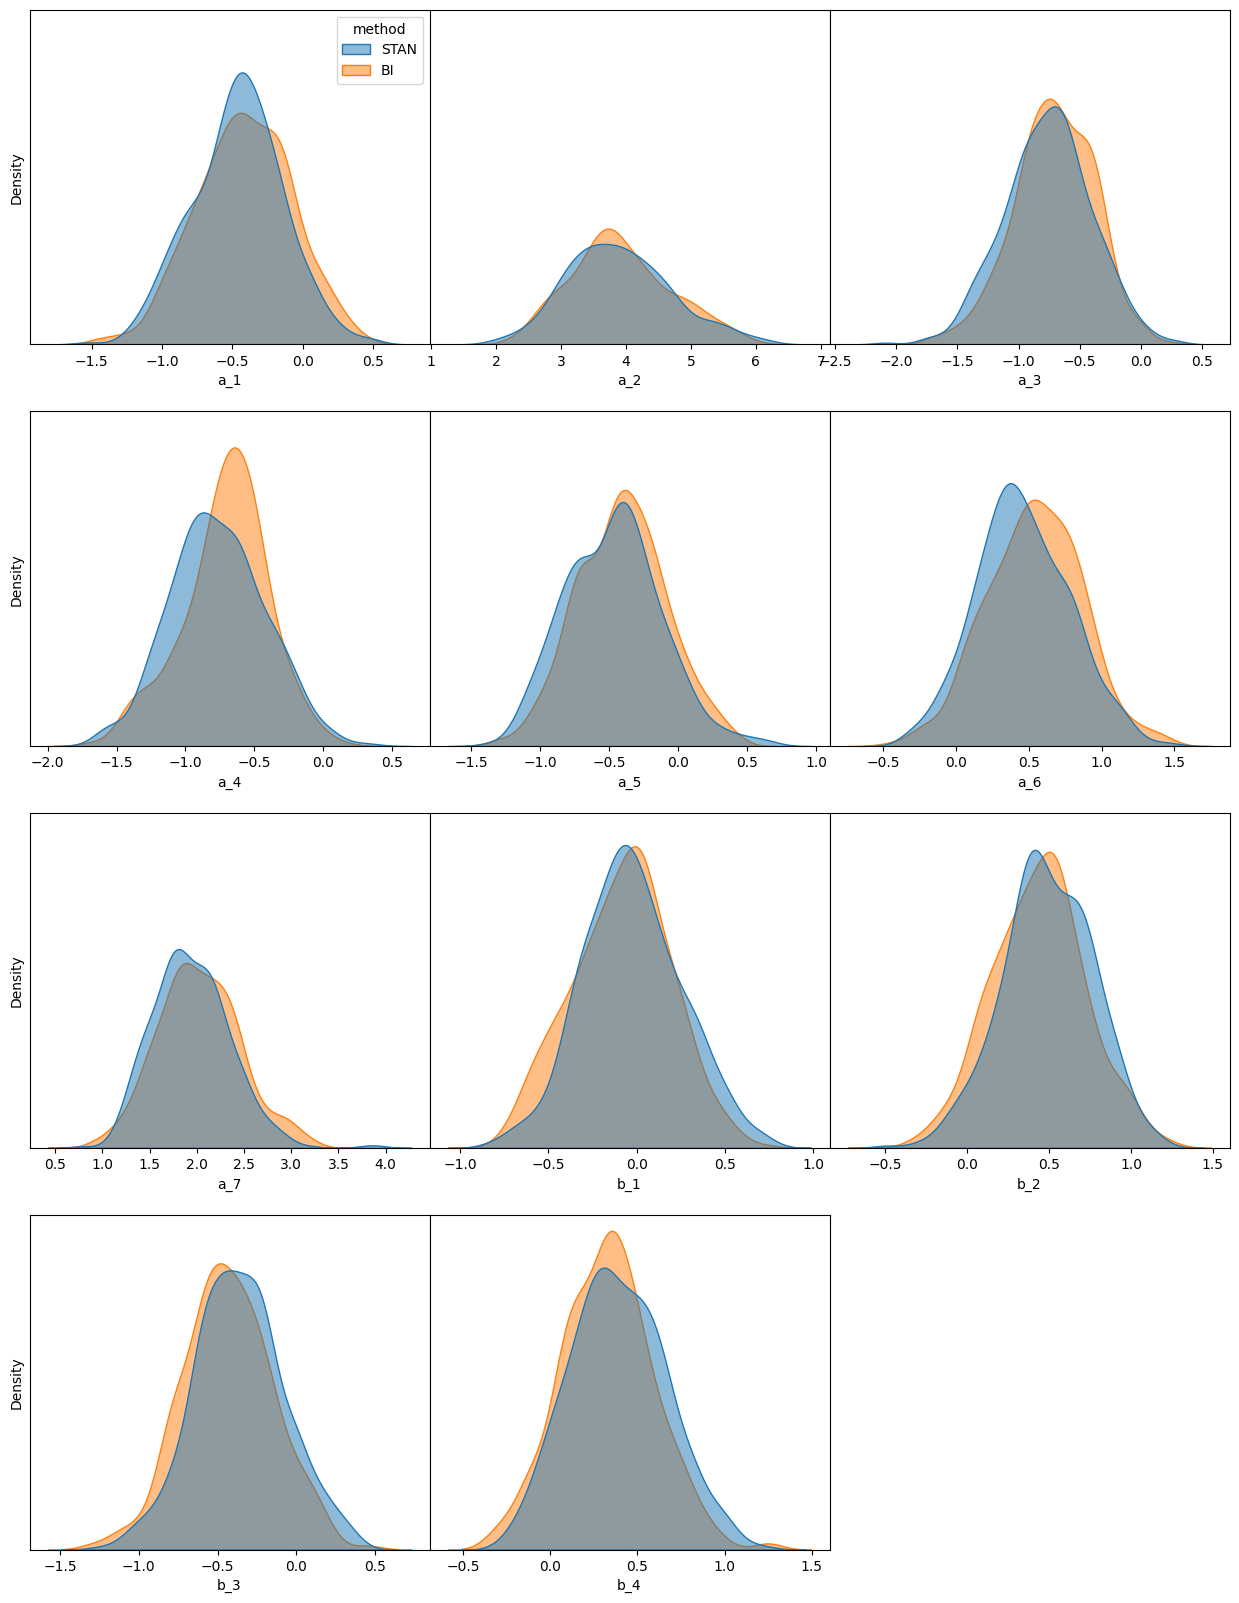

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [15]:
plot_comparaison(m, df)

### <a id='toc2_5_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2752739/1044414899.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

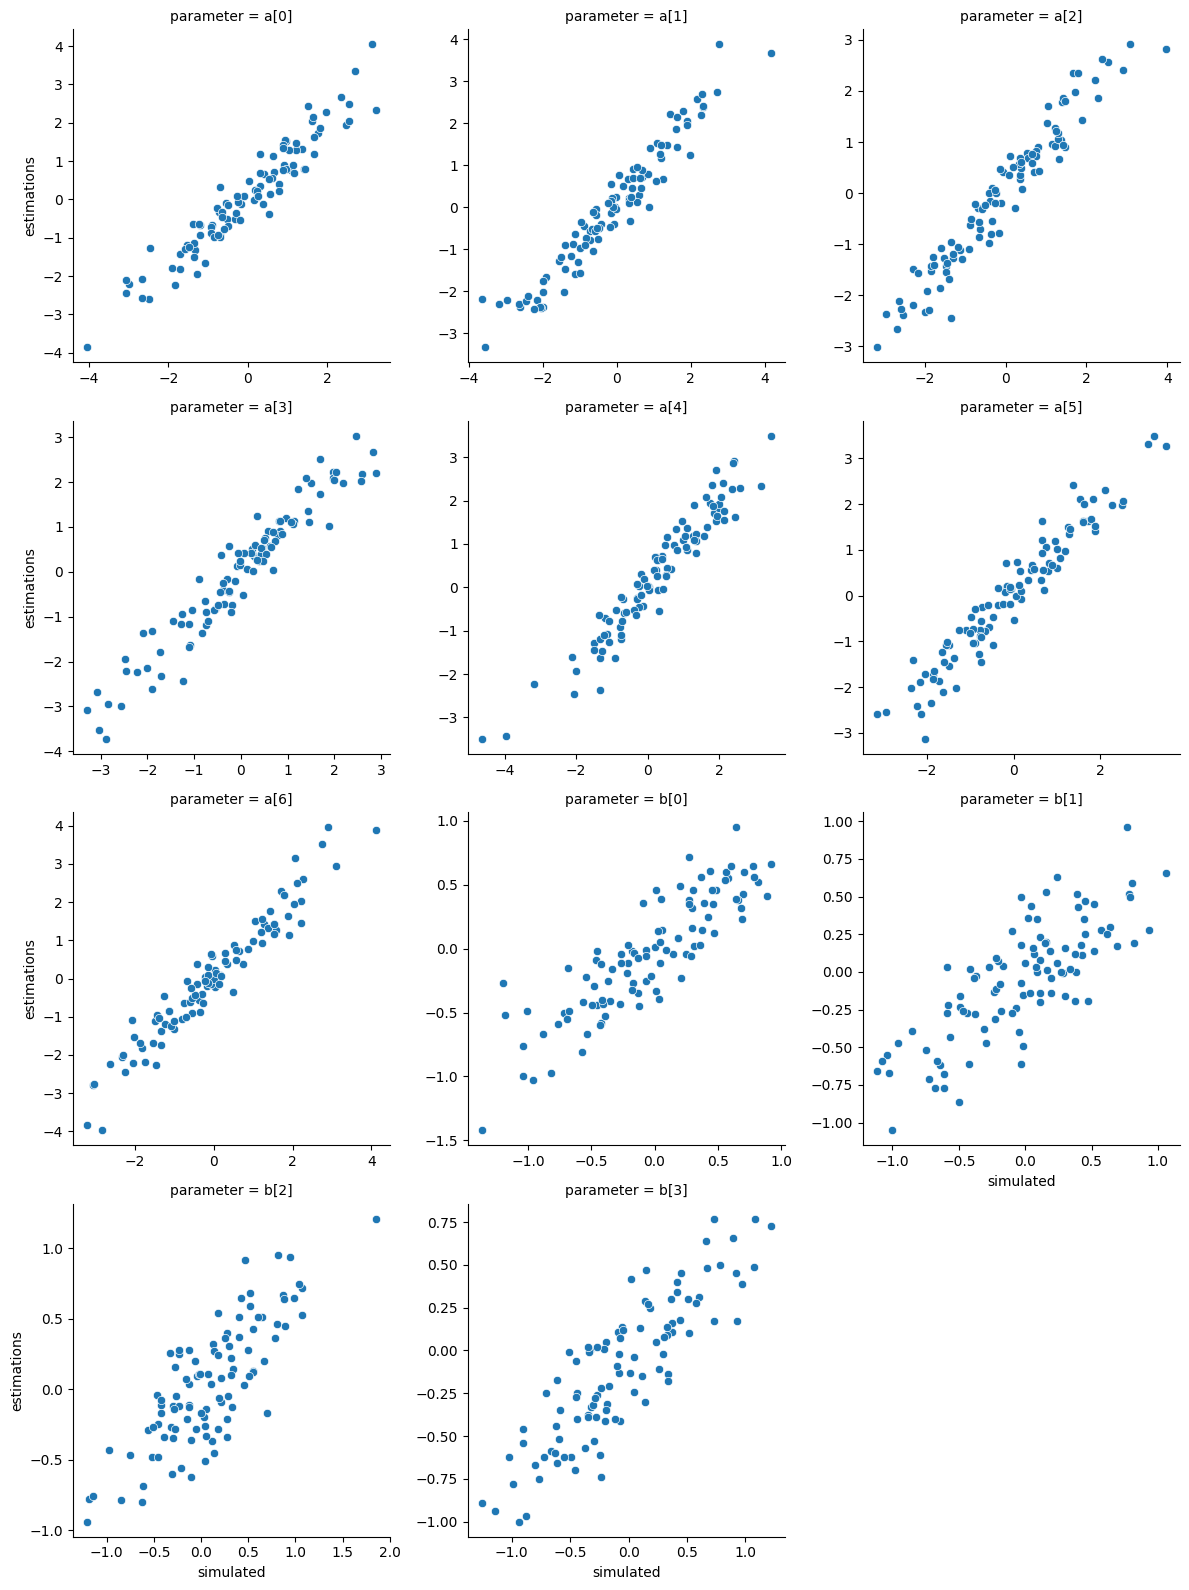

In [16]:
m = bi(platform='cpu')
m.data(data_path + 'chimpanzees.csv', sep=';') 
m.df['treatment'] =  m.df.prosoc_left + 2 * m.df.condition
m.df['actor'] = m.df['actor'] - 1

def model(actor, treatment, pulled_left):
    a = m.dist.normal(0, 1.5, shape = (7,), name='a')
    b = m.dist.normal(0, 0.5, shape = (4,), name='b')
    p = a[actor] + b[treatment]
    m.dist.binomial(1, logits=p, obs=pulled_left)

def sim_pulled_left(actor, treatment, a, b):
    p = a[actor] + b[treatment]
    return m.dist.binomial(1, logits=p, sample=True)

def estimate(actor, treatment, a, b):
    pulled_left = sim_pulled_left(actor, treatment, a, b) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"pulled_left": pulled_left, "actor": actor, "treatment": treatment})
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(actor, treatment, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(actor, treatment, a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
actor = jnp.array(m.df['actor'])
treatment = jnp.array(m.df['treatment'])
a = m.dist.normal(0, 1.5, shape = (nsim, 7), name='a', sample=True)
b = m.dist.normal(0, 0.5, shape = (nsim, 4), name='b', sample=True)

result = param_recovery(actor, treatment, a, b, nsim)

## <a id='toc2_6_'></a>[Poisson (model 11.10)](#toc0_)

### <a id='toc2_6_1_'></a>[BI](#toc0_)

In [5]:
# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data(data_path + 'Kline.csv', sep=';') 
m.scale(['population'])
m.df["cid"] = (m.df.contact == "high").astype(int)
#m.data_to_model(['total_tools', 'population', 'cid'])
def model(cid, population, total_tools):
    alpha = m.dist.normal(3, 0.5, shape= (2,), name='a')
    beta = m.dist.normal(0, 0.2, shape=(2,), name='b')
    lambda_ = jnp.exp(alpha[cid] + beta[cid]*population)
    m.dist.poisson(lambda_, obs=total_tools)

# Run sampler ------------------------------------------------
m.fit(model) 
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:01<00:00, 519.77it/s, 3 steps of size 6.07e-01. acc. prob=0.91]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a[0]  3.21  0.10      3.06       3.37       0.01     0.00    389.05    313.49   
a[1]  3.63  0.09      3.49       3.79       0.00     0.00    365.41    372.31   
b[0]  0.36  0.05      0.28       0.44       0.00     0.00    395.03    263.54   
b[1]  0.06  0.20     -0.27       0.36       0.01     0.01    321.22    270.19   

      r_hat  
a[0]    NaN  
a[1]    NaN  
b[0]    NaN  
b[1]    NaN

### <a id='toc2_6_2_'></a>[BIR](#toc0_)

In [18]:
%%R

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(data_path,"/Kline.csv", sep = ''), sep=';')
m$scale(list('population'))# Scale
m$df["cid"] =  as.integer(ifelse(m$df$contact == "high", 1, 0)) # Manipulate
m$data_to_model(list('total_tools', 'population', 'cid' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(total_tools, population, cid){
  # Parameters priors distributions
  alpha = bi.dist.normal(3, 0.5, name='alpha', shape = c(2))
  beta = bi.dist.normal(0, 0.2, name='beta', shape = c(2))
  l = jnp$exp(alpha[cid] + beta[cid]*population)
  # Likelihood
  bi.dist.poisson(l, obs=total_tools)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1293.97it/s, 3 steps of size 5.78e-01. acc. prob=0.91]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


         mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail r_hat
alpha[0] 3.21 0.10     3.06      3.37      0.00    0.00   410.13   262.13   NaN
alpha[1] 3.63 0.10     3.49      3.79      0.00    0.00   380.42   234.05   NaN
beta[0]  0.35 0.05     0.27      0.43      0.00    0.00   436.13   275.64   NaN
beta[1]  0.06 0.20    -0.28      0.35      0.01    0.01   331.26   332.48   NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_6_3_'></a>[STAN](#toc0_)

In [19]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """ 
data{
    array[10] int T;
    vector[10] P;
    array[10] int cid;
}
parameters{
    vector[2] a;
    vector[2] b;
}
model{
    vector[10] lambda;
    b ~ normal( 0 , 0.2 );
    a ~ normal( 3 , 0.5 );
    for ( i in 1:10 ) {
       lambda[i] = a[cid[i]] + b[cid[i]] * P[i];
       lambda[i] = exp(lambda[i]);
    }
    T ~ poisson( lambda );
}

"""

data = {
    'T' : m.df["total_tools"].values.astype(int),
    'P' : m.df["population"].values.astype(float),
    'cid' : m.df["cid"].values.astype(int) +1
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 19.1s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


Pystan took: 19.2815 seconds


### <a id='toc2_6_4_'></a>[Output comparison](#toc0_)

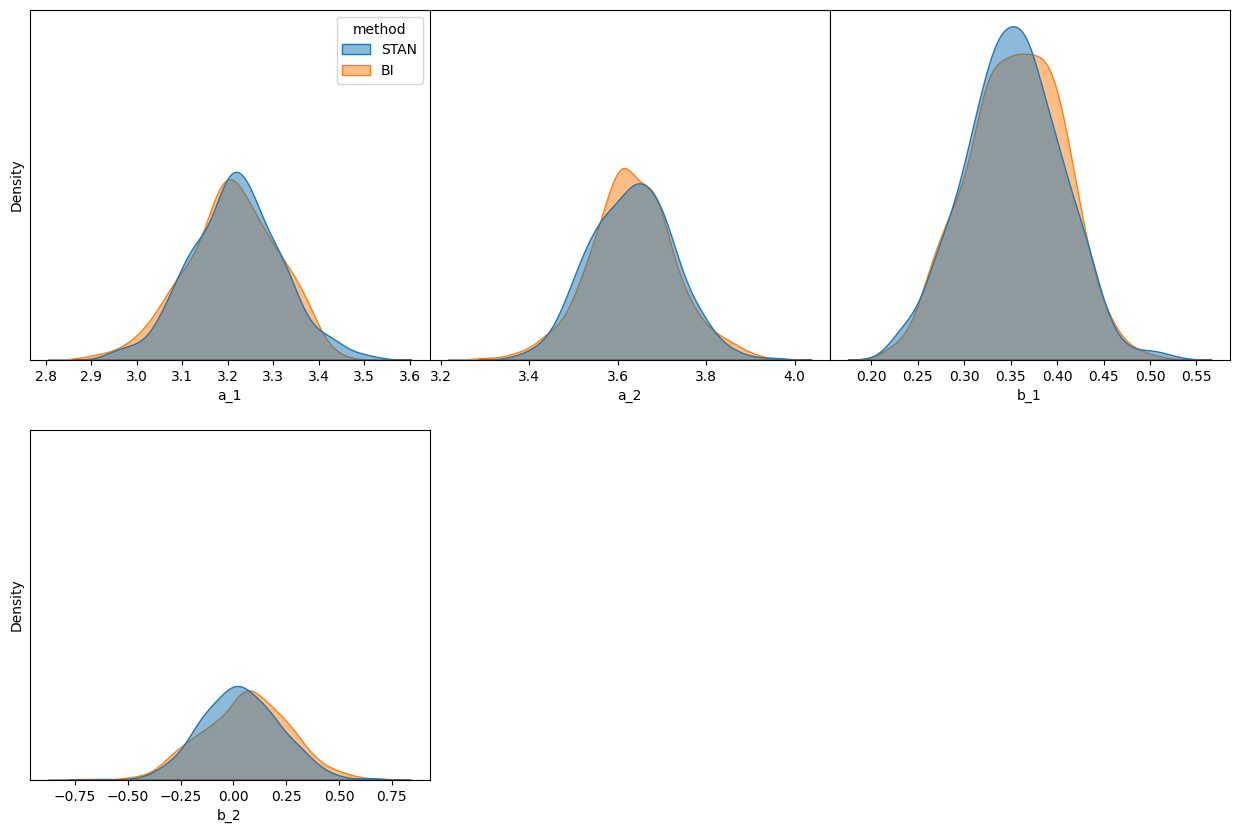

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [20]:
plot_comparaison(m, df)

### <a id='toc2_6_5_'></a>[Parameter recovery](#toc0_)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2752739/1446486723.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (

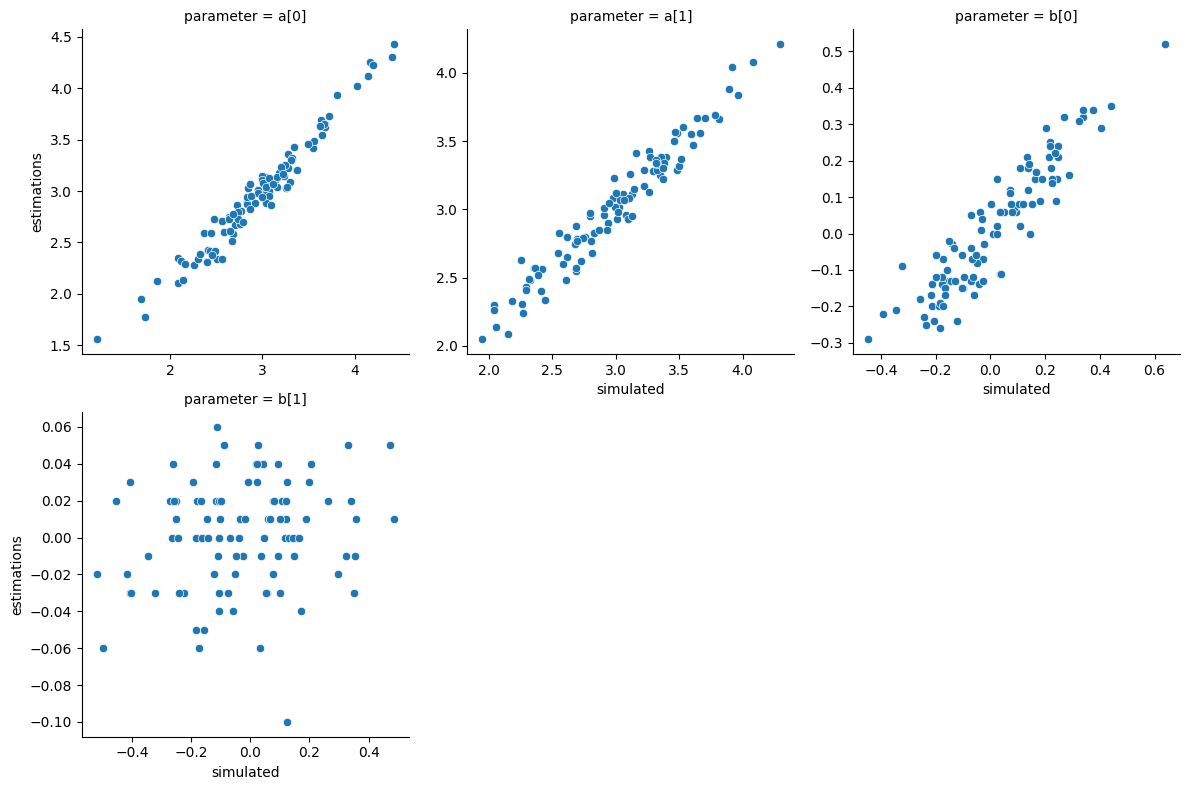

In [21]:

def model(cid, population, total_tools):
    a = m.dist.normal(3, 0.5, shape = (2,), name='a')
    b = m.dist.normal(0, 0.2, shape = (2,), name='b')
    l = jnp.exp(a[cid] + b[cid]*population)
    m.dist.poisson(l, obs=total_tools)

def sim_total_tools(cid, population, a, b):
    l = jnp.exp(a[cid] + b[cid]*population)
    return m.dist.poisson(l, sample=True)

def estimate(a, b):
    # Run model
    m = bi(print_devices_found=False)
    m.data(data_path + 'Kline.csv', sep=';') 
    m.scale(['population'])
    m.df["cid"] = (m.df.contact == "high").astype(int)

    total_tools = sim_total_tools(m.df.cid.values, m.df.population.values, a, b) # Simulate data
    m.df = pd.DataFrame({"cid": m.df.cid.values, 'population' :m.df.population.values, "total_tools": total_tools})
    m.fit(model, num_samples=1000, num_warmup = 1000, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(cid, population, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
m.data(data_path + 'Kline.csv', sep=';') 
m.scale(['population'])
m.df["cid"] = (m.df.contact == "high").astype(int)
cid = m.df.cid.values
population = m.df.population.values
a = m.dist.normal(3, 0.5, shape= (nsim, 2,), name='a', sample=True, seed = 1)
b = m.dist.normal(0, 0.2, shape= (nsim, 2,), name='b', sample=True, seed = 3)
result = param_recovery(cid, population, a, b, nsim)

## <a id='toc2_7_'></a>[Negative binomial (model 11.12)](#toc0_)

### <a id='toc2_7_1_'></a>[Simulated data](#toc0_)

In [23]:
import tensorflow_probability.substrates.jax.distributions as tfd
import pandas as pd
import random as random2
import jax
init_key, sample_key = jax.random.split(jax.random.PRNGKey(int(random2.randint(0, 10000000))))
init_key = jnp.array(init_key)
num_days = 3000
y = tfd.Poisson(rate=1.5).sample(seed = init_key, sample_shape=(num_days,))
num_weeks = 400
y_new = tfd.Poisson(rate=0.5 * 7).sample(seed = init_key, sample_shape=(num_weeks,))
y_all = np.concatenate([y, y_new])
exposure = np.concatenate([np.repeat(1, num_days), np.repeat(7, num_weeks)])
monastery = np.concatenate([np.repeat(0, num_days), np.repeat(1, num_weeks)])
d = pd.DataFrame.from_dict(dict(y=y_all, days=exposure, monastery=monastery))
d["log_days"] = d.days.pipe(np.log)
d.to_csv(data_path + 'Sim dat Gamma poisson.csv', index=False)

2025-09-29 10:18:31.639853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### <a id='toc2_7_2_'></a>[BI](#toc0_)

In [7]:
# setup platform------------------------------------------------
m = bi()
m.data(data_path + 'Sim dat Gamma poisson.csv', sep=',') 
m.data_on_model={'y': jnp.array(m.df.y.values, dtype=int), 'log_days': jnp.array(m.df.log_days.values, dtype=float), 'monastery': jnp.array(m.df.monastery.values, dtype=int)}
def model(log_days, monastery, y):
    alpha = m.dist.normal(0, 1, name = 'a')
    beta = m.dist.normal(0, 1, name = 'b')
    lambda_ = jnp.exp(log_days + alpha + beta * monastery)
    m.dist.poisson( lambda_,  obs=y)

# Run sampler ------------------------------------------------
m.fit(model, num_warmup = 1000, num_samples=1000) 
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 2000/2000 [00:02<00:00, 672.43it/s, 3 steps of size 7.17e-01. acc. prob=0.92]  


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a  0.41  0.01      0.39       0.44        0.0      0.0    496.73    569.33   
b -1.11  0.03     -1.16      -1.06        0.0      0.0    642.51    661.76   

   r_hat  
a    NaN  
b    NaN

### <a id='toc2_7_3_'></a>[BIR](#toc0_)

In [25]:
%%R

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(data_path,"/Sim dat Gamma poisson.csv", sep = ''), sep=',')
m$data_to_model(list('log_days', 'monastery', 'y' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(log_days, monastery, y){
  # Parameters priors distributions
  alpha = bi.dist.normal(0, 1, name='alpha', shape=c(1))
  beta = bi.dist.normal(0, 1, name='beta', shape=c(1))
  l = jnp$exp(log_days + alpha + beta * monastery)
  # Likelihood
  bi.dist.poisson(rate=l, obs=y)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 983.73it/s, 3 steps of size 6.61e-01. acc. prob=0.94]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


          mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail
alpha[0]  0.42 0.01     0.40      0.44         0       0   209.86   250.38
beta[0]  -1.14 0.03    -1.18     -1.08         0       0   227.16   184.45
         r_hat
alpha[0]   NaN
beta[0]    NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_7_4_'></a>[STAN](#toc0_)

In [26]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code =""" 
data{
    array[3400] int y;
    array[3400] int monastery;
    vector[3400] log_days;
}
parameters{
    real a;
    real b;
}
model{
    vector[3400] lambda;
    b ~ normal( 0 , 1 );
    a ~ normal( 0 , 1 );
    for ( i in 1:3400 ) {
        lambda[i] = log_days[i] + a + b * monastery[i];
        // B1 ~ exponential( 1 );
        // gamma(lambda[i]*B1, B1);
        lambda[i] = exp(lambda[i]);
    }
    
    y ~ poisson( lambda );    
}
"""

data = {
    'y' : np.array(m.data_on_model["y"].astype(int)),
    'monastery' : np.array(m.data_on_model["monastery"].astype(int)) +1,
    'log_days' : np.array(m.data_on_model["log_days"].astype(float)),
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=1000, num_warmup = 1000)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 16.2s, done.Sampling:   0%
Sampling:   0% (1/2000)
Sampling:   5% (100/2000)
Sampling:  10% (200/2000)
Sampling:  15% (300/2000)
Sampling:  20% (400/2000)
Sampling:  25% (500/2000)
Sampling:  30% (600/2000)
Sampling:  35% (700/2000)
Sampling:  40% (800/2000)
Sampling:  45% (900/2000)
Sampling: 100% (2000/2000)
Sampling: 100% (2000/2000), done.
Messages received during sampling:
  Gradient evaluation took 0.000547 seconds
  1000 transitions using 10 leapfrog steps per transition would take 5.47 seconds.
  Adjust your expectations accordingly!


Pystan took: 18.2356 seconds


### <a id='toc2_7_5_'></a>[Output comparison](#toc0_)

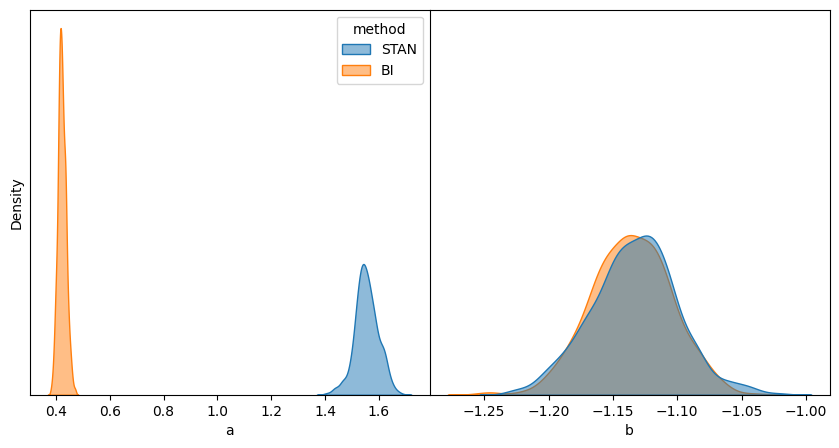

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [27]:
plot_comparaison(m, df)

### <a id='toc2_7_6_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2752739/3907719499.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

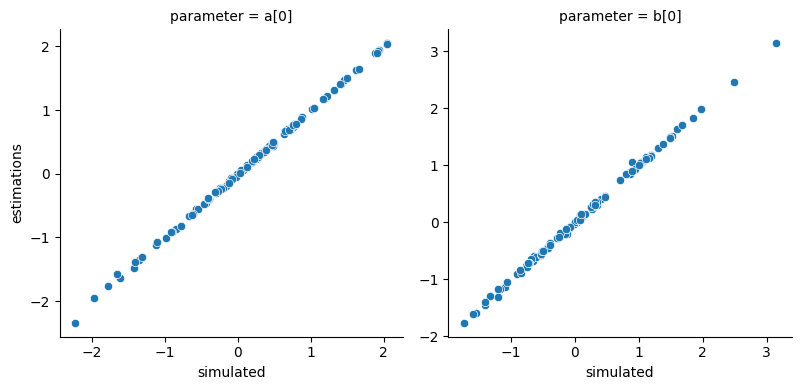

In [28]:
# setup platform------------------------------------------------
m = bi()
m.data(data_path + 'Sim dat Gamma poisson.csv', sep=',') 
import random as random2
def model(log_days, monastery, y):
    a = m.dist.normal(0, 1, name = 'a', shape=(1,))
    b = m.dist.normal(0, 1, name = 'b', shape=(1,))
    l = jnp.exp(log_days + a + b * monastery)
    m.dist.poisson(rate = l, obs=y)


def sim_rates(log_days, monastery, a, b):
    l = jnp.exp(log_days + a +  b * monastery)
    return m.dist.poisson(rate = l, sample=True)

def estimate(log_days, monastery, a, b):
    rates = sim_rates(log_days, monastery, a, b) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.df = pd.DataFrame({"log_days": log_days, "monastery": monastery, 'y': rates})
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(log_days, monastery, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(log_days, monastery, a[i], b[i] )
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
log_days = jnp.array(m.df.log_days.values)
monastery = jnp.array(m.df.monastery.values)
a = m.dist.normal(0, 1, name = 'a', sample=True, shape=(nsim, 1))
b = m.dist.normal(0, 1, name = 'b', sample=True, shape=(nsim, 1))

result = param_recovery(log_days, monastery, a, b, nsim)

## <a id='toc2_8_'></a>[Multinomial (model 11.13)](#toc0_)

### <a id='toc2_8_1_'></a>[Simulated data](#toc0_)

In [29]:
# simulate career choices among 500 individuals
N = 500  # number of individuals
income = jnp.array([1, 2, 5])  # expected income of each career
score = 0.5 * income  # scores for each career, based on income
# next line converts scores to probabilities
p = jax.nn.softmax(score)

# now simulate choice
# outcome career holds event type values, not counts
career = jnp.repeat(jnp.nan, N)  # empty vector of choices for each individual
# sample chosen career for each individual
for i in range(N):
    career = career.at[i].set(
        m.dist.categorical(probs=p, sample=True,seed=i)
    )
career = career.astype(jnp.int32)
data = {'career': career, 'income': [income[index] for index in career]}
d = pd.DataFrame(data)
d.to_csv(data_path + 'Sim data multinomial.csv')

### <a id='toc2_8_2_'></a>[BI](#toc0_)

In [9]:
import pandas as pd
m = bi('cpu')
df=pd.read_csv(data_path + 'Sim data multinomial.csv')
m.data_on_model={}
m.data_on_model['career']=jnp.array(df.career.values)
m.data_on_model['income']=jnp.array(df.income.unique()).astype(jnp.int32)
def model(career, income ):
    a = m.dist.normal(0, 1, shape= (2,), name = 'a')
    b = m.dist.half_normal(0.5,  shape= (1,),name = 'b')
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    m.dist.categorical(probs =  p, obs=career)

# Run sampler ------------------------------------------------ 
m.fit(model)  
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


  0%|          | 0/1000 [00:00<?, ?it/s]

sample: 100%|██████████| 1000/1000 [00:02<00:00, 415.39it/s, 7 steps of size 2.57e-01. acc. prob=0.84]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a[0] -2.13  0.26     -2.49      -1.72       0.03     0.03    107.29     59.23   
a[1] -1.59  0.16     -1.83      -1.32       0.02     0.02     71.75     38.88   
b[0]  0.06  0.05      0.00       0.13       0.01     0.01     79.08     67.62   

      r_hat  
a[0]    NaN  
a[1]    NaN  
b[0]    NaN

### <a id='toc2_8_3_'></a>[BIR](#toc0_)

In [35]:
%%R
library(reticulate)
jax = import("jax")
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(data_path,"/Sim data multinomial.csv", sep = ''), sep=',')
keys <- c("income", "career")
income = unique(m$df$income)
income = income[order(income)]
values <- list(jnp$array(as.integer(income)),jnp$array( as.integer(m$df$career)))
m$data_on_model = py_dict(keys, values, convert = TRUE)

# Define model ------------------------------------------------
model <- function(income, career){
  # Parameters priors distributions
  alpha = bi.dist.normal(0, 1, name='alpha', shape = c(2))
  beta = bi.dist.half_normal(0.5, name='beta')
  
  s_1 = alpha[0] + beta * income[0]
  s_2 = alpha[1] + beta * income[1]
  s_3 = 0 # reference category

  p = jax$nn$softmax(jnp$stack(list(s_1, s_2, s_3)))

  # Likelihood
  bi.dist.categorical(probs=p, obs=career)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 932.00it/s, 7 steps of size 3.28e-01. acc. prob=0.79]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


          mean   sd hdi_5.5% hdi_94.5% mcse_mean mcse_sd ess_bulk ess_tail
alpha[0] -1.97 0.18    -2.26     -1.68      0.03    0.03    44.19    27.44
alpha[1] -1.71 0.23    -2.08     -1.35      0.03    0.02    55.23    16.37
beta      0.13 0.11     0.00      0.29      0.03    0.02    49.71    72.71
         r_hat
alpha[0]   NaN
alpha[1]   NaN
beta       NaN



----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.


### <a id='toc2_8_4_'></a>[STAN](#toc0_)

In [36]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code =""" 
data{
    int N; // number of individuals
    int K; // number of possible careers
    array[N] int career; // outcome
    vector[K] career_income;
}
parameters{
    vector[K-1] a; // intercepts
    real<lower=0> b; // association of income with choice
}
model{
    vector[K] p;
    vector[K] s;
    a ~ normal( 0 , 1 );
    b ~ normal( 0 , 0.5 );
    s[1] = a[1] + b*career_income[1];
    s[2] = a[2] + b*career_income[2];
    s[3] = 0; // pivot
    p = softmax( s );
    career ~ categorical( p );
}
"""

data = {
    'N' : 500,
    'K' : 3,
    'career' : df["career"].values.astype(int) + 1,
    'career_income' : df["income"].unique().astype(int).tolist(),
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 18.5s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!


Pystan took: 18.6788 seconds


### <a id='toc2_8_5_'></a>[Output comparison](#toc0_)

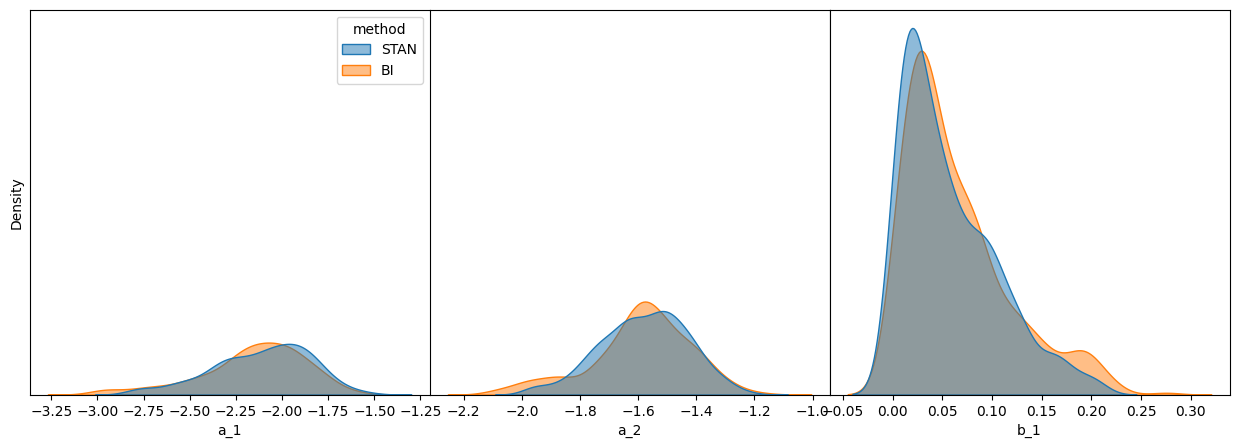

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [37]:
plot_comparaison(m, df)

### <a id='toc2_8_6_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2752739/1409749330.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

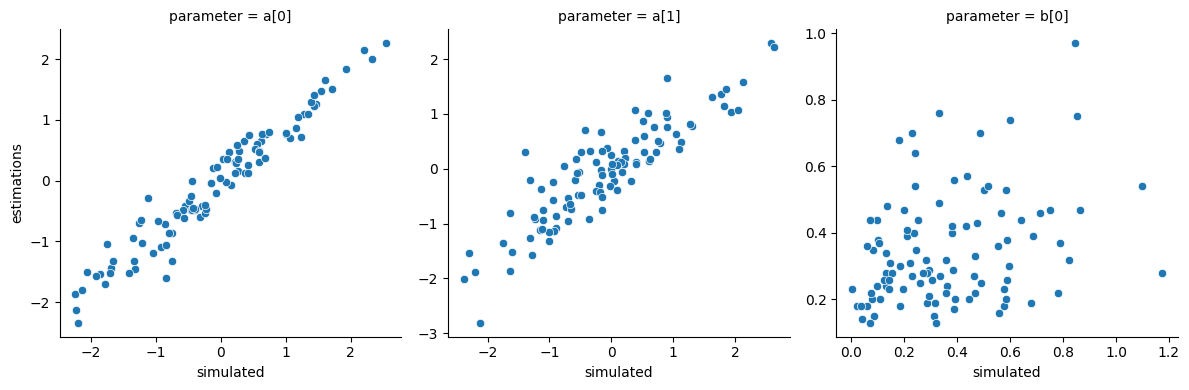

In [39]:
import pandas as pd
m = bi()
m.data(data_path + 'Sim data multinomial.csv', sep=',') 

def model(career, income ):
    a = m.dist.normal(0, 1, shape= (2,), name = 'a')
    b = m.dist.half_normal(0.5,  shape= (1,), name = 'b')
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    m.dist.categorical(probs = p, obs = career)
    
def sim_categories(income, career, a, b):
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    return m.dist.categorical(probs =  p, sample=True, shape=(len(career),))

def estimate(income, career, a, b):
    career = sim_categories(income, career, a, b) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data_on_model = {}
    m.data_on_model['income'] = income
    m.data_on_model['career'] = career
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(income, career, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(income, career,a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
m.data(data_path + 'Sim data multinomial.csv', sep=',') 
nsim = 100
income = jnp.unique(m.df.income.values)
career = jnp.array(m.df.career.values)
a = m.dist.normal(0, 1, shape= (nsim,2), name = 'a', sample=True)
b = m.dist.half_normal(0.5, shape=(nsim,1), name = 'b', sample=True)
result = param_recovery(income, career, a, b, nsim)

## <a id='toc2_9_'></a>[Beta binomial (model m12.1)](#toc0_)

### <a id='toc2_9_1_'></a>[BI](#toc0_)

In [11]:
import numpyro

# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)

def model(gid, applications, admit):
    phi = m.dist.exponential(1,  name = 'phi')
    alpha = m.dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta =   phi + 2
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.dist.beta_binomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

# Run sampler ------------------------------------------------
m.fit(model) 
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:04<00:00, 225.23it/s, 3 steps of size 6.16e-01. acc. prob=0.91]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0] -0.45  0.41     -1.07       0.22       0.02     0.02    479.65   
alpha[1] -0.33  0.44     -0.98       0.40       0.02     0.02    407.51   
phi       1.02  0.75      0.01       2.05       0.04     0.04    238.18   

          ess_tail  r_hat  
alpha[0]    315.59    NaN  
alpha[1]    278.85    NaN  
phi         267.57    NaN

### <a id='toc2_9_2_'></a>[BIR](#toc0_)

In [8]:
%%R

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(data_path,"/UCBadmit.csv", sep = ''), sep=';')
m$df["gid"] = as.integer(ifelse(m$df["applicant.gender"] == "male", 0, 1)) # Manipulate
m$data_to_model(list('gid', 'applications', 'admit' )) # Send to model (convert to jax array)

# Define model ----------------------c--------------------------
model <- function(gid, applications, admit){
  # Parameters priors distributions
  phi = bi.dist.exponential(1, name = 'phi',shape=c(1))
  alpha = bi.dist.normal(0., 1.5, shape= c(2), name='alpha')
  t = phi + 2
  pbar = jax$nn$sigmoid(alpha[gid])
  gamma = pbar * t
  eta = (1 - pbar) * t
  # Likelihood
 bi.dist.beta_binomial(total_count=applications, concentration1=gamma, concentration0=eta, obs=admit)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32

----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.
Error in as.integer(total_count) : 
  RuntimeError: cannot coerce type 'environment' to vector of type 'integer'
Run `reticulate::py_last_error()` for details.


RInterpreterError: Failed to parse and evaluate line '\n# setup platform------------------------------------------------\nm=importBI(platform=\'cpu\')\n\n# import data ------------------------------------------------\nm$data(paste(data_path,"/UCBadmit.csv", sep = \'\'), sep=\';\')\nm$df["gid"] = as.integer(ifelse(m$df["applicant.gender"] == "male", 0, 1)) # Manipulate\nm$data_to_model(list(\'gid\', \'applications\', \'admit\' )) # Send to model (convert to jax array)\n\n# Define model ----------------------c--------------------------\nmodel <- function(gid, applications, admit){\n  # Parameters priors distributions\n  phi = bi.dist.exponential(1, name = \'phi\',shape=c(1))\n  alpha = bi.dist.normal(0., 1.5, shape= c(2), name=\'alpha\')\n  t = phi + 2\n  pbar = jax$nn$sigmoid(alpha[gid])\n  gamma = pbar * t\n  eta = (1 - pbar) * t\n  # Likelihood\n bi.dist.beta_binomial(total_count=applications, concentration1=gamma, concentration0=eta, obs=admit)\n}\n\n# Run MCMC ------------------------------------------------\nm$fit(model) # Optimize model parameters through MCMC sampling\n\n# Summary ------------------------------------------------\nm$summary() # Get posterior distribution\n'.
R error message: "Error in as.integer(total_count) : \n  RuntimeError: cannot coerce type 'environment' to vector of type 'integer'\nRun `reticulate::py_last_error()` for details."
R stdout:

----------------------------------------------------
Loading BI
----------------------------------------------------
Virtual environment ('BayesInference') is available.
Using 'BayesInference' virtual environment.
Multiple virtual environments found: arviz, BayesInference, r-reticulate
Using 'BayesInference' virtual environment.
jax and jax.numpy have been imported.
Error in as.integer(total_count) : 
  RuntimeError: cannot coerce type 'environment' to vector of type 'integer'
Run `reticulate::py_last_error()` for details.

### <a id='toc2_9_3_'></a>[STAN](#toc0_)

In [12]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code =""" 
data{
    array[12] int N;
    array[12] int A;
    array[12] int gid;
}
parameters{
    vector[2] a;
    real<lower=0> phi;
}
transformed parameters{
    real theta;
    theta = phi + 2;
}
model{
    vector[12] pbar;
    phi ~ exponential( 1 );
    a ~ normal( 0 , 1.5 );
    for ( i in 1:12 ) {
        pbar[i] = a[gid[i]];
        pbar[i] = inv_logit(pbar[i]);
    }
    A ~ beta_binomial( N , pbar*theta , (1-pbar)*theta );    
}
"""

data = {
    'A' : m.df["admit"].values.astype(int),
    'N' : m.df["applications"].values.astype(int),
    'gid' : m.df["gid"].values.astype(int) +1,
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 21.7s, done.Sampling:   0%/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: beta_binomial_lpmf: Second prior sample size parameter[2] is 0, but must be positive finite! (in '/tmp/httpstan_vdl57b5j/model_irfvatck.stan', line 23, column 4 to column 57)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs ofte

Pystan took: 22.8014 seconds


### <a id='toc2_9_4_'></a>[Output comparison](#toc0_)

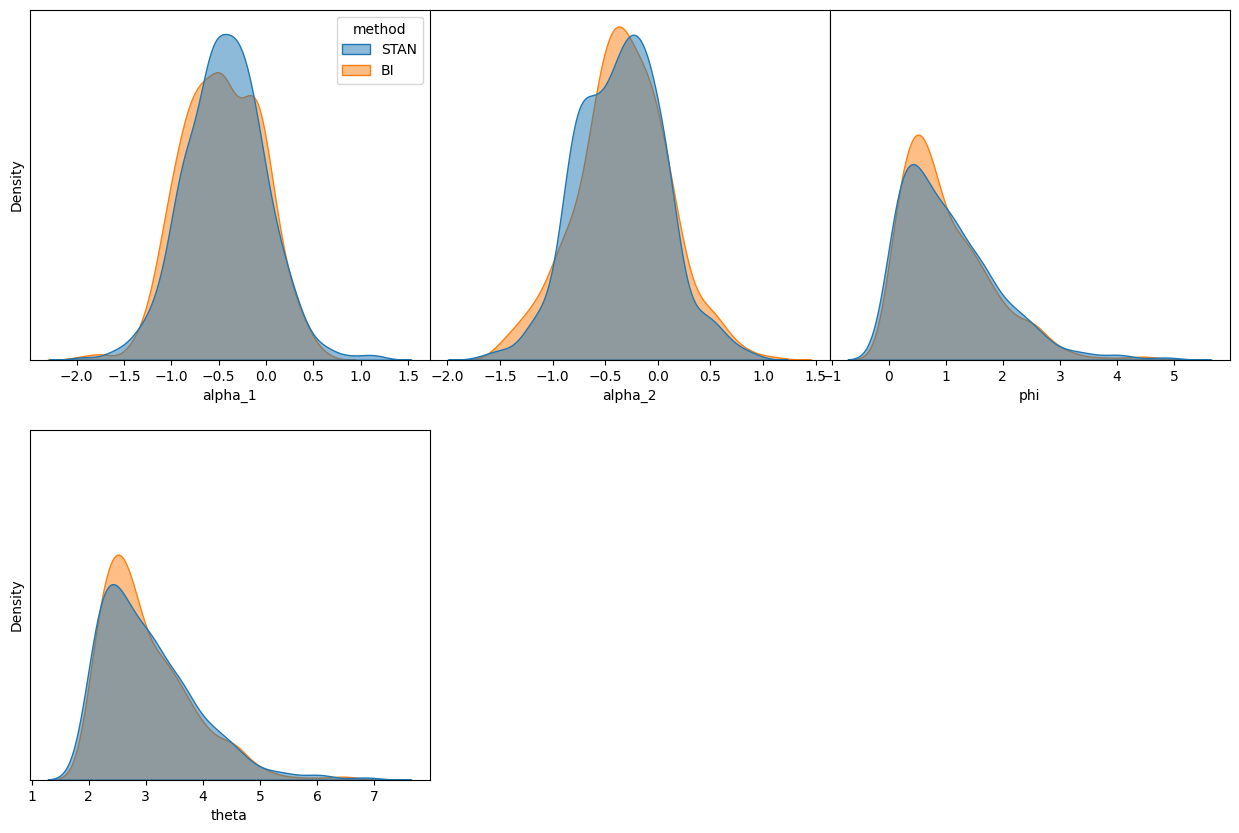

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [13]:
plot_comparaison(m, df)

In [15]:

def model(gid, applications, admit):
    phi = m.dist.exponential(1, shape=(1,), name = 'phi')
    alpha = m.dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta = numpyro.deterministic('theta', phi + 2)
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.dist.beta_binomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

nsim = 10
m = bi()
nsim = 10
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
gid = m.df.gid.values
phi = m.dist.exponential(1,  shape = (nsim,),sample=True)
alpha = m.dist.normal( 0., 1.5, shape=(nsim,2),sample=True)
theta = phi + 2
pbar = jax.vmap(lambda x: jax.nn.sigmoid(x[gid]))(alpha)
pbar.shape
i = 0
applications = jnp.array(m.df['applications'].values)
concentration1 = pbar[i]*theta[i]
concentration0 = (1 - pbar[i]) * theta[i]
admit = m.dist.beta_binomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0,sample=True)
m = bi()
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
m.df['admit'] = admit
m.data_to_model(['gid', 'applications', 'admit' ])
print(m.data_on_model)
m.fit(model, num_samples=500, progress_bar=False) 
s = m.summary()
s

jax.local_device_count 32
jax.local_device_count 32
{'gid': Array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64), 'applications': Array([825, 108, 560,  25, 325, 593, 417, 375, 191, 393, 373, 341], dtype=int64), 'admit': Array([113,  27, 418,   0,  45, 380, 109,  41,  25, 148, 268, 198], dtype=int64)}


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0] -0.48  0.41     -1.17       0.09       0.02     0.02    415.84   
alpha[1] -0.76  0.49     -1.62      -0.08       0.03     0.02    323.22   
phi[0]    0.77  0.67      0.00       1.64       0.03     0.02    248.66   
theta[0]  2.77  0.67      2.00       3.64       0.03     0.02    248.66   

          ess_tail  r_hat  
alpha[0]    313.43    NaN  
alpha[1]    274.34    NaN  
phi[0]      161.62    NaN  
theta[0]    161.62    NaN

### Parameter recovery

jax.local_device_count 32


arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/tmp/ipykernel_2795830/1330377728.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains

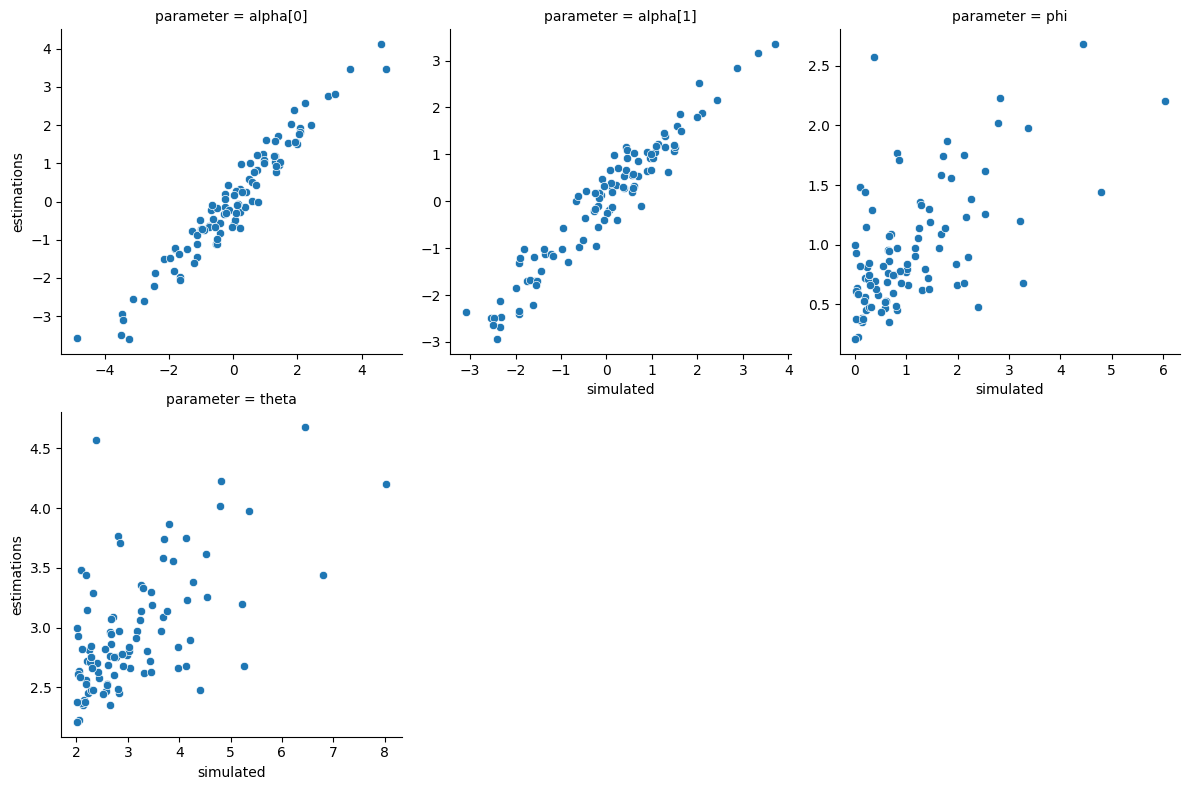

In [17]:
def model(gid, applications, admit):
    phi = m.dist.exponential(1,  name = 'phi')
    alpha = m.dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta = numpyro.deterministic('theta', phi + 2)
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.dist.beta_binomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

def sim_admit(theta, pbar, applications):
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta
    return m.dist.beta_binomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0,sample=True)


def estimate(theta, pbar, applications):
    admit = sim_admit(theta, pbar, applications) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data(data_path + 'UCBadmit.csv', sep=';') 
    m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
    m.df['admit'] = admit
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(phi,alpha, theta, pbar, applications, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(theta[i], pbar[i], applications)
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([alpha[i,][0][None], alpha[i,][1][None],phi[i][None],theta[i][None]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

m = bi()
nsim = 100
m.data(data_path + 'UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
gid=jnp.array(m.df.gid.values)
applications=jnp.array(m.df.applications.values)


phi = m.dist.exponential(1,  shape = (nsim,),sample=True)
alpha = m.dist.normal( 0., 1.5, shape=(nsim,2),sample=True)
theta = phi + 2
pbar = jax.vmap(lambda x: jax.nn.sigmoid(x[gid]))(alpha)
param_recovery(phi,alpha, theta, pbar, applications, nsim) 



## <a id='toc2_10_'></a>[Zero inflated outcomes](#toc0_)

### <a id='toc2_10_1_'></a>[BI](#toc0_)

In [12]:
from jax.scipy.special import expit
import random as r
r.seed(42)
# Define parameters
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day

# sample one year of production
N = 365

np.random.seed(365)
drink = np.random.binomial(1, prob_drink, N)
y = (1 - drink) * np.random.poisson(rate_work, N)
d = pd.DataFrame(y)

# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------

m.data_on_model = dict(
    y = jnp.array(y)
)

def model(y):
    ap = m.dist.normal( -1.5, 1,  name = 'ap')
    p = expit(ap)

    al = m.dist.normal( 1, 0.5,  name = 'al')
    lambda_ = jnp.exp(al)    
    
    m.dist.zero_inflated_poisson(p, lambda_, obs=y)

# Run sampler ------------------------------------------------
m.fit(model) 
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 431.42it/s, 7 steps of size 5.16e-01. acc. prob=0.92]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
al  0.11  0.08     -0.03       0.24       0.01     0.00    148.93    162.86   
ap -1.37  0.37     -1.86      -0.79       0.03     0.03    160.41    163.70   

    r_hat  
al    NaN  
ap    NaN

### <a id='toc2_10_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Simulate data ------------------------------------------------
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day
# sample one year of production
N = as.integer(365)
drink = bi.dist.binomial(total_count = as.integer(1), probs = prob_drink, shape = c(N), sample = T ) # An example of sampling a distribution with BI
y = (1 - drink) *  bi.dist.poisson(rate_work, shape = c(N), sample = T)
data = list()
data$y = y 
m$data_on_model = data

# Define model ------------------------------------------------
model <- function(y){
  al =  bi.dist.normal(0, 5, name='al', shape=c(1))
  ap = bi.dist.normal(0, 5, name='ap', shape=c(1))
  p = jax$scipy$special$expit(ap)
  lambda_ = jnp$exp(al)
  bi.dist.zero_inflated_poisson(p, lambda_, obs=y)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


### <a id='toc2_10_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """ 
data{
    array[365] int y;
}
parameters{
    real al;
    real ap;
    
}
model{
    real p;
    real lambda;
    al ~ normal( 1 , 0.5 );
    ap ~ normal( -1.5 , 1 );   
    
    lambda = al;
    lambda = exp(lambda);
    p = ap;
    p = inv_logit(p);
    for ( i in 1:365 ) {
        if ( y[i]==0 )
            target += log_mix( p , 0 , poisson_lpmf(0|lambda) );
        if ( y[i] > 0 )
            target += log1m( p ) + poisson_lpmf(y[i] | lambda );
    }
}
"""
data = {
    'y' :d.iloc[:,0].values.astype(int)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_10_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_10_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
import pandas as pd
from jax.scipy.special import expit

def model(y):
    ap = m.dist.normal( -1.5, 1,  name = 'ap')
    p = expit(ap)

    al = m.dist.normal( 1, 0.5,  name = 'al')
    lambda_ = jnp.exp(al)    
    
    m.dist.zeroinflatedpoisson(p, lambda_, obs=y)

def sim_prod(prob_drink, rate_work ):
    drink = m.dist.binomial(1, prob_drink, shape=(365,),sample=True)
    y = (1 - drink) *  m.dist.poisson(rate_work, shape=(365,),sample=True)
    return drink, y
    
def estimate(prob_drink, rate_work):
    drink, y = sim_prod(prob_drink, rate_work) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data_on_model = dict(y = y)
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(prob_drink, rate_work,  nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(prob_drink[i], rate_work[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([rate_work[i][None],prob_drink[i][None]]), 
                'estimations': estimations.values}
        data = pd.DataFrame(data)
        # Converting parameters to there oringinal scale
        data.loc[data['parameter'].isin(['al']), 'estimations'] = jnp.exp(
            data.loc[data['parameter'].isin(['al']), 'estimations'].values
        )
        data.loc[data['parameter'].isin(['ap']), 'estimations'] = expit(
            data.loc[data['parameter'].isin(['ap']), 'estimations'].values
        )
        df = pd.concat([df, data], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
nsim = 100

prob_drink = m.link.inv_logit(m.dist.normal(-1.5, 1, shape=(nsim,), sample=True, seed = 1))
rate_work = jnp.exp(m.dist.normal(1, 0.5, shape=(nsim,), sample=True, seed = 10))
tmp = param_recovery(prob_drink, rate_work, nsim)

## <a id='toc2_11_'></a>[OrderedLogistic (Todo: PB)](#toc0_)

In [ ]:
#import numpyro.distributions as dist
## setup platform------------------------------------------------
#m = bi()
## import data ------------------------------------------------
#m.data('resources/data/Trolley.csv', sep=';') 
#d = m.df
## discrete proportion of each response value
#pr_k = d.response.value_counts().sort_index().values / d.shape[0]
## cumsum converts to cumulative proportions
#cum_pr_k = jnp.cumsum(pr_k, -1)
#logit = lambda x: jnp.log(x / (1 - x))  # convenience function
#lco = logit(cum_pr_k)

In [ ]:
#import numpyro.distributions as distnp
#from numpyro.distributions.transforms import OrderedTransform
## setup platform------------------------------------------------
#m = bi()
#m.data_on_model = dict(response = jnp.array(d.response.values - 1))
#def model(response):
#    cutpoints = numpyro.sample(
#        
#        distnp.TransformedDistribution("cutpoints",
#            distnp.Normal(0, 1.5), OrderedTransform()
#        ),
#    )
#    numpyro.sample("R", dist.OrderedLogistic(0, cutpoints), obs=response)
#
## Run sampler ------------------------------------------------
#start = tm.time()    
#m.fit(model) 
#end = tm.time()    
#print(f"BI took: {end - start:.4f} seconds")
#
## Diagnostic ------------------------------------------------
#m.sampler.print_summary(0.89)

## <a id='toc2_12_'></a>[Varying interceps](#toc0_)

### <a id='toc2_12_1_'></a>[BI](#toc0_)

### Raw

In [5]:
# Setup device------------------------------------------------
m = bi(platform='cpu')

# Import Data & Data Manipulation ------------------------------------------------
# Import
from importlib.resources import files
m.data(data_path + 'reedfrogs.csv', sep=';') 
# Manipulate
m.df["tank"] = np.arange(m.df.shape[0]) 

# Define model ------------------------------------------------
def model(tank, surv, density):
    sigma = m.dist.exponential( 1,  name = 'sigma')
    bar_alpha = m.dist.normal( 0., 1.5,  name = 'a_bar')
    alpha = m.dist.normal( bar_alpha, sigma, shape= tank.shape, name = 'alpha')
    p = alpha[tank]
    m.dist.binomial(total_count = density, logits = p, obs=surv)

# Run sampler ------------------------------------------------
m.fit(model) 
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 421.29it/s, 15 steps of size 4.16e-01. acc. prob=0.89]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a_bar      1.35  0.24      0.97       1.72       0.01     0.01    633.63   
alpha[0]   2.05  0.85      0.65       3.31       0.03     0.03    652.33   
alpha[1]   3.13  1.13      1.31       4.81       0.05     0.05    572.70   
alpha[2]   0.99  0.62     -0.10       1.80       0.03     0.03    602.67   
alpha[3]   3.07  1.09      1.40       4.78       0.05     0.04    505.63   
alpha[4]   2.19  0.91      0.55       3.38       0.04     0.04    635.03   
alpha[5]   2.18  0.86      0.81       3.39       0.04     0.05    536.84   
alpha[6]   3.12  1.13      1.44       4.90       0.05     0.06    466.67   
alpha[7]   2.15  0.84      0.68       3.27       0.04     0.03    543.71   
alpha[8]  -0.17  0.60     -1.19       0.63       0.02     0.03    606.92   
alpha[9]   2.04  0.83      0.86       3.44       0.03     0.05    803.79   
alpha[10]  1.04  0.72     -0.13       2.09       0.03     0.04    512.90   
alpha[11]  0.56  0.61     -0.46       1.51       0.03     0.03    494.47   
alpha[12]  0.99  0.72     -0.08       2.08       0.03     0.03    524.79   
alpha[13]  0.23  0.62     -0.71       1.25       0.02     0.03    625.97   
alpha[14]  2.09  0.84      0.75       3.32       0.04     0.05    663.57   
alpha[15]  2.14  0.94      0.65       3.41       0.04     0.05    548.12   
alpha[16]  2.90  0.79      1.69       4.11       0.03     0.03    597.02   
alpha[17]  2.44  0.66      1.40       3.47       0.03     0.03    564.06   
alpha[18]  2.04  0.57      1.23       2.98       0.02     0.03    591.06   
alpha[19]  3.68  1.02      2.00       5.04       0.05     0.07    426.53   
alpha[20]  2.35  0.65      1.36       3.43       0.03     0.03    576.38   
alpha[21]  2.45  0.71      1.36       3.52       0.03     0.03    617.23   
alpha[22]  2.37  0.69      1.29       3.51       0.04     0.07    477.24   
alpha[23]  1.66  0.49      0.80       2.41       0.02     0.02    621.86   
alpha[24] -1.01  0.43     -1.54      -0.23       0.02     0.02    644.32   
alpha[25]  0.14  0.44     -0.47       0.81       0.02     0.04    513.44   
alpha[26] -1.43  0.51     -2.18      -0.64       0.02     0.03    667.92   
alpha[27] -0.47  0.42     -1.06       0.25       0.02     0.02    542.23   
alpha[28]  0.17  0.40     -0.45       0.78       0.02     0.02    441.97   
alpha[29]  1.47  0.51      0.55       2.19       0.03     0.03    424.12   
alpha[30] -0.65  0.44     -1.44      -0.02       0.02     0.02    571.47   
alpha[31] -0.31  0.42     -1.01       0.37       0.02     0.02    380.18   
alpha[32]  3.17  0.83      1.88       4.36       0.04     0.04    491.97   
alpha[33]  2.67  0.60      1.70       3.50       0.02     0.02    622.86   
alpha[34]  2.71  0.67      1.65       3.74       0.03     0.03    475.76   
alpha[35]  2.07  0.52      1.36       2.88       0.02     0.03    501.43   
alpha[36]  2.09  0.55      1.24       2.83       0.02     0.03    694.71   
alpha[37]  3.87  0.95      2.37       5.27       0.04     0.04    658.35   
alpha[38]  2.69  0.64      1.65       3.57       0.03     0.03    568.95   
alpha[39]  2.35  0.56      1.56       3.34       0.02     0.03    573.72   
alpha[40] -1.81  0.45     -2.50      -1.11       0.02     0.02    557.31   
alpha[41] -0.59  0.33     -1.17      -0.12       0.01     0.02    491.56   
alpha[42] -0.47  0.37     -1.04       0.13       0.02     0.02    587.69   
alpha[43] -0.35  0.36     -0.88       0.31       0.02     0.02    582.66   
alpha[44]  0.59  0.33      0.10       1.17       0.01     0.02    537.64   
alpha[45] -0.58  0.36     -1.10       0.02       0.01     0.02    607.18   
alpha[46]  2.07  0.47      1.40       2.86       0.02     0.02    750.30   
alpha[47]  0.00  0.34     -0.47       0.60       0.02     0.02    436.84   
sigma      1.62  0.22      1.28       1.94       0.01     0.01    305.03   

           ess_tail  r_hat  
a_bar        436.23    NaN  
alpha[0]     426.83    NaN  
alpha[1]     405.04    NaN  
alpha[2]     328.4

### Build in function

In [ ]:
# Setup device------------------------------------------------
m = bi(platform='cpu')

# Import Data & Data Manipulation ------------------------------------------------
# Import
from importlib.resources import files
m.data(data_path + 'reedfrogs.csv', sep=';') 
# Manipulate
m.df["tank"] = np.arange(m.df.shape[0]) 

# Define model ------------------------------------------------
def model(tank, surv, density):
    alpha = m.effects.varying_intercept(N_groups=48,group_id=tank,group_name = 'tank')
    m.dist.binomial(total_count = density, logits = alpha, obs=surv)

# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1098.70it/s, 7 steps of size 4.52e-01. acc. prob=0.88]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
global_intercept_tank  1.36  0.26      0.99       1.78       0.01     0.01   
intercept_tank[0]      2.13  0.86      0.84       3.53       0.03     0.03   
intercept_tank[1]      3.11  1.13      1.22       4.64       0.05     0.04   
intercept_tank[2]      1.05  0.67     -0.06       2.02       0.03     0.02   
intercept_tank[3]      3.08  1.09      1.34       4.83       0.04     0.03   
intercept_tank[4]      2.18  0.87      0.72       3.46       0.03     0.02   
intercept_tank[5]      2.19  0.91      0.85       3.55       0.04     0.04   
intercept_tank[6]      3.14  1.14      1.43       4.92       0.05     0.04   
intercept_tank[7]      2.20  0.90      0.98       3.64       0.04     0.04   
intercept_tank[8]     -0.18  0.60     -1.07       0.80       0.03     0.03   
intercept_tank[9]      2.11  0.83      0.80       3.35       0.03     0.03   
intercept_tank[10]     1.07  0.74     -0.20       2.12       0.03     0.03   
intercept_tank[11]     0.58  0.63     -0.45       1.54       0.02     0.02   
intercept_tank[12]     0.99  0.71     -0.07       2.14       0.03     0.02   
intercept_tank[13]     0.24  0.60     -0.76       1.11       0.03     0.02   
intercept_tank[14]     2.16  0.89      0.76       3.50       0.04     0.03   
intercept_tank[15]     2.11  0.89      0.82       3.55       0.05     0.04   
intercept_tank[16]     2.93  0.80      1.70       4.17       0.03     0.03   
intercept_tank[17]     2.42  0.64      1.47       3.48       0.03     0.02   
intercept_tank[18]     2.04  0.61      1.02       2.85       0.03     0.02   
intercept_tank[19]     3.68  0.95      2.22       5.19       0.05     0.04   
intercept_tank[20]     2.40  0.65      1.32       3.43       0.02     0.02   
intercept_tank[21]     2.44  0.74      1.39       3.69       0.03     0.03   
intercept_tank[22]     2.42  0.70      1.30       3.48       0.05     0.04   
intercept_tank[23]     1.68  0.52      0.83       2.46       0.02     0.02   
intercept_tank[24]    -0.97  0.48     -1.64      -0.18       0.02     0.02   
intercept_tank[25]     0.13  0.43     -0.48       0.76       0.02     0.02   
intercept_tank[26]    -1.42  0.49     -2.15      -0.64       0.02     0.02   
intercept_tank[27]    -0.47  0.40     -1.08       0.13       0.02     0.01   
intercept_tank[28]     0.18  0.40     -0.48       0.75       0.02     0.02   
intercept_tank[29]     1.47  0.51      0.70       2.28       0.03     0.02   
intercept_tank[30]    -0.62  0.44     -1.30       0.09       0.02     0.02   
intercept_tank[31]    -0.36  0.44     -1.07       0.36       0.02     0.02   
intercept_tank[32]     3.16  0.81      1.85       4.35       0.04     0.03   
intercept_tank[33]     2.70  0.61      1.68       3.65       0.03     0.02   
intercept_tank[34]     2.74  0.68      1.80       3.88       0.03     0.02   
intercept_tank[35]     2.07  0.47      1.38       2.86       0.02     0.02   
intercept_tank[36]     2.07  0.51      1.26       2.84       0.02     0.02   
intercept_tank[37]     3.92  0.99      2.33       5.43       0.05     0.03   
intercept_tank[38]     2.68  0.63      1.68       3.54       0.03     0.02   
intercept_tank[39]     2.34  0.51      1.59       3.24       0.02     0.02   
intercept_tank[40]    -1.80  0.46     -2.55      -1.16       0.02     0.01   
intercept_tank[41]    -0.57  0.36     -1.16      -0.02       0.01     0.01   
intercept_tank[42]    -0.44  0.34     -1.00       0.07       0.01     0.01   
intercept_tank[43]    -0.34  0.33     -0.83       0.24       0.01     0.01   
intercept_tank[44]     0.58  0.32      0.08       1.11       0.01     0.01   
intercept_tank[45]    -0.56  0.36     -1.13       0.02       0.01     0.01   
intercept_tank[46]     2.07  0.50      1.26       2.76       0.02     0.02   
intercept_tank[47]     0.01  0.36     -0.48       0.65       0.01     0.02   
sd_tank                1.62  0.20      1.28       1.90       0.01     0.01   

                       ess_bulk  ess_tail  r

### <a id='toc2_12_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(data_path,"/reedfrogs.csv", sep = ''), sep=';')
m$df$tank = c(0:(nrow(m$df)-1)) # Manipulate
m$data_to_model(list('tank', 'surv', 'density')) # Manipulate
m$data_on_model$tank = m$data_on_model$tank$astype(jnp$int32) # Manipulate
m$data_on_model$surv = m$data_on_model$surv$astype(jnp$int32) # Manipulate


# Define model ------------------------------------------------
model <- function(tank, surv, density){
  # Parameters priors distributions
  sigma = bi.dist.exponential( 1,  name = 'sigma',shape=c(1))
  a_bar = bi.dist.normal(0, 1.5, name='a_bar',shape=c(1))
  alpha = bi.dist.normal(a_bar, sigma, name='alpha', shape =c(48))
  p = alpha[tank]
  # Likelihood
  bi.dist.binomial(total_count = density, logits = p, obs=surv)
} 

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_12_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """ 
data{
    array[48] int N;
    array[48] int S;
    array[48] int tank;
}
parameters{
    real a_bar;
    vector[48] a;    
    real<lower=0> sigma;
}
model{
    vector[48] p;
    sigma ~ exponential( 1 );
    a_bar ~ normal( 0 , 1.5 );
    a ~ normal( a_bar , sigma );
    for ( i in 1:48 ) {
        p[i] = a[tank[i]];
        p[i] = inv_logit(p[i]);
    }
    S ~ binomial( N , p );
}
"""
data = {
    'S' : m.df['surv'].values.astype(int),
    'N' : m.df['density'].values.astype(int),
    'tank' : m.df['tank'].values.astype(int)+1,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### <a id='toc2_12_4_'></a>[Output comparison](#toc0_)

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_12_5_'></a>[Parameter recovery](#toc0_)

In [ ]:
import pandas as pd

def model(tank, surv, density):
    sigma = m.dist.exponential( 1, shape=(1,), name = 'sigma')
    a_bar = m.dist.normal( 0., 1.5, shape=(1,), name = 'a_bar')
    alpha = m.dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha')
    p = alpha[tank]
    m.dist.binomial(total_count = density, logits = p, obs=surv)

def sim_surv(tank, density, sigma, a_bar, alpha):
    p = alpha[tank]
    return m.dist.binomial(total_count = density, logits = p, sample=True)

def estimate(tank, density, sigma, a_bar, alpha):
    surv = sim_surv(tank, density, sigma, a_bar, alpha) # Simulate data
    # Run model
    m = bi(print_devices_found=False)
    m.data(data_path + 'reedfrogs.csv', sep=';') 
    m.df["tank"] = np.arange(m.df.shape[0])
    m.df['surv']=surv
    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(tank, density, sigma, a_bar, alpha, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(tank, density, sigma[i], a_bar[i], alpha[:,i,0])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a_bar[i], alpha[:,i,0], sigma[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
m.data(data_path + 'reedfrogs.csv', sep=';') 
nsim = 100
m.df["tank"] = np.arange(m.df.shape[0])
tank = jnp.array(m.df["tank"].values)
density = jnp.array(m.df["density"].values)
sigma = m.dist.exponential( 1, shape = (nsim,1),  sample=True)
a_bar = m.dist.normal( 0., 1.5,  shape = (nsim,1), sample=True)    
alpha = m.dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha', sample=True)
param_recovery(tank, density, sigma, a_bar, alpha, nsim)

## <a id='toc2_13_'></a>[Varying effects](#toc0_)

### <a id='toc2_13_1_'></a>[Data simulation](#toc0_)

In [ ]:
import numpyro.distributions as dd
import pandas as pd
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)


import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

a = 3.5  # average morning wait time
b = -1  # average difference afternoon wait time
sigma_a = 1  # std dev in intercepts
sigma_b = 0.5  # std dev in slopes
rho = -0.7  # correlation between intercepts and slopes
Mu = jnp.array([a, b])
cov_ab = sigma_a * sigma_b * rho
Sigma = jnp.array([[sigma_a**2, cov_ab], [cov_ab, sigma_b**2]])
jnp.array([1, 2, 3, 4]).reshape(2, 2).T
sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

# now matrix multiply to get covariance matrix
Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)

N_cafes = 20
seed = jax.random.PRNGKey(5)  # used to replicate example
vary_effects = m.dist.multivariate_normal(Mu, Sigma, shape=(N_cafes,), sample = True)
a_cafe = vary_effects[:, 0]
b_cafe = vary_effects[:, 1]

seed = jax.random.PRNGKey(22)
N_visits = 10
afternoon = jnp.tile(jnp.arange(2), N_visits * N_cafes // 2)
cafe_id = jnp.repeat(jnp.arange(N_cafes), N_visits)
mu = a_cafe[cafe_id] + b_cafe[cafe_id] * afternoon
sigma = 0.5  # std dev within cafes
wait = m.dist.normal(mu, sigma, sample = True)
d = pd.DataFrame(dict(cafe=cafe_id, afternoon=afternoon, wait=wait))
d.to_csv(data_path + 'Sim data multivariatenormal.csv', index=False)

jax.local_device_count 32


### <a id='toc2_13_2_'></a>[BI](#toc0_)

#### Build in function 

In [ ]:
def varying_intercept_slope2(
        N_vars,
        N_group,
        group_id,
        group_name = 'age',
        alpha_bar =  None,    
        beta_bar =  None, 
        sd_intercept =  None,       
        sd_beta =  None,
        corr = None,
        centered_version = False,
        sample=False
    ):

    # 1. Priors.
    if alpha_bar is None:
        alpha_bar = m.dist.normal(5, 2, name='global_intercept', sample=sample, shape = (1,))

    if beta_bar is None:
        beta_bar = m.dist.normal(-1, 0.5, name='global_beta', sample=sample, shape = (N_vars,))

    # 2. Hyperpriors.
    if sd_intercept is None:
        sd_intercept = m.dist.exponential(1, shape=(1,), name = 'sd_intercept', sample = sample)

    if sd_beta is None:
        sd_beta = m.dist.exponential(1, shape=(N_vars,), name = 'sd_beta', sample = sample)

    mu = jnp.concat([alpha_bar, beta_bar])
    sigma = jnp.concat([sd_intercept, sd_beta])


    if centered_version == False:       
        if corr is None:
            L_corr = m.dist.lkj_cholesky((N_vars + 1), 2, name = f'L_corr', sample = sample) 

        z = m.dist.normal(0, 1, name="z", shape=(N_vars + 1 , N_group), sample=sample)

        effects = (L_corr @ z).T * sigma + mu

        params_for_obs = effects[group_id]
        varying_intercepts = params_for_obs[:, 0]
        varying_slopes = params_for_obs[:, 1:]
        return varying_intercepts, varying_slopes
    
    else:
        if corr is None:
            corr = m.dist.lkj((N_vars + 1), 2, name = f'corr_{group_name}', sample = sample) 
        cov = jnp.diag(sigma) @ corr @ jnp.diag(sigma)
        #cov = jnp.outer(sigma, sigma) * corr
        group_params =  m.dist.multivariate_normal(
            mu, 
            cov, 
            shape = (N_group,), 
            name = f'{group_name}_mvn', 
            sample = sample
        )  

        tmp =  group_params[group_id]
        return tmp[:,0], tmp[:,1:] # intercept, slopes

t = varying_intercept_slope2(
    N_vars = 2,
    N_group = 2,
    group_id = jnp.array([0,1,1,1,1,0,1,0,1,0,1,0]),
    sample=True,
    centered_version = True
)


In [ ]:
import numpyro

# import data ------------------------------------------------
m = bi()
m.data(data_path + 'Sim data multivariatenormal.csv', sep = ',')

m.data_on_model = dict(
    cafe = jnp.array(m.df.cafe.values, dtype=jnp.int32),
    wait = jnp.array(m.df.wait.values, dtype=jnp.float32),
    N_cafes = len(m.df.cafe.unique()),
    afternoon = jnp.array(m.df.afternoon.values, dtype=jnp.float32)
)


def model(cafe, wait, N_cafes, afternoon):
    sigma = m.dist.exponential( 1,  name = 'sigma')
    varying_intercept, varying_slope = m.effects.varying_effects(
        N_vars = 1,
        N_group = N_cafes,
        group_id = cafe, 
        group_name='cafe',
        centered=True
    )

    mu = varying_intercept + varying_slope[:,0] * afternoon 
    # If you have multiple variables you can do :
    # varying_slope[:,0] * var1 + varying_slope[:,1] * var2  etc
    # or 
    # varying_slope @ X where X is your design matrix
    m.dist.normal(mu, sigma, obs=wait)


# Run sampler ------------------------------------------------
m.fit(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 500.77it/s, 15 steps of size 2.98e-01. acc. prob=0.89]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
cafe_mvn[0, 0]       3.55  0.22      3.19       3.87       0.01     0.01   
cafe_mvn[0, 1]      -1.56  0.30     -1.98      -1.03       0.01     0.01   
cafe_mvn[1, 0]       5.35  0.22      5.03       5.73       0.01     0.01   
cafe_mvn[1, 1]      -1.42  0.29     -1.86      -0.97       0.01     0.01   
cafe_mvn[2, 0]       3.52  0.22      3.19       3.89       0.01     0.01   
cafe_mvn[2, 1]      -1.27  0.31     -1.74      -0.76       0.01     0.01   
cafe_mvn[3, 0]       4.40  0.23      4.04       4.77       0.01     0.01   
cafe_mvn[3, 1]      -1.29  0.31     -1.83      -0.80       0.02     0.01   
cafe_mvn[4, 0]       3.57  0.23      3.23       3.94       0.01     0.01   
cafe_mvn[4, 1]      -1.60  0.29     -2.03      -1.14       0.01     0.01   
cafe_mvn[5, 0]       4.24  0.22      3.90       4.59       0.01     0.01   
cafe_mvn[5, 1]      -1.75  0.29     -2.15      -1.23       0.01     0.01   
cafe_mvn[6, 0]       4.10  0.22      3.74       4.44       0.01     0.01   
cafe_mvn[6, 1]      -0.22  0.30     -0.72       0.24       0.01     0.01   
cafe_mvn[7, 0]       3.79  0.22      3.45       4.13       0.01     0.01   
cafe_mvn[7, 1]      -1.10  0.29     -1.55      -0.60       0.01     0.01   
cafe_mvn[8, 0]       3.50  0.21      3.18       3.82       0.01     0.01   
cafe_mvn[8, 1]      -1.51  0.27     -1.89      -1.05       0.01     0.01   
cafe_mvn[9, 0]       3.24  0.21      2.92       3.58       0.01     0.01   
cafe_mvn[9, 1]      -0.35  0.29     -0.77       0.13       0.02     0.01   
cafe_mvn[10, 0]      3.28  0.21      2.93       3.60       0.01     0.01   
cafe_mvn[10, 1]     -0.61  0.30     -1.02      -0.11       0.01     0.01   
cafe_mvn[11, 0]      3.84  0.21      3.51       4.17       0.01     0.01   
cafe_mvn[11, 1]     -1.47  0.28     -1.90      -1.04       0.01     0.01   
cafe_mvn[12, 0]      1.93  0.22      1.61       2.31       0.01     0.01   
cafe_mvn[12, 1]     -0.80  0.29     -1.22      -0.27       0.01     0.01   
cafe_mvn[13, 0]      4.39  0.22      4.01       4.72       0.01     0.01   
cafe_mvn[13, 1]     -2.20  0.29     -2.70      -1.77       0.01     0.01   
cafe_mvn[14, 0]      2.90  0.21      2.57       3.24       0.01     0.01   
cafe_mvn[14, 1]     -0.76  0.29     -1.14      -0.26       0.01     0.01   
cafe_mvn[15, 0]      2.25  0.23      1.90       2.64       0.01     0.01   
cafe_mvn[15, 1]     -0.45  0.32     -1.00       0.02       0.02     0.01   
cafe_mvn[16, 0]      4.68  0.22      4.37       5.05       0.01     0.01   
cafe_mvn[16, 1]     -2.06  0.30     -2.56      -1.60       0.01     0.01   
cafe_mvn[17, 0]      2.46  0.22      2.16       2.88       0.01     0.01   
cafe_mvn[17, 1]     -1.19  0.29     -1.67      -0.78       0.01     0.01   
cafe_mvn[18, 0]      2.52  0.23      2.14       2.84       0.01     0.01   
cafe_mvn[18, 1]     -0.18  0.30     -0.60       0.32       0.01     0.01   
cafe_mvn[19, 0]      2.83  0.21      2.50       3.15       0.01     0.01   
cafe_mvn[19, 1]     -0.58  0.29     -1.02      -0.14       0.01     0.01   
corr_cafe[0, 0]      1.00  0.00      1.00       1.00       0.00     0.00   
corr_cafe[0, 1]     -0.49  0.19     -0.80      -0.22       0.01     0.01   
corr_cafe[1, 0]     -0.49  0.19     -0.80      -0.22       0.01     0.01   
corr_cafe[1, 1]      1.00  0.00      1.00       1.00       0.00     0.00   
global_beta[0]      -1.11  0.16     -1.37      -0.88       0.01     0.01   
global_intercept[0]  3.52  0.20      3.26       3.83       0.01     0.01   
sd_beta[0]           0.69  0.13      0.50       0.88       0.01     0.00   
sd_intercept[0]      0.93  0.16      0.66       1.15       0.01     0.01   
sigma                0.51  0.03      0.46       0.55       0.00     0.00   

                     ess_bulk  ess_tail  r_hat  
cafe_mvn[0, 0]         463.12    408.34    NaN  
cafe_mvn[0, 1]         458.38    371.63    NaN  
cafe_mvn[1, 0]         533.66    456.53    NaN  
cafe_mvn[1, 1]         5

#### Raw

In [6]:
# import data ------------------------------------------------
m = bi()
m.data(data_path + 'Sim data multivariatenormal.csv', sep = ',')

m.data_on_model = dict(
    cafe = jnp.array(m.df.cafe.values, dtype=jnp.int32),
    wait = jnp.array(m.df.wait.values, dtype=jnp.float32),
    N_cafes = len(m.df.cafe.unique()),
    afternoon = jnp.array(m.df.afternoon.values, dtype=jnp.float32)
)

def model(cafe, wait, N_cafes, afternoon):
    alpha = m.dist.normal(5, 2,  name = 'a')
    beta = m.dist.normal(-1, 0.5, name = 'b')
    sigma = m.dist.exponential( 1,  name = 'sigma')

    sigma_cafe = m.dist.exponential(1, shape=(2,),  name = 'sigma_cafe')
    Rho = m.dist.lkj(2, 2, name = 'Rho')
    
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho

    a_cafe_b_cafe = m.dist.multivariate_normal(jnp.stack([alpha, beta]), cov, shape = [N_cafes], name = 'a_b_cafe')    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.dist.normal(mu, sigma, obs=wait)

# Run sampler ------------------------------------------------
m.fit(model) 
m.latex()

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:05<00:00, 194.86it/s, 31 steps of size 2.46e-01. acc. prob=0.89]


<IPython.core.display.Latex object>

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
/home/sosa/work/.venv/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning:

invalid value encountered in scalar divide



mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
Rho[0, 0]        1.00  0.00      1.00       1.00       0.00      NaN   
Rho[0, 1]       -0.68  0.17     -0.91      -0.44       0.01     0.01   
Rho[1, 0]       -0.68  0.17     -0.91      -0.44       0.01     0.01   
Rho[1, 1]        1.00  0.00      1.00       1.00       0.00     0.00   
a                3.53  0.23      3.16       3.85       0.01     0.01   
a_b_cafe[0, 0]   3.02  0.21      2.71       3.36       0.01     0.01   
a_b_cafe[0, 1]  -0.67  0.25     -1.05      -0.26       0.01     0.01   
a_b_cafe[1, 0]   2.01  0.24      1.65       2.40       0.01     0.01   
a_b_cafe[1, 1]  -0.18  0.30     -0.69       0.27       0.02     0.02   
a_b_cafe[2, 0]   2.85  0.21      2.55       3.21       0.01     0.01   
a_b_cafe[2, 1]  -0.66  0.25     -1.05      -0.27       0.01     0.01   
a_b_cafe[3, 0]   4.43  0.21      4.10       4.73       0.01     0.01   
a_b_cafe[3, 1]  -1.33  0.25     -1.70      -0.94       0.01     0.01   
a_b_cafe[4, 0]   3.35  0.21      3.00       3.69       0.01     0.01   
a_b_cafe[4, 1]  -1.12  0.26     -1.53      -0.73       0.01     0.01   
a_b_cafe[5, 0]   3.83  0.22      3.46       4.14       0.01     0.01   
a_b_cafe[5, 1]  -0.90  0.24     -1.27      -0.50       0.01     0.01   
a_b_cafe[6, 0]   4.48  0.21      4.18       4.81       0.01     0.01   
a_b_cafe[6, 1]  -1.52  0.26     -1.90      -1.12       0.01     0.01   
a_b_cafe[7, 0]   3.52  0.21      3.22       3.87       0.01     0.01   
a_b_cafe[7, 1]  -1.06  0.25     -1.44      -0.67       0.01     0.01   
a_b_cafe[8, 0]   3.68  0.19      3.33       3.96       0.01     0.01   
a_b_cafe[8, 1]  -1.15  0.24     -1.55      -0.82       0.01     0.01   
a_b_cafe[9, 0]   3.05  0.20      2.72       3.35       0.01     0.01   
a_b_cafe[9, 1]  -1.05  0.24     -1.40      -0.63       0.01     0.01   
a_b_cafe[10, 0]  4.64  0.20      4.32       4.94       0.01     0.01   
a_b_cafe[10, 1] -1.10  0.23     -1.48      -0.75       0.01     0.01   
a_b_cafe[11, 0]  4.04  0.20      3.70       4.36       0.01     0.01   
a_b_cafe[11, 1] -0.89  0.25     -1.26      -0.45       0.01     0.01   
a_b_cafe[12, 0]  3.75  0.23      3.39       4.11       0.01     0.01   
a_b_cafe[12, 1] -0.55  0.29     -1.03      -0.09       0.02     0.01   
a_b_cafe[13, 0]  3.53  0.20      3.18       3.81       0.01     0.01   
a_b_cafe[13, 1] -1.08  0.25     -1.49      -0.68       0.01     0.01   
a_b_cafe[14, 0]  4.09  0.21      3.74       4.40       0.01     0.01   
a_b_cafe[14, 1] -1.37  0.25     -1.79      -1.01       0.01     0.01   
a_b_cafe[15, 0]  5.02  0.21      4.70       5.34       0.01     0.01   
a_b_cafe[15, 1] -1.49  0.26     -1.87      -1.03       0.01     0.01   
a_b_cafe[16, 0]  1.70  0.22      1.33       2.03       0.01     0.01   
a_b_cafe[16, 1] -0.35  0.26     -0.78       0.02       0.01     0.01   
a_b_cafe[17, 0]  4.37  0.20      4.04       4.69       0.01     0.01   
a_b_cafe[17, 1] -1.06  0.25     -1.43      -0.64       0.01     0.01   
a_b_cafe[18, 0]  3.80  0.20      3.47       4.09       0.01     0.01   
a_b_cafe[18, 1] -1.17  0.24     -1.56      -0.83       0.01     0.01   
a_b_cafe[19, 0]  1.28  0.20      0.97       1.57       0.01     0.01   
a_b_cafe[19, 1] -0.41  0.25     -0.80      -0.00       0.01     0.01   
b               -0.95  0.12     -1.13      -0.77       0.01     0.01   
sigma            0.51  0.03      0.47       0.56       0.00     0.00   
sigma_cafe[0]    1.01  0.16      0.74       1.22       0.01     0.01   
sigma_cafe[1]    0.45  0.10      0.30       0.64       0.01     0.00   

                 ess_bulk  ess_tail  r_hat  
Rho[0, 0]          500.00    500.00    NaN  
Rho[0, 1]          173.88    181.85    NaN  
Rho[1, 0]          173.88    181.85    NaN  
Rho[1, 1]          487.73    456.38    NaN  
a                  382.33    399.84    NaN  
a_b_cafe[0, 0]     514.83    429.80    NaN  
a_b_cafe[0, 1]     483.70    473.99    NaN  
a_b_cafe[1, 0]     449.54    385.57    NaN  
a_b_cafe[1,

In [8]:
m.latex()

<IPython.core.display.Latex object>

'\\begin{align*}\nwait \\sim \\text{Normal}(\\mu, \\sigma) \\\\\n\\mu = a_{cafe}[cafe] + b_{cafe}[cafe] * afternoon \\\\\na_{cafe}, b_{cafe} = a_{cafe_b_cafe}[:, 0], a_{cafe_b_cafe}[:, 1] \\\\\na_{cafe_b_cafe} \\sim \\text{MultivariateNormal}(\\text{Stack}([a, b]), cov, shape=[N_{cafes}]) \\\\\ncov = \\text{Outer}(\\sigma_{cafe}, \\sigma_{cafe}) * \\rho \\\\\n\\rho \\sim \\text{Lkj}(2, 2) \\\\\n\\sigma_{cafe} \\sim \\text{Exponential}(1, shape=(2,)) \\\\\n\\sigma \\sim \\text{Exponential}(1) \\\\\nb \\sim \\text{Normal}(-1, 0.5) \\\\\na \\sim \\text{Normal}(5, 2)\\\\\n\\end{align*}\n'

In [ ]:

# Setup device------------------------------------------------
m = bi(platform='cpu')
# Import data
data_path = files('BI.resources.data') / 'chimpanzees.csv'
m.data(data_path, sep=";")
m.df["block_id"] = m.df.block
m.df["treatment"] = 1 + m.df.prosoc_left + 2 * m.df.condition
m.df["tid"]=m.df["treatment"].values - 1
m.data_to_model(['tid',  'actor', 'block_id','pulled_left'])


def model(tid, actor, block_id, pulled_left):
    # --- Fixed priors ---
    # Global effect (intercept-like coefficients) for each of the 4 task IDs (tid)
    g = m.dist.normal(0, 1, name = 'g', shape = (4,))
    
    # Actor-level variability: scale parameters (one per tid dimension, 4 total)
    sigma_actor = m.dist.exponential(1, name = 'sigma_actor', shape = (4,))
    # Actor-level variability: correlation structure across the 4 dimensions
    L_Rho_actor = m.dist.lkj_cholesky(4, 2, name = "L_Rho_actor")

    # Block-level variability: scale parameters (same structure as actor)
    sigma_block = m.dist.exponential(1, name = "sigma_block", shape = (4,))
    # Block-level variability: correlation structure across the 4 dimensions
    L_Rho_block = m.dist.lkj_cholesky(4, 2, name = "L_Rho_block")

    # --- Adaptive priors (non-centered parameterization) ---
    # Latent normal variables for actor-level random effects
    # shape (4,7) → 7 actors × 4 task IDs
    z_actor = m.dist.normal(0, 1, name = "z_actor", shape = (4,7))
    # Latent normal variables for block-level random effects
    # shape (4,3) → 3 blocks × 4 task IDs
    z_block = m.dist.normal(0, 1, name = "z_block", shape = (4,3))

    # Transform non-centered parameters into actual actor effects
    # scaling (σ) * correlation (L_Rho) * latent normal (z_actor)
    # transpose → shape becomes (7,4): 1 row per actor, 1 column per tid
    alpha =  ((sigma_actor[..., None] * L_Rho_actor) @ z_actor).T

    # Same transformation for block-level random effects
    # transpose → shape becomes (3,4): 1 row per block, 1 column per tid
    beta = ((sigma_block[..., None] * L_Rho_block) @ z_block).T

    # --- Likelihood ---
    # Logit of the probability of "pulling left" depends on:
    # 1) global effect g for that task ID
    # 2) actor-specific deviation alpha for that actor and tid
    # 3) block-specific deviation beta for that block and tid
    logit_p = g[tid] + alpha[actor, tid] + beta[block_id, tid]

    # Binomial likelihood with observed binary outcome (pulled_left)
    m.dist.binomial(logits=logit_p, obs=pulled_left)



# Run mcmc ------------------------------------------------
m.fit(model) 

# Summary ------------------------------------------------
m.sampler.print_summary(0.89)

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:55<00:00, 17.91it/s, 1023 steps of size 2.77e-04. acc. prob=0.78]



                      mean       std    median      5.5%     94.5%     n_eff     r_hat
L_Rho_actor[0,0]      1.00      0.00      1.00      1.00      1.00       nan       nan
L_Rho_actor[0,1]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[0,2]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[0,3]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[1,0]      0.21      0.10      0.21      0.06      0.36     21.96      1.04
L_Rho_actor[1,1]      0.97      0.02      0.98      0.94      1.00     21.69      1.05
L_Rho_actor[1,2]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[1,3]      0.00      0.00      0.00      0.00      0.00       nan       nan
L_Rho_actor[2,0]      0.77      0.05      0.77      0.71      0.86      9.84      1.11
L_Rho_actor[2,1]     -0.10      0.05     -0.09     -0.17     -0.03      5.14      1.02
L_Rho_actor[2,2]      0.62      0.06      

In [ ]:
def model(tid, actor, block_id, pulled_left):
    # fixed priors
    g = m.dist.normal(0, 1, name = 'g', shape = (4,))
    sigma_actor = m.dist.exponential(1, name = 'sigma_actor', shape = (4,))
    L_Rho_actor = m.dist.lkj_cholesky(4, 2, name = "L_Rho_actor")
    sigma_block = m.dist.exponential(1, name = "sigma_block", shape = (4,))
    L_Rho_block = m.dist.lkj_cholesky(4, 2, name = "L_Rho_block")

    # adaptive priors - non-centered
    z_actor = m.dist.normal(0, 1, name = "z_actor", shape = (4,7))
    z_block = m.dist.normal(0, 1, name = "z_block", shape = (4,3))
    alpha =  ((sigma_actor[..., None] * L_Rho_actor) @ z_actor).T
    beta = ((sigma_block[..., None] * L_Rho_block) @ z_block).T

    logit_p = g[tid] + alpha[actor, tid] + beta[block_id, tid]
    m.dist.binomial(logits=logit_p, obs=pulled_left)


# Run mcmc ------------------------------------------------
m.fit(model) 

# Summary ------------------------------------------------
m.sampler.print_summary(0.89)

### <a id='toc2_13_3_'></a>[BIR](#toc0_)

In [ ]:
%%R

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(data_path,"/Sim data multivariatenormal.csv", sep = ''), sep=',')
m$data_to_model(list('cafe', 'wait', 'afternoon'))

# Define model ------------------------------------------------
model <- function(cafe, afternoon, wait, N_cafes = as.integer(20) ){
  a = bi.dist.normal(5, 2, name = 'a')
  b = bi.dist.normal(-1, 0.5, name = 'b')
  sigma_cafe = bi.dist.exponential(1, shape= c(2), name = 'sigma_cafe')
  sigma = bi.dist.exponential( 1, name = 'sigma')
  Rho = bi.dist.lkj(as.integer(2), as.integer(2), name = 'Rho')
  cov = jnp$outer(sigma_cafe, sigma_cafe) * Rho
  
  a_cafe_b_cafe = bi.dist.multivariatenormal(
    jnp$squeeze(jnp$stack(list(a, b))), 
    cov, shape = c(N_cafes), name = 'a_cafe')  
  
  a_cafe = a_cafe_b_cafe[, 0]
  b_cafe = a_cafe_b_cafe[, 1]
  
  mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
  
  bi.dist.normal(mu, sigma, obs=wait)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

### <a id='toc2_13_4_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
import numpy as np
#try:
#  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
#except:
#  pass

nest_asyncio.apply()
stan_code = """ 
data{
    int len;
    int N_cafes;
    vector[len] wait;
    array[len] int afternoon;
    array[len] int cafe;
}

parameters{
    corr_matrix[2] Rho;
    real a;
    vector[N_cafes] a_cafe;
    real b;
    vector[N_cafes] b_cafe;      
    real<lower=0> sigma;
    vector<lower=0>[2] sigma_cafe;   
    
}
model{
    vector[len] mu;
    Rho ~ lkj_corr( 2 );
    sigma ~ exponential( 1 );
    sigma_cafe ~ exponential( 1 );
    b ~ normal( -1 , 0.5 );    
    a ~ normal( 5 , 2 );
    {
        array[N_cafes] vector[2] YY;
        vector[2] MU;
        MU = [ a , b ]';
        for ( j in 1:N_cafes ) YY[j] = [ a_cafe[j] , b_cafe[j] ]';
        YY ~ multi_normal( MU , quad_form_diag(Rho , sigma_cafe) );
    }
    for ( i in 1:len ) {
        mu[i] = a_cafe[cafe[i]] + b_cafe[cafe[i]] * afternoon[i];        
    }
    
    wait ~ normal( mu , sigma );

}
"""
data = {
    'wait' : d['wait'].values.astype(float),
    'afternoon' : d['afternoon'].values.astype(int),
    'cafe' : d['cafe'].values.astype(int)+1,
    'N_cafes' : N_cafes,
    'len' : len(d['wait'].values)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 29.7s, done.Messages from stanc:
Warning in '/tmp/httpstan_iw9e33s9/model_qszobi2j.stan', line 22, column 4: It
    is suggested to reparameterize your model to replace lkj_corr with
    lkj_corr_cholesky, the Cholesky factor variant. lkj_corr tends to run
    slower, consume more memory, and has higher risk of numerical errors.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Sampling:   0% (1/1000)
Sampling:  20% (200/1000)
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 8.9e-05 seconds
  10

Pystan took: 31.3493 seconds


In [ ]:
df

parameters       lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
draws                                                                         
0           28.482129       0.962472    0.343753          4.0          15.0   
1           24.681346       0.756244    0.343753          4.0          15.0   
2           23.189584       0.690054    0.343753          4.0          15.0   
3           26.222458       0.988948    0.343753          4.0          15.0   
4           29.238417       0.876361    0.343753          4.0          15.0   
...               ...            ...         ...          ...           ...   
495         25.759441       0.996356    0.343753          4.0          15.0   
496         26.241458       0.882117    0.343753          4.0          15.0   
497         26.929965       0.987513    0.343753          4.0          15.0   
498         31.460520       0.878900    0.343753          4.0          15.0   
499         30.734509       0.869073    0.343753          4.0          15.0   

parameters  divergent__   energy__  Rho.1.1   Rho.2.1   Rho.1.2  ...  \
draws                                                            ...   
0                   0.0   2.420962      1.0 -0.656485 -0.656485  ...   
1                   0.0  -3.349421      1.0 -0.539142 -0.539142  ...   
2                   0.0   7.077242      1.0 -0.617190 -0.617190  ...   
3                   0.0  -6.093784      1.0 -0.740500 -0.740500  ...   
4                   0.0  -9.486224      1.0 -0.451532 -0.451532  ...   
...                 ...        ...      ...       ...       ...  ...   
495                 0.0  -0.658629      1.0 -0.620961 -0.620961  ...   
496                 0.0  -6.387008      1.0 -0.400595 -0.400595  ...   
497                 0.0  -6.714579      1.0 -0.554873 -0.554873  ...   
498                 0.0 -10.211735      1.0 -0.724403 -0.724403  ...   
499                 0.0 -12.079214      1.0 -0.632857 -0.632857  ...   

parameters  b_cafe.14  b_cafe.15  b_cafe.16  b_cafe.17  b_cafe.18  b_cafe.19  \
draws                                                                          
0           -2.121403  -0.117710  -0.503764  -1.864496  -1.251513   0.394803   
1           -2.392121  -0.977051  -0.707800  -1.928404  -1.280116   0.107162   
2           -2.477353  -0.973490  -0.112258  -2.430161  -1.068486  -0.430842   
3           -2.323904  -0.650203  -0.278325  -2.143687  -1.735009   0.174108   
4           -1.813363  -0.889289  -0.827227  -1.968278  -0.815223  -0.445081   
...               ...        ...        ...        ...        ...        ...   
495         -1.550634  -1.011606  -0.594229  -2.227034  -1.011419   0.072910   
496         -1.628855  -0.529929  -0.654854  -2.145890  -0.697049  -0.138335   
497         -2.043673  -0.902445  -0.259996  -1.938841  -1.139068  -0.363997   
498         -2.108423  -0.554085  -0.572979  -2.278187  -1.192836  -0.096164   
499         -2.179109  -0.901270  -0.435360  -1.685490  -1.297768  -0.105457   

parameters  b_cafe.20     sigma  sigma_cafe.1  sigma_cafe.2  
draws                                                        
0            0.035925  0.492780      0.903320      0.782467  
1           -0.413776  0.527326      0.835027      0.589047  
2           -1.375843  0.481438      0.937097      0.923621  
3           -1.088276  0.484052      1.138539      0.742447  
4           -0.209381  0.514010      0.814068      0.575124  
...               ...       ...           ...           ...  
495         -0.385219  0.472268      0.939329      0.721495  
496         -0.932699  0.556214      0.812298      0.625176  
497         -0.762869  0.480213      0.722325      0.602607  
498         -0.760973  0.478242      0.820109      0.631943  
499         -0.619694  0.503895      0.991345      0.582310  

[500 rows x 56 columns]

### <a id='toc2_13_5_'></a>[Output comparison](#toc0_)

This can't use function to compare the output.

/tmp/ipykernel_239506/1260505961.py:50: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
/tmp/ipykernel_239506/1260505961.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d[col], label=f'stan_{col}', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


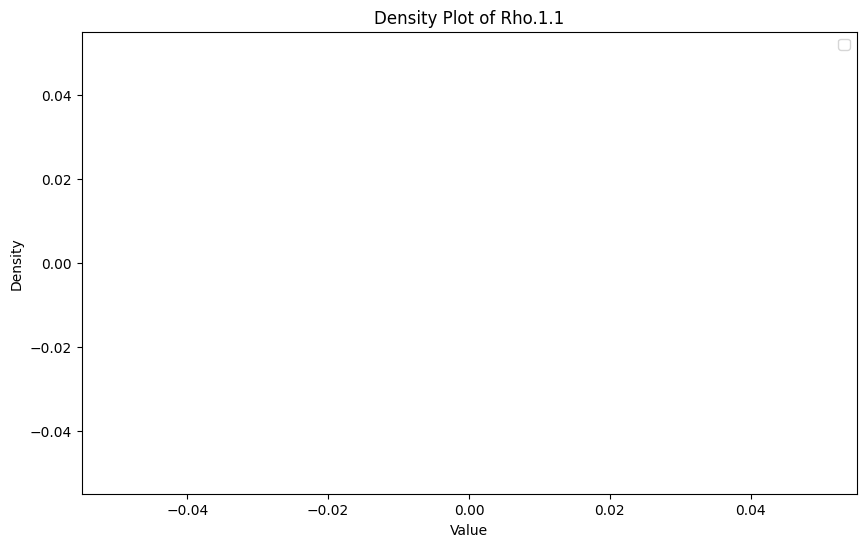

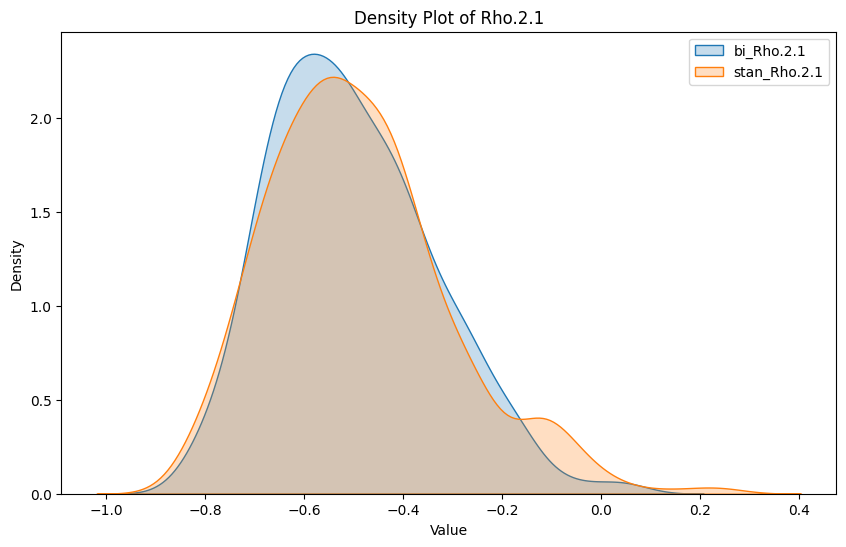

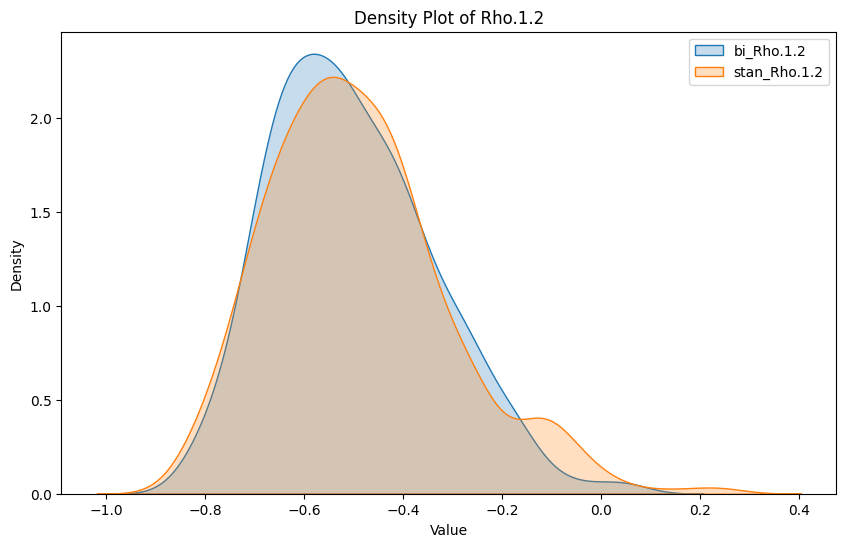

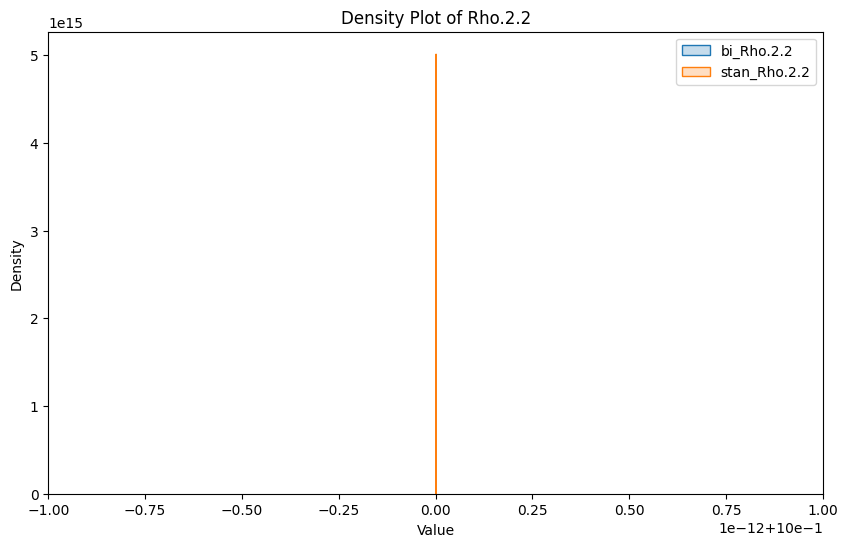

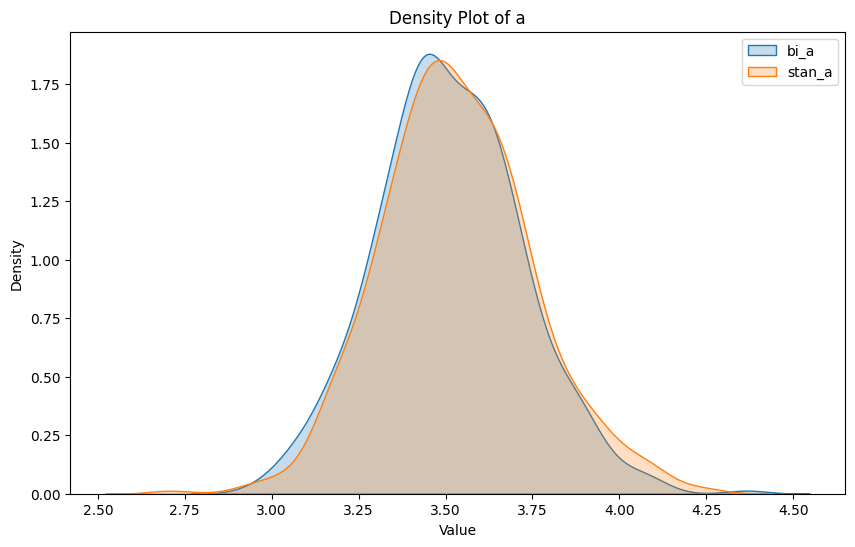

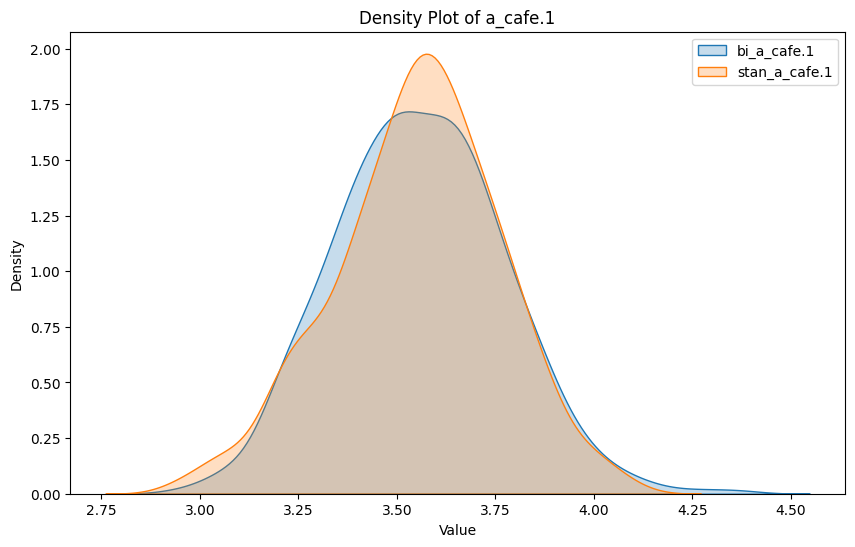

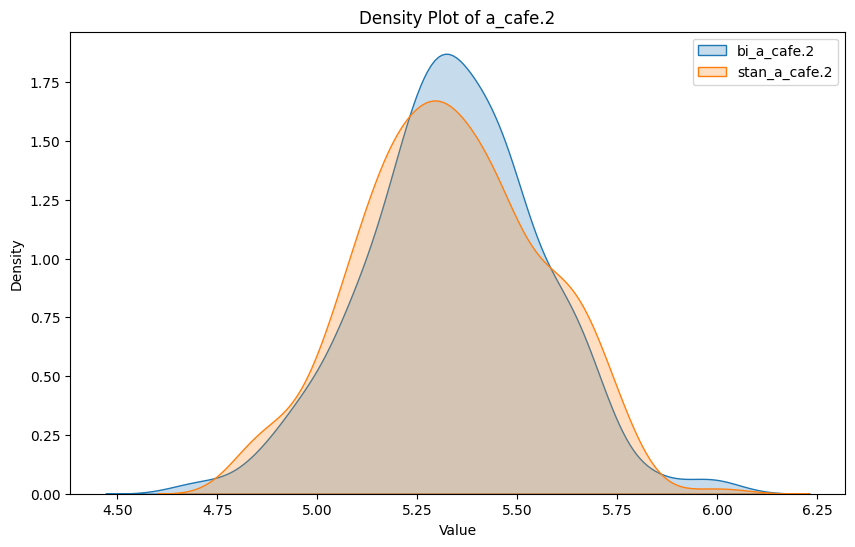

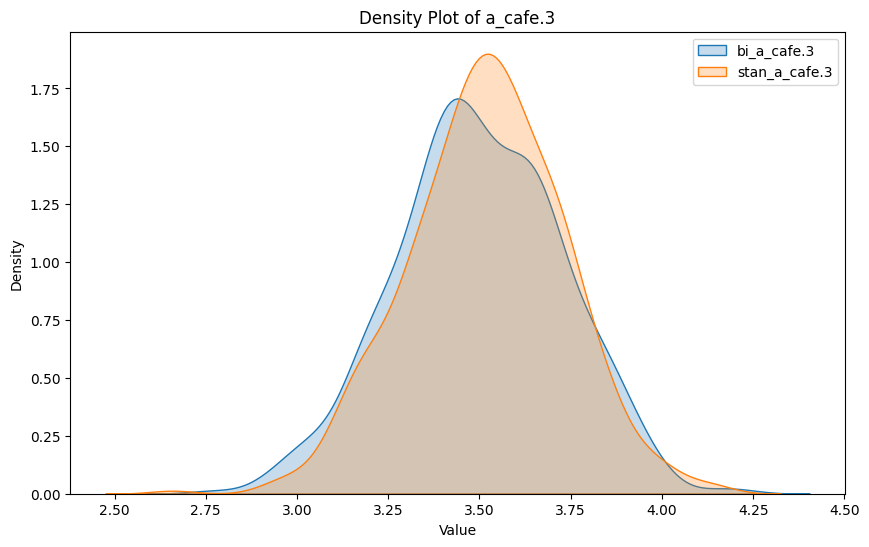

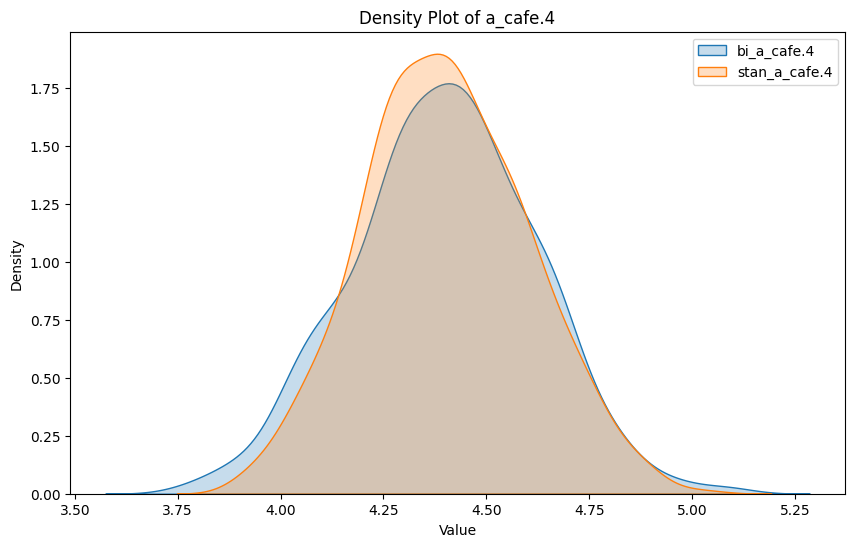

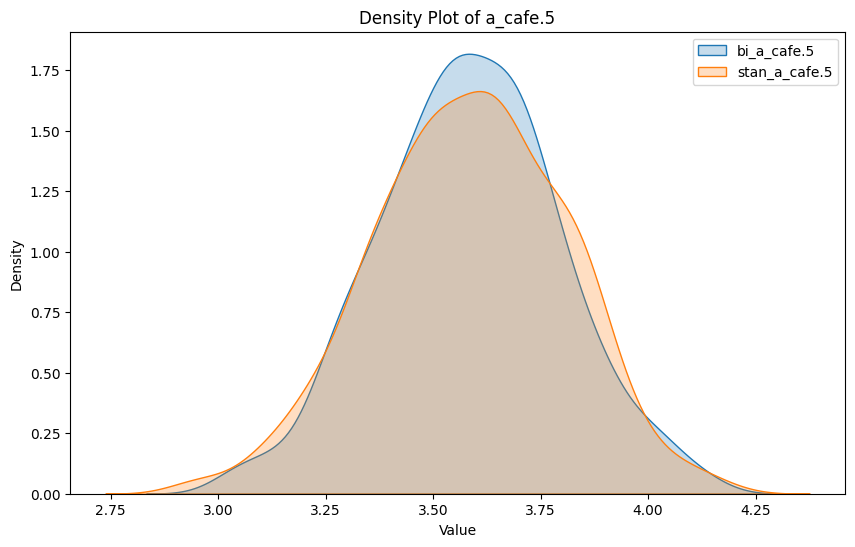

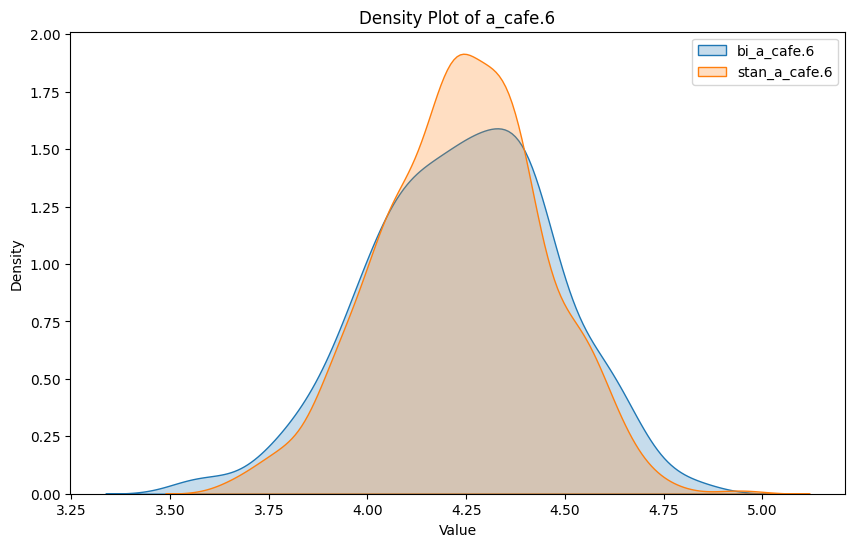

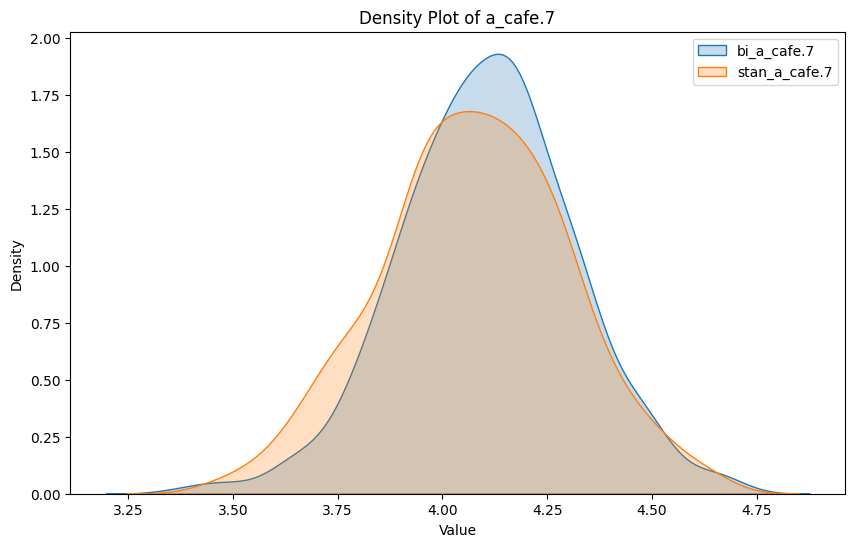

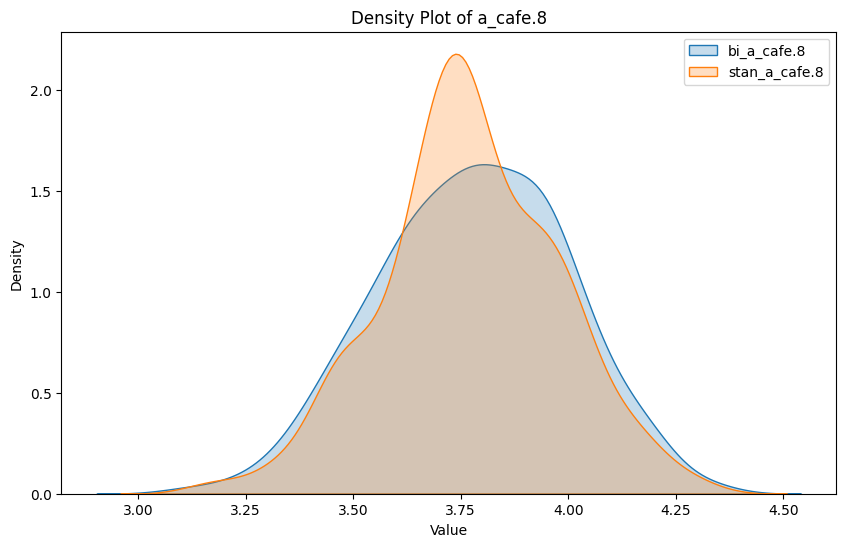

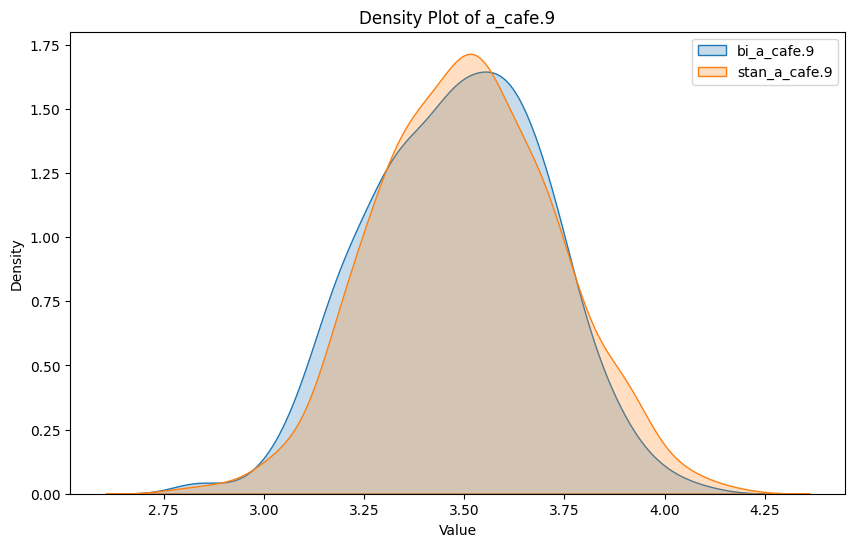

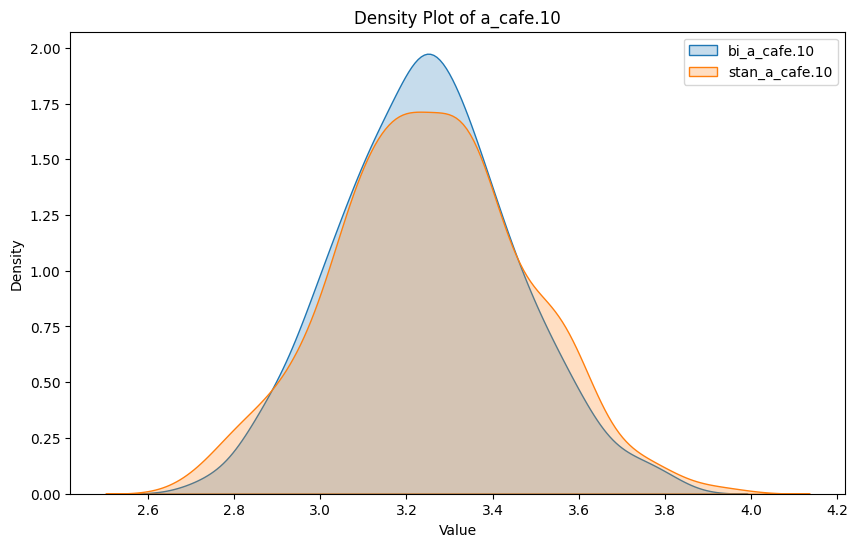

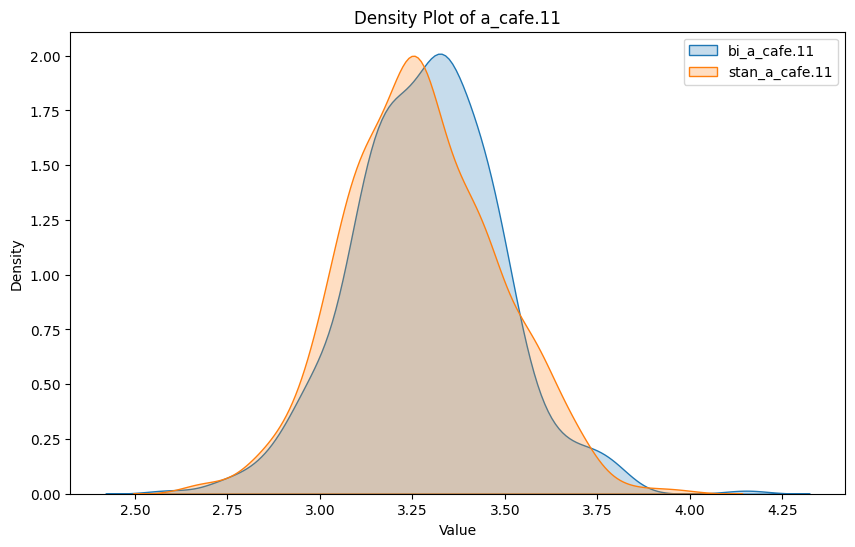

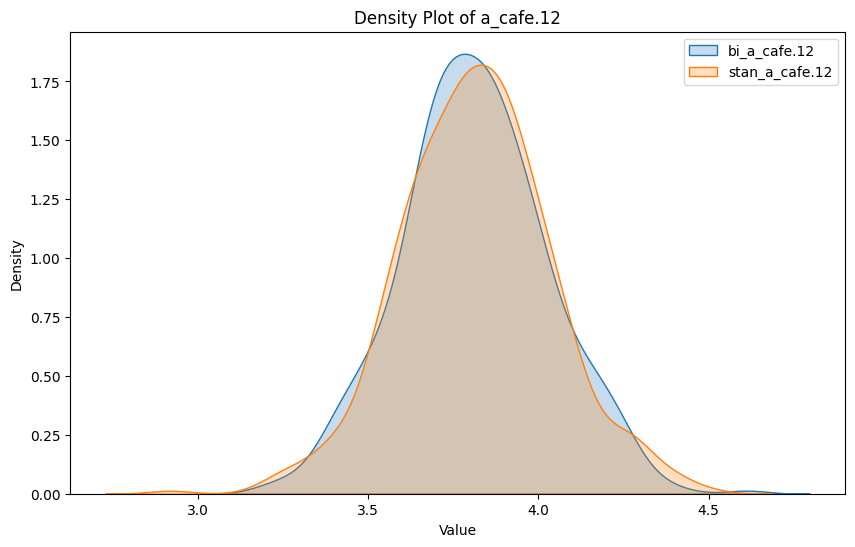

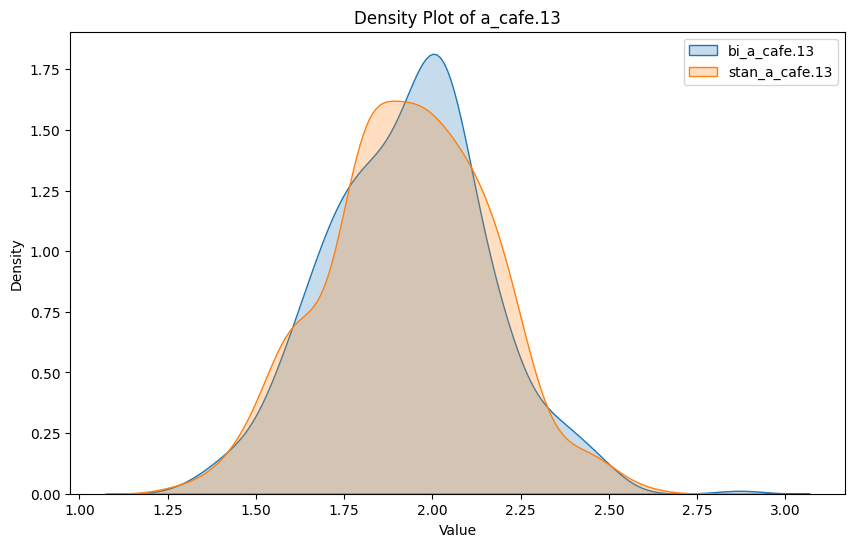

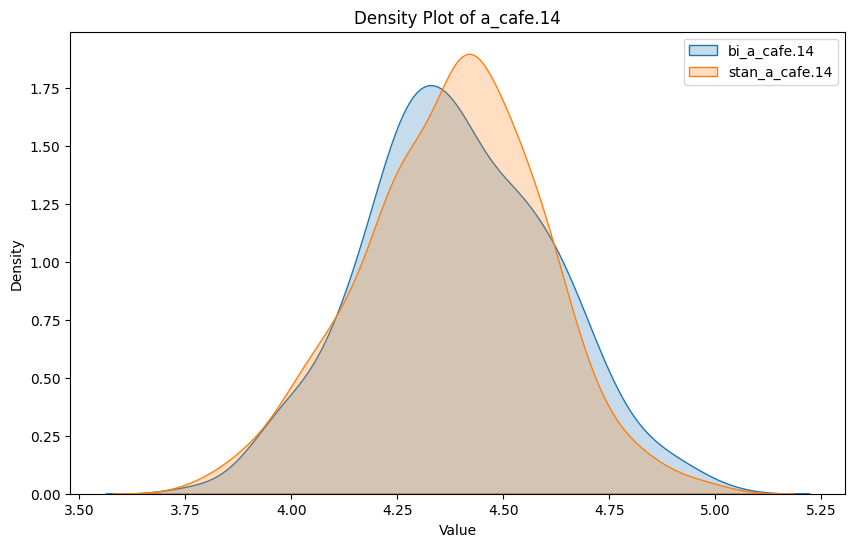

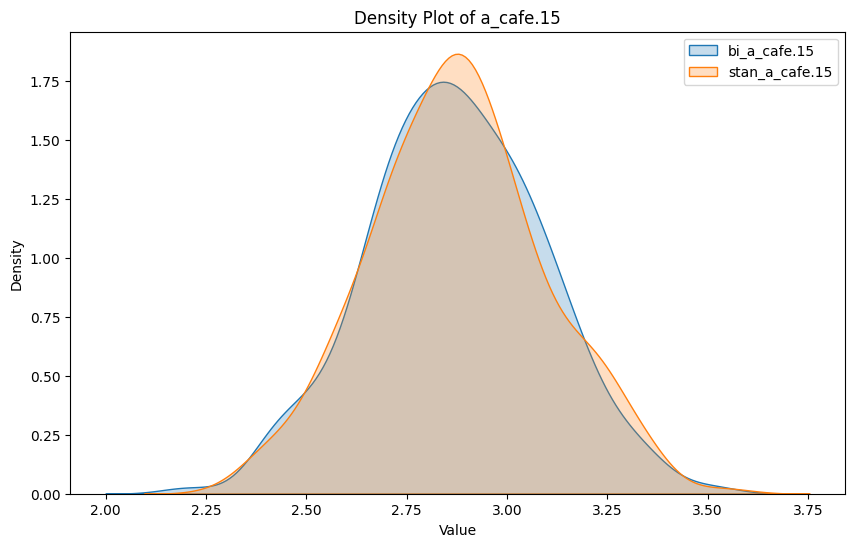

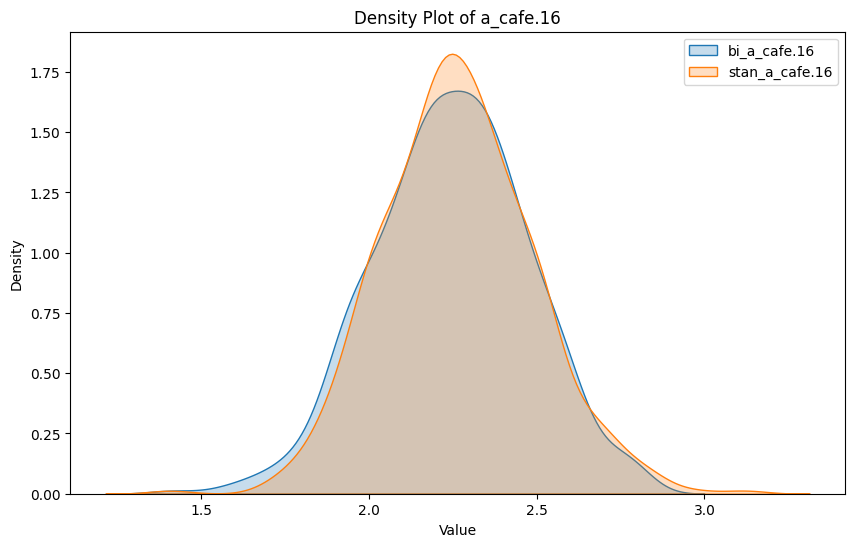

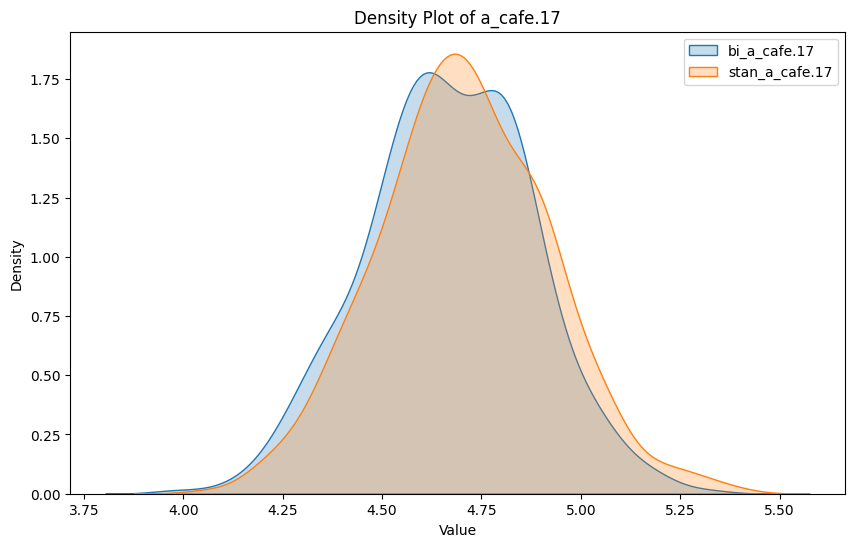

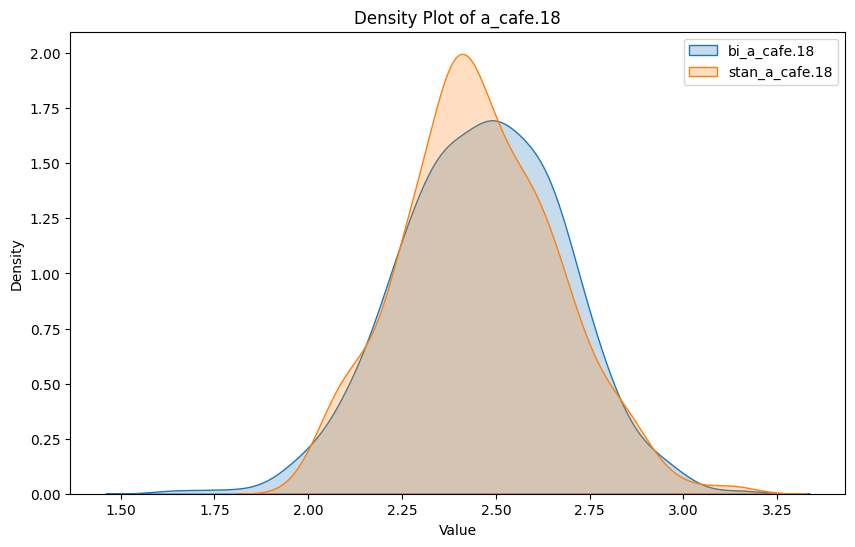

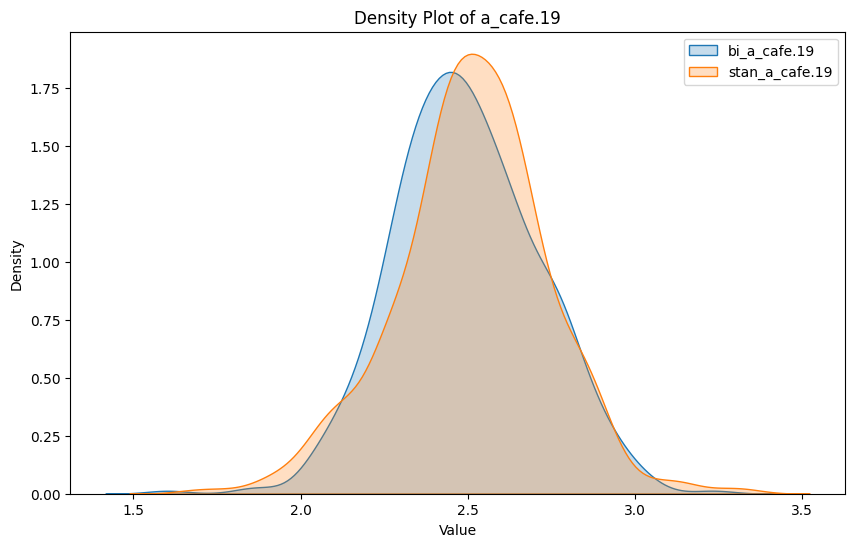

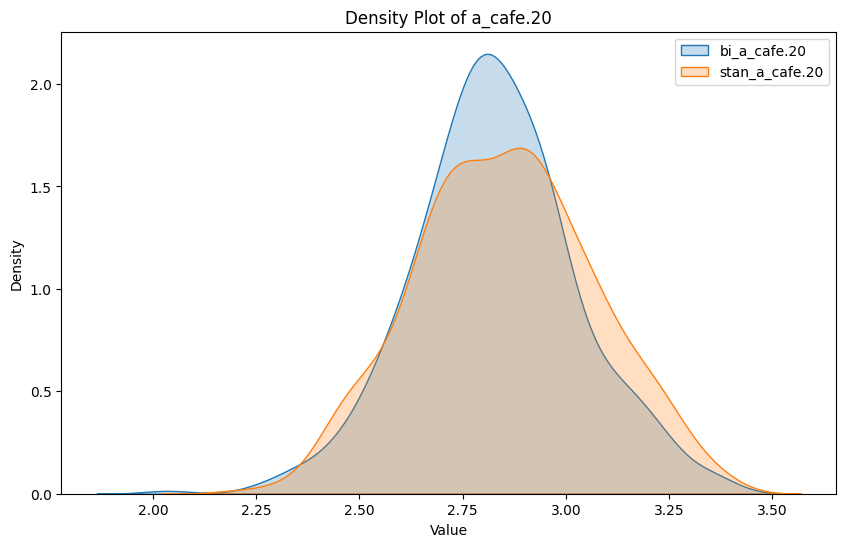

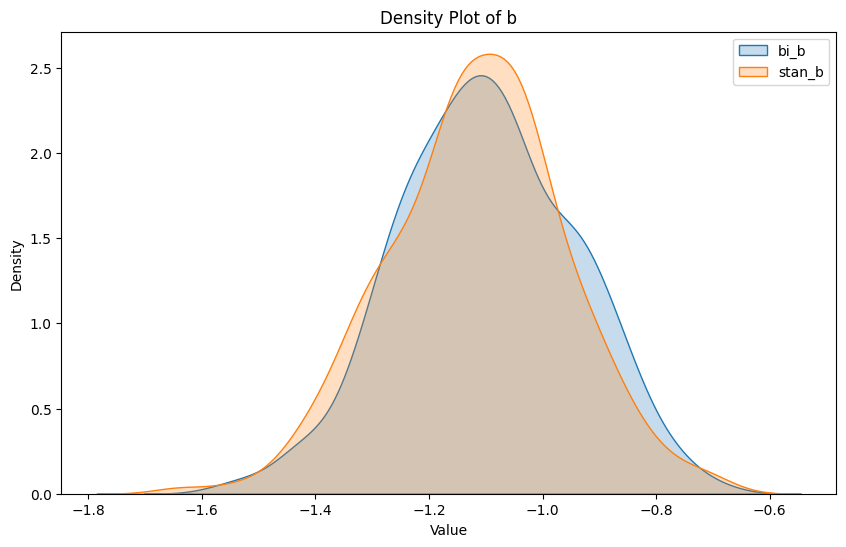

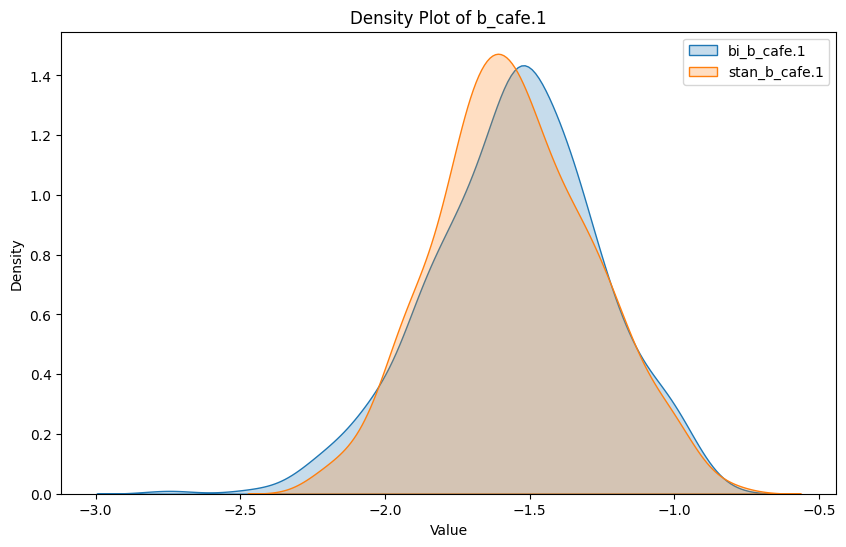

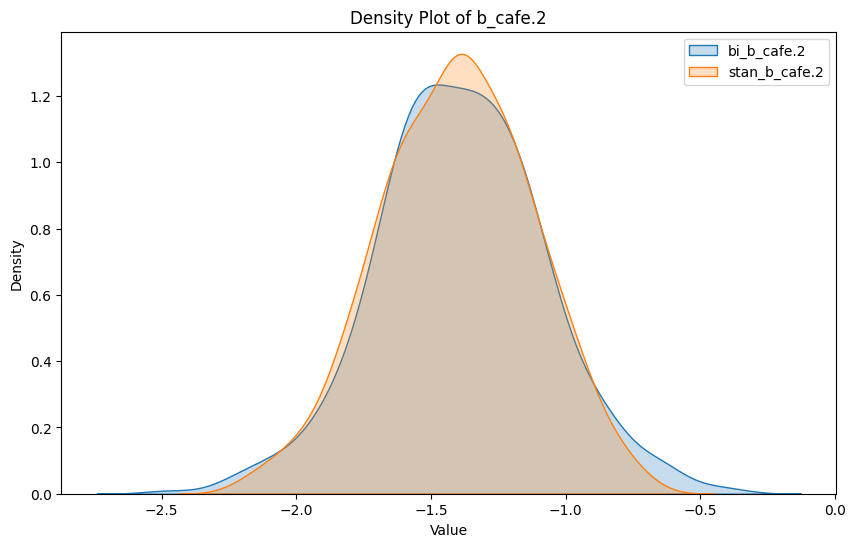

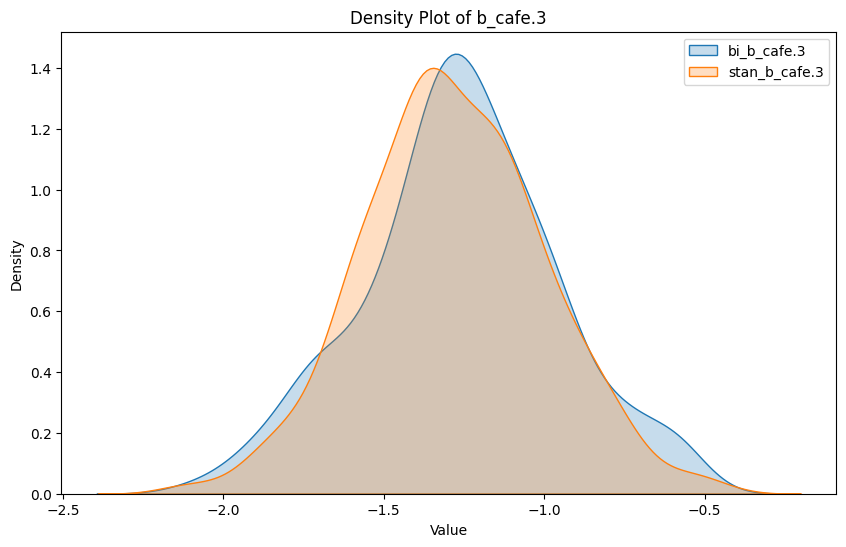

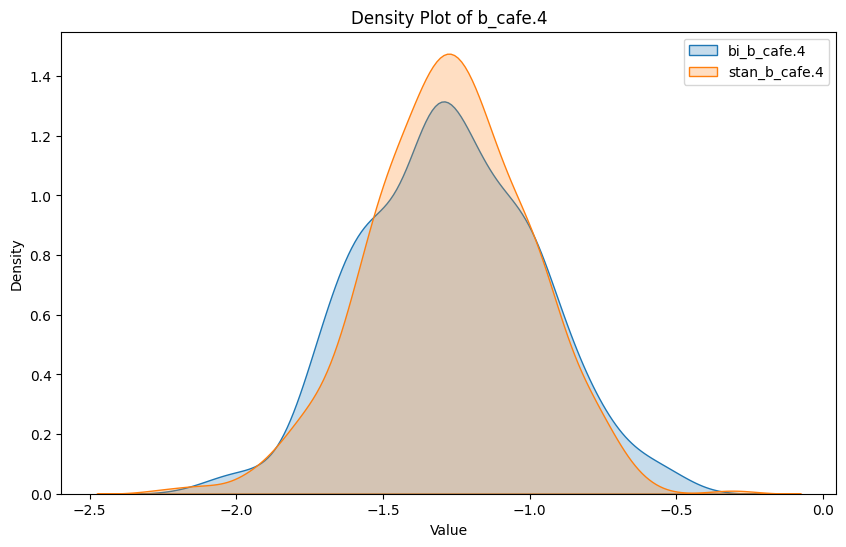

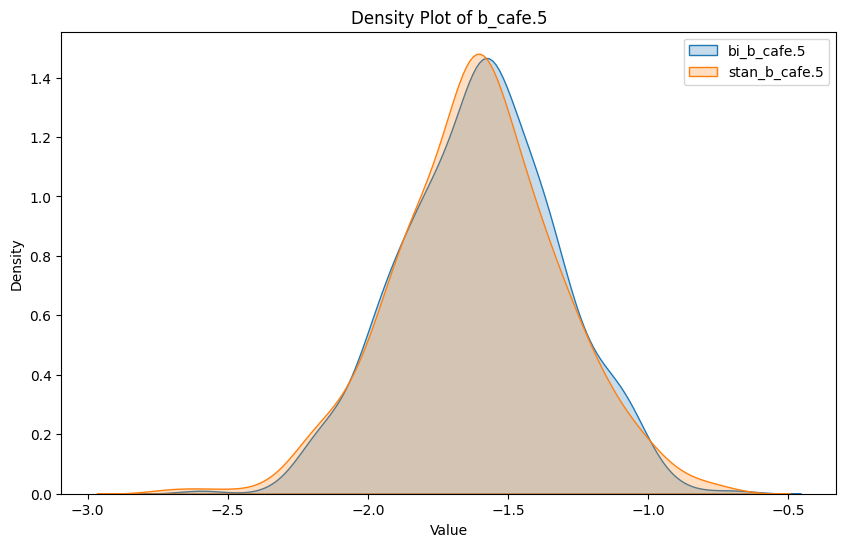

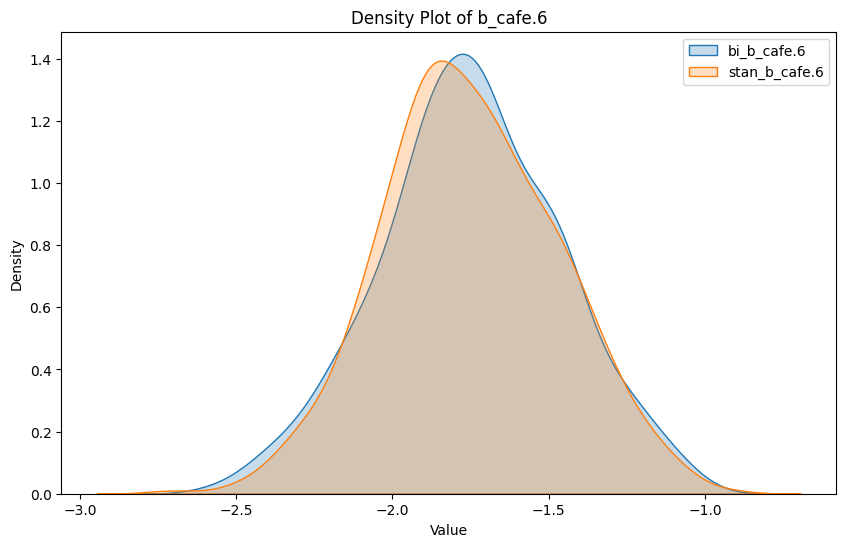

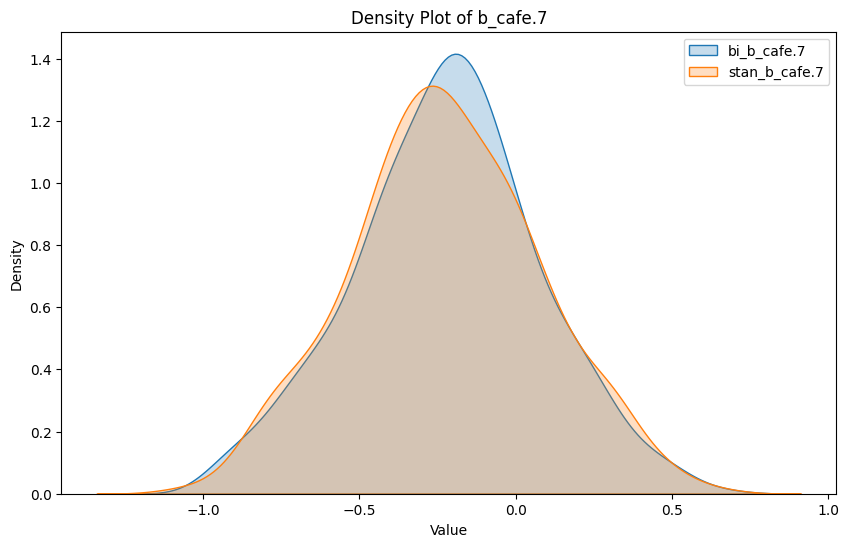

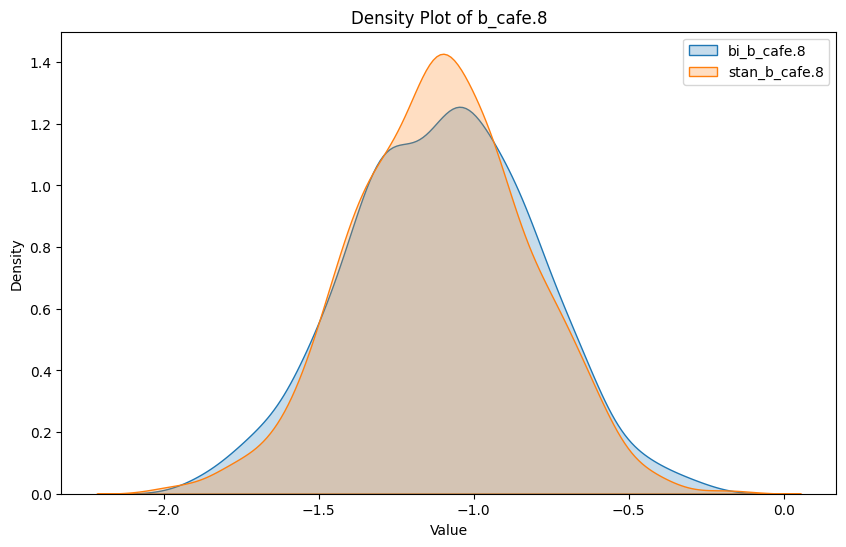

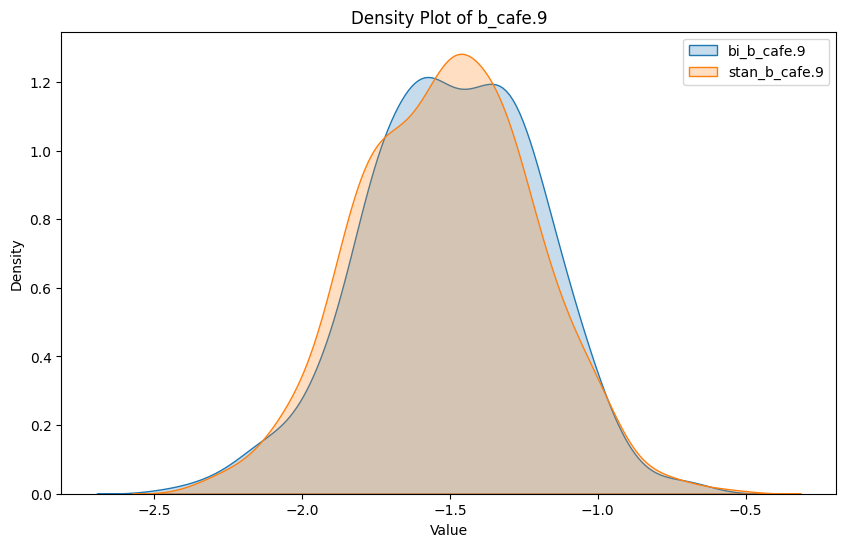

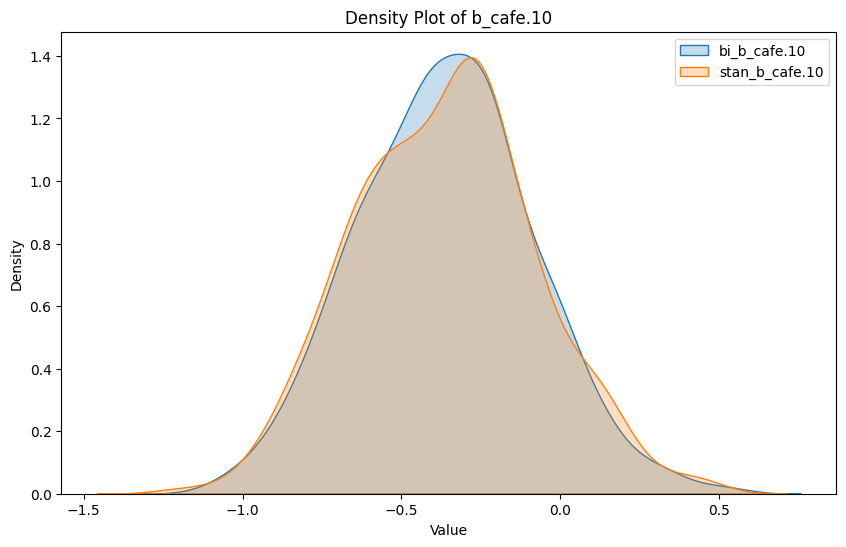

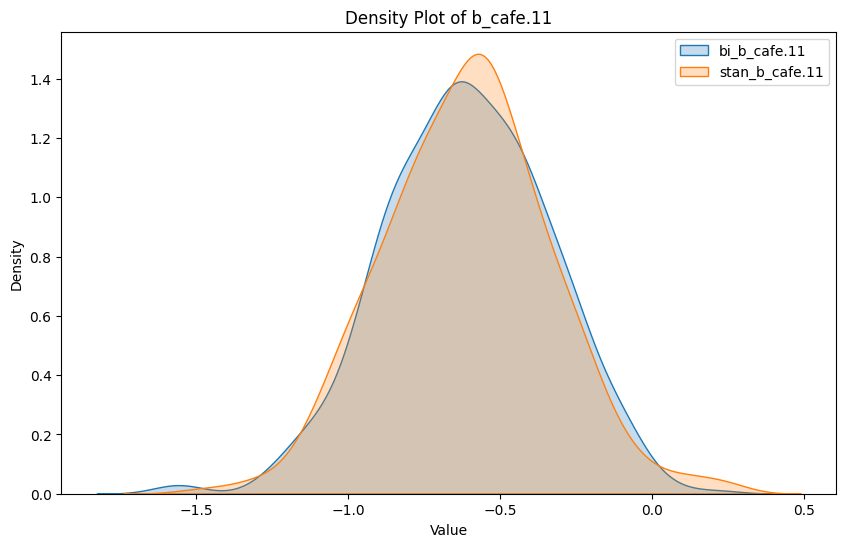

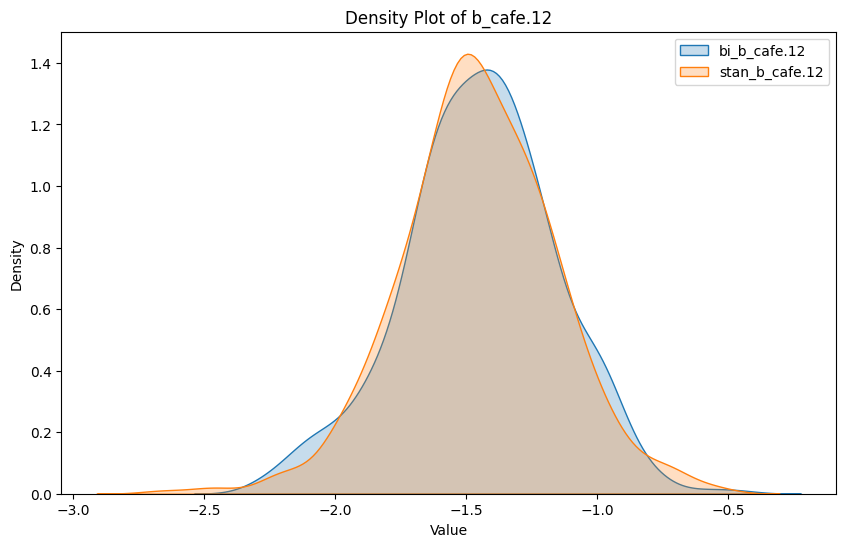

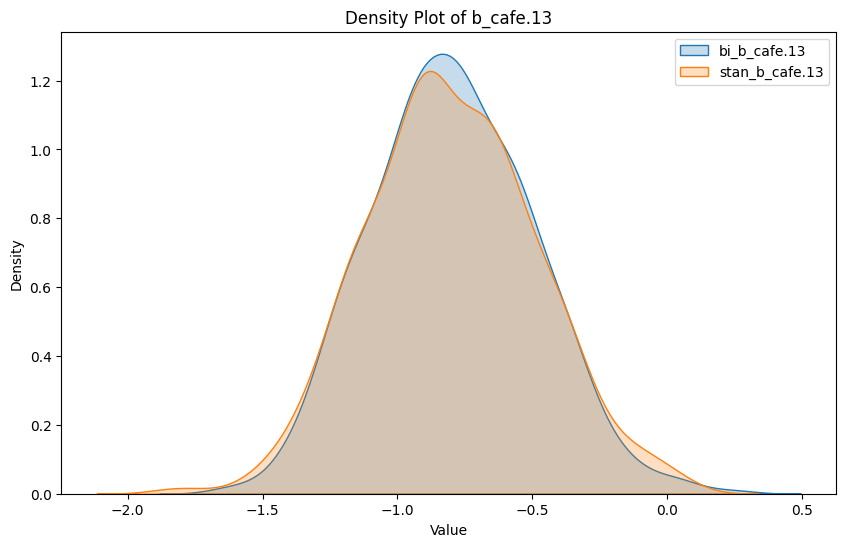

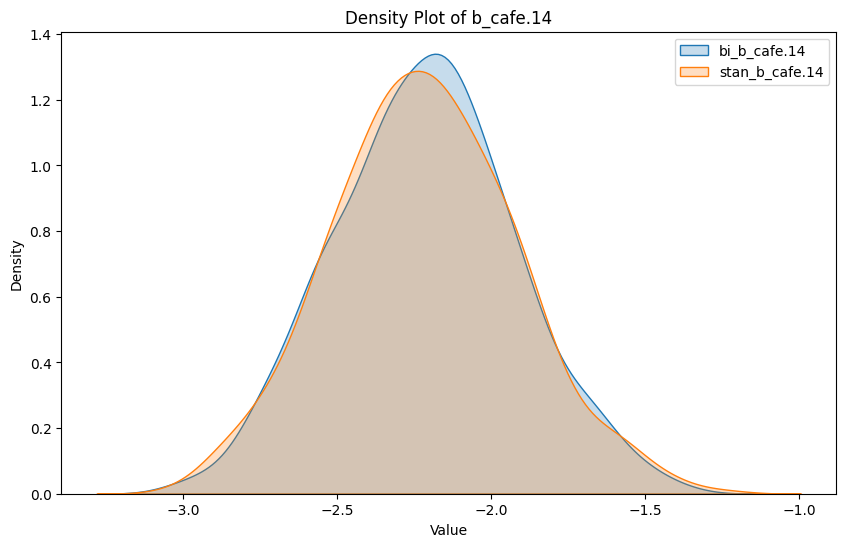

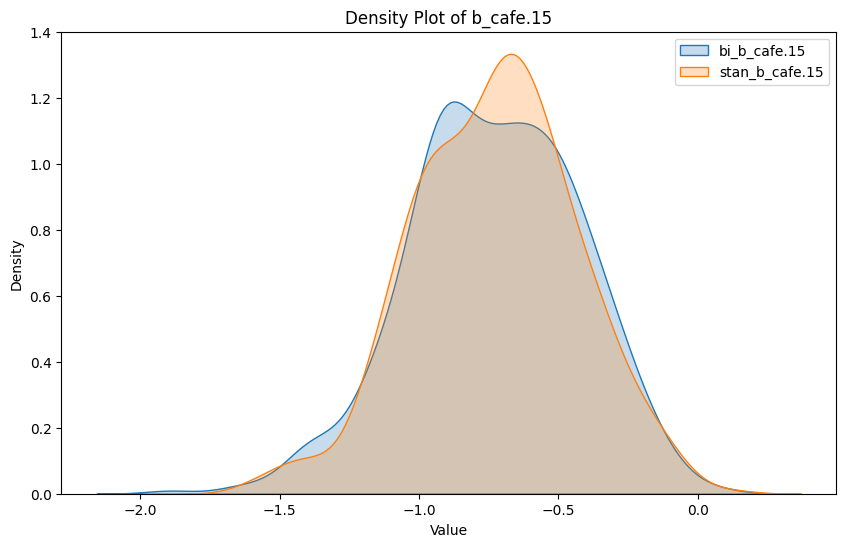

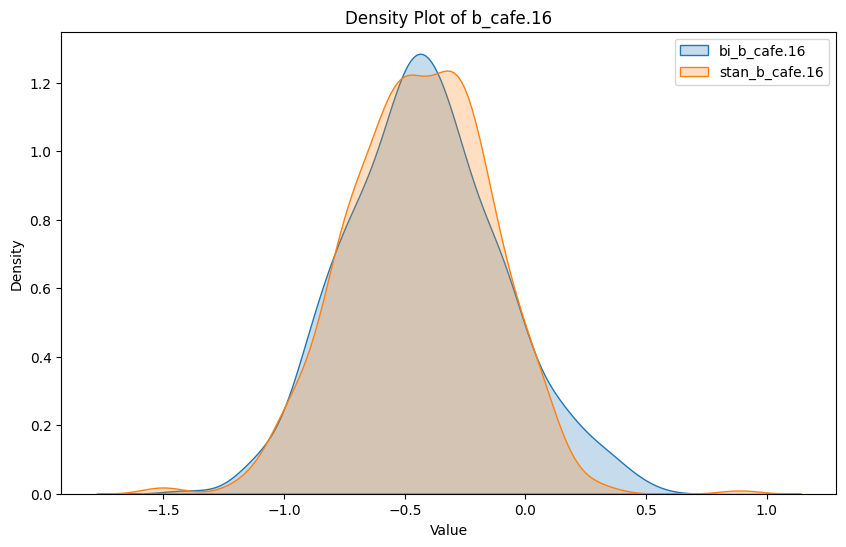

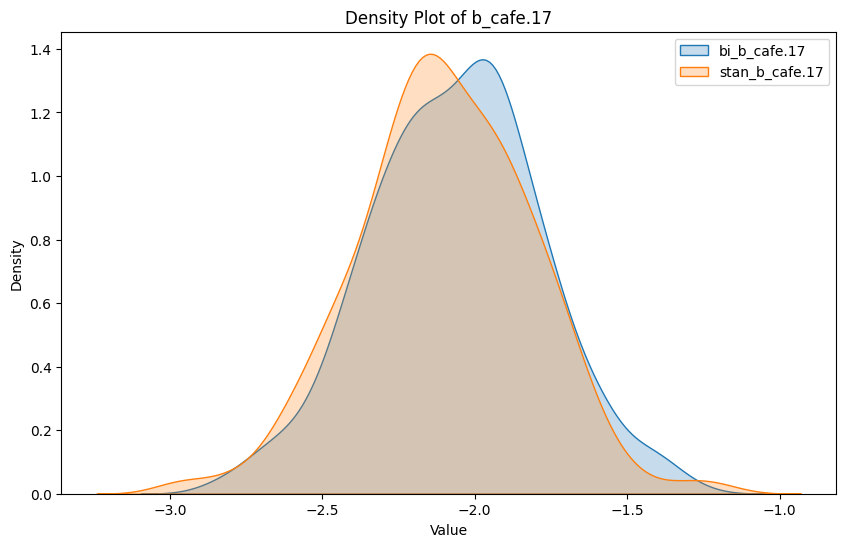

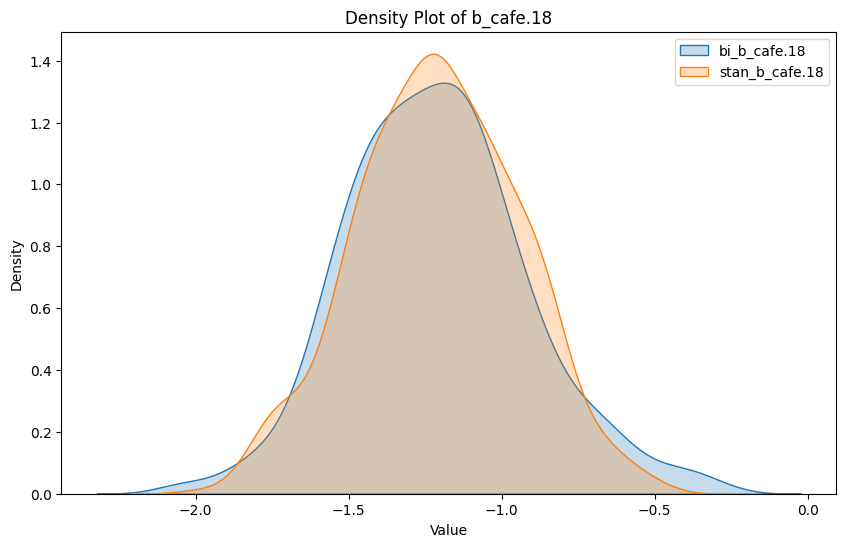

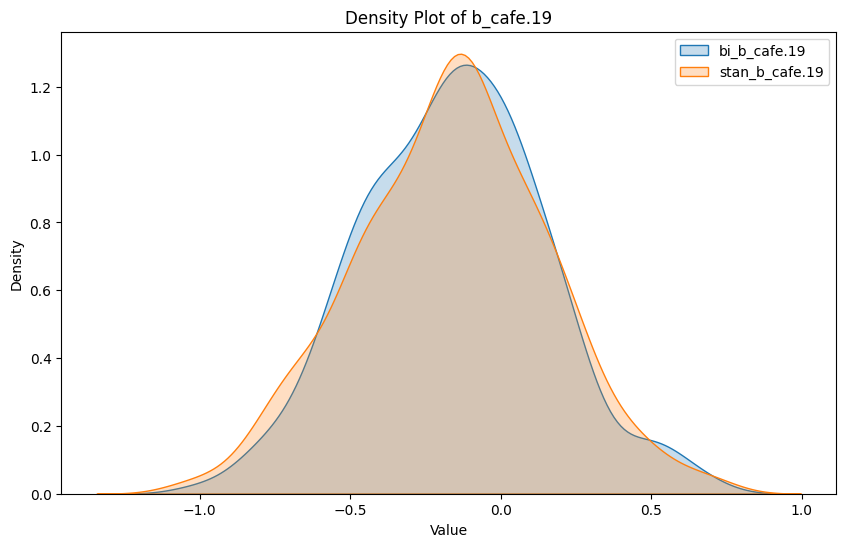

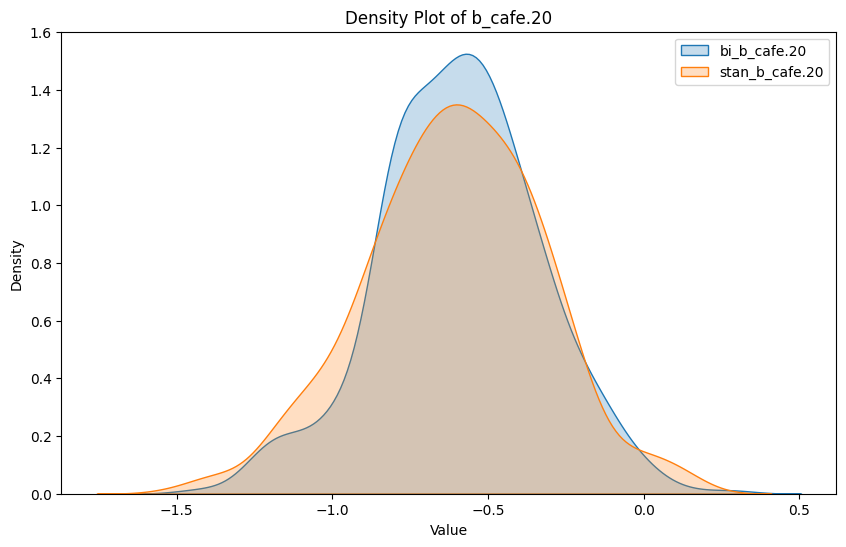

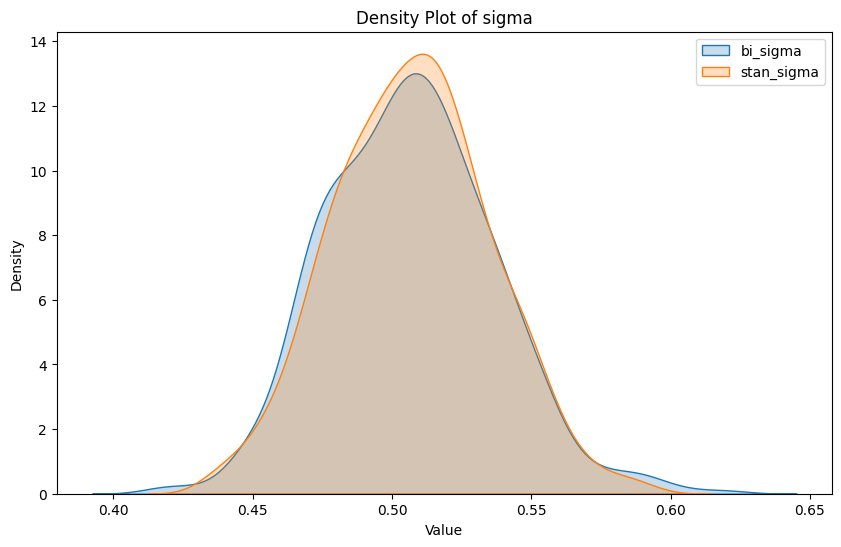

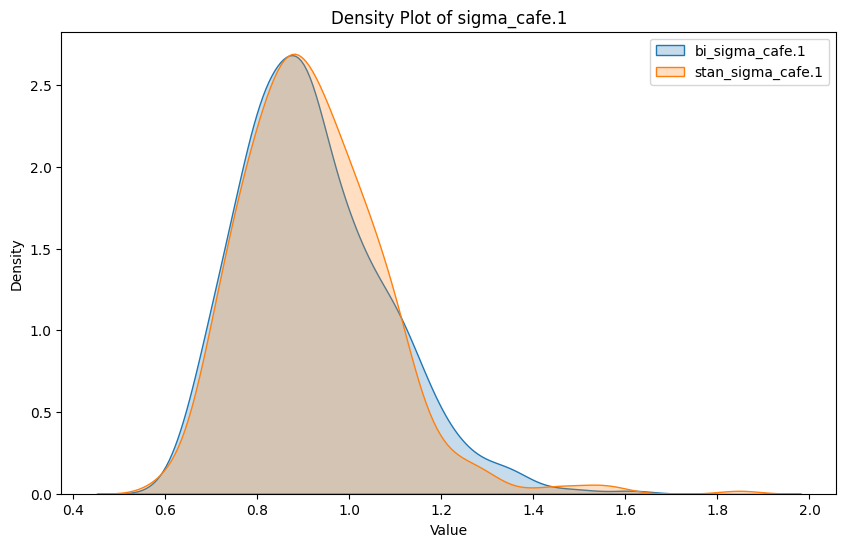

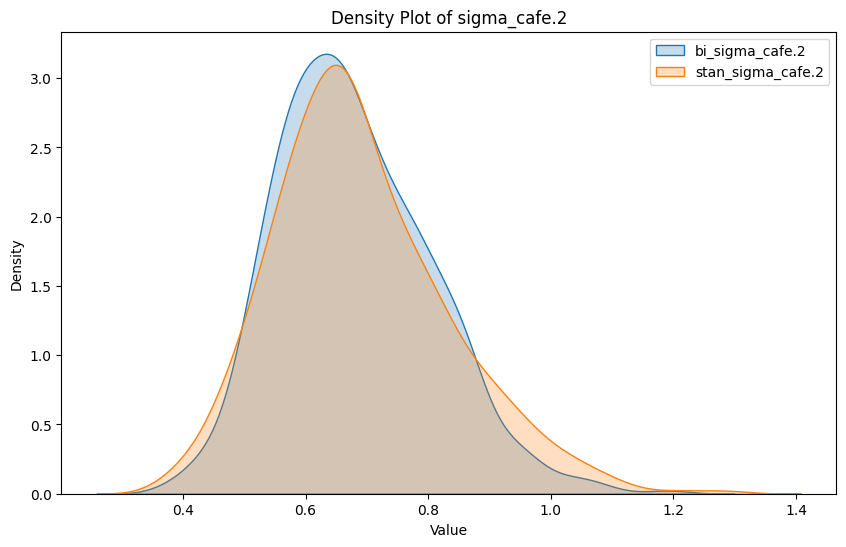

In [ ]:
def slice_array_to_dict(array, name="slice"):

    _, dim2, dim3 = array.shape
    
    # Create the dictionary
    slices_dict = {
        f"{name}_{i}_{j}": array[:, i, j]
        for i in range(dim2)
        for j in range(dim3)
    }
    
    return slices_dict
def slice_array_to_dict_2(array, name="slice"):

    _, dim2  = array.shape
    
    # Create the dictionary
    slices_dict = {
        f"{name}_{i}": array[:, i]
        for i in range(dim2)
    }
    
    return slices_dict

# Change posteriors dictionary so that parameters  are in the same order as the data of stan
r = slice_array_to_dict(m.posteriors['Rho'], name="Rho")
a = dict(a=m.posteriors['a'])
b = dict(b=m.posteriors['b'])
sigma = dict(sigma=m.posteriors['sigma'])
a_cafe = slice_array_to_dict_2(m.posteriors['a_b_cafe'][:,:,0], name="a_cafe")
b_cafe = slice_array_to_dict_2(m.posteriors['a_b_cafe'][:,:,1], name="b_cafe")
sigma_cafe_1 = dict(sigma_cafe_1=m.posteriors['sigma_cafe'][:, 0])
sigma_cafe_2 = dict(sigma_cafe_2=m.posteriors['sigma_cafe'][:, 1])
r.update(a)
r.update(a_cafe)
r.update(b)
r.update(b_cafe)
r.update(sigma)
r.update(sigma_cafe_1)
r.update(sigma_cafe_2)
m.posteriors=r
d = prepare_stan_data(df)
df_bi = prepare_bi_data(m)

# Plot the density of the parameters
df_bi.columns =d.columns
for col in df_bi.columns:
    if col in d.columns:  # Ensure the column exists in both DataFrames
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
        sns.kdeplot(d[col], label=f'stan_{col}', fill=True)

        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {col}')
        plt.legend()

        # Show the plot
        plt.show()

### <a id='toc2_13_6_'></a>[Parameter recovery](#toc0_)

In [ ]:
def model(cafe, wait, N_cafes, afternoon):
    a = m.dist.normal(5, 2, name = 'a')
    b =  m.dist.normal(-1, 0.5,  name = 'b')
    sigma_cafe =  m.dist.exponential(1, shape=(2,),  name = 'sigma_cafe')
    sigma =  m.dist.exponential( 1, name = 'sigma')
    Rho =  m.dist.lkj(2, 2, name = 'Rho')
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho
    a_cafe_b_cafe =  m.dist.multivariatenormal(jnp.stack([a, b]), cov, shape = [N_cafes], name = 'a_b_cafe')    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.dist.normal(mu, sigma, obs=wait)

def sim(N_cafes = 20, N_visits = 10, a = 3.5,b = -1, sigma_a = 1, sigma_b = 0.5, rho = -0.7 ):
    Mu = jnp.array([a,b])
    
    cov_ab = sigma_a * sigma_b *  rho
    
    Sigma = jnp.array([[sigma_a**2, cov_ab], [cov_ab, sigma_b**2]])
    
    jnp.array([1, 2, 3, 4]).reshape(2, 2).T
    
    sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
    
    Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

    # now matrix multiply to get covariance matrix
    Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)

    seed = jax.random.PRNGKey(5)  # used to replicate example
    vary_effects = m.dist.multivariatenormal(Mu, Sigma, shape=(N_cafes,), sample = True)
    a_cafe = vary_effects[:, 0]
    b_cafe = vary_effects[:, 1]

    seed = jax.random.PRNGKey(22)
    afternoon = jnp.tile(jnp.arange(2), N_visits * N_cafes // 2)
    cafe_id = jnp.repeat(jnp.arange(N_cafes), N_visits)
    mu = a_cafe[cafe_id] + b_cafe[cafe_id] * afternoon
    sigma = 0.5  # std dev within cafes
    wait =  m.dist.normal(mu, sigma, sample = True)
    d = pd.DataFrame(dict(cafe=cafe_id, afternoon=afternoon, wait=wait))
    return d

def estimate(N_cafes = 20, N_visits = 10, a = 3.5,b = -1,sigma_a = 1, sigma_b = 0.5, rho = -0.7):
    d = sim(N_cafes,N_visits , a, b, sigma_a, sigma_b, rho)
    m = bi(print_devices_found=False)
    m.data_on_model = dict(
        cafe = d.cafe.values, 
        wait = d.wait.values, 
        N_cafes = len(d.cafe.unique()),
        afternoon =d.afternoon.values
    )

    m.fit(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4, sharey=False, sharex = False)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(nsim, N_cafes = 20, N_visits = 10, a = 3.5,b = -1,sigma_a = 1, sigma_b = 0.5, rho = -0.7 ):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(N_cafes = N_cafes, N_visits = N_visits,a = a[i], b = b[i], sigma_a = sigma_a[i], sigma_b = sigma_b[i], rho = rho[i])
        estimations_filtered = estimations.loc[estimations.index.isin(['Rho[0, 1]', 'a', 'b', 'sigma_cafe[0]', 'sigma_cafe[1]'])] # Selecting paramters from model
        data = {'sim': np.repeat(i, len(estimations_filtered.values)), 
                'parameter': estimations_filtered.index, 
                'simulated' : jnp.array([Rho[i],  a[i], b[i], sigma_a[i], sigma_b[i]]), 
                'estimations': estimations_filtered.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
nsim = 100
a =  m.dist.normal(0, 1, shape= (nsim,), name = 'a', sample=True).tolist()
b =  m.dist.normal(0, 0.5, shape=(nsim,), name = 'b', sample=True).tolist()
sigma_cafe =  m.dist.exponential(1, shape=(nsim,2), name = 'sigma_cafe', sample=True)
Rho =  m.dist.beta(2, 5, shape=(nsim,), name = 'b', sample=True).tolist()
sigma_a =  sigma_cafe[:,0].tolist()
sigma_b = sigma_cafe[:,1].tolist()
i=0
#sim(N_cafes = 20, N_visits = 10, a = a[i],b = b[i],sigma_a = sigma_a[i], sigma_b = sigma_b[i], rho = Rho[i] )
#estimations = estimate(a = a[1], b = b[1], sigma_a = sigma_a[1], sigma_b = sigma_b[1], rho = Rho[1])
param_recovery(nsim = nsim, N_cafes = 20, N_visits = 10, a =a, b = b, sigma_a =  sigma_cafe[:,0], sigma_b = sigma_cafe[:,1], rho = Rho)

## <a id='toc2_14_'></a>[Gaussian Processes](#toc0_)

### <a id='toc2_14_1_'></a>[BI](#toc0_)

In [ ]:
import jax
@jax.jit
def cov_GPL2(x, sq_eta, sq_rho, sq_sigma):
    """
    Computes the covariance matrix for a Gaussian Process using the 
    squared exponential kernel, version L2 (squared Euclidean distance).

    Args:
        x: Distance matrix between points.
        sq_eta: Squared variance parameter (eta^2).
        sq_rho: Squared length scale parameter (rho^2).
        sq_sigma: Squared noise variance parameter (sigma^2).

    Returns:
        K: Covariance matrix incorporating the squared exponential kernel, version L2.
    """
    N = x.shape[0]
    K = sq_eta * jnp.exp(-sq_rho * jnp.square(x))
    K = K.at[jnp.diag_indices(N)].add(sq_sigma)
    return K


In [ ]:
from BI import bi, jnp

import numpyro
m = bi(platform='cpu')
m.data(data_path + 'Kline2.csv', sep=";")
islandsDistMatrix = pd.read_csv(data_path + 'islandsDistMatrix.csv', index_col=0)
m.data_to_model(['total_tools', 'population'])
m.data_on_model["society"] = jnp.arange(0,10)# index observations
m.data_on_model["Dmat"] = islandsDistMatrix.values # Distance matrix


def model(Dmat, population, society, total_tools):
    a = m.dist.exponential(1, name = 'a')
    b = m.dist.exponential(1, name = 'b')
    g = m.dist.exponential(1, name = 'g')

    # non-centered Gaussian Process prior
    etasq = m.dist.exponential(2, name = 'etasq')
    rhosq = m.dist.exponential(0.5, name = 'rhosq')
    SIGMA = cov_GPL2(Dmat, etasq, rhosq, 0.01)
    k = m.dist.multivariatenormal(0, SIGMA, name = 'k')
    #k = m.gaussian.gaussian_process(Dmat, etasq, rhosq, 0.01, shape = (10,))
    k = m.gaussian.kernel_L2(Dmat, etasq, rhosq, 0.01)
    lambda_ = a * population**b / g * jnp.exp(k[society])

    m.dist.poisson(lambda_, obs=total_tools)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500) 
m.summary()

Parameters k are correlated between them, so order of comparison can't be found as they are interchangeable. 

### <a id='toc2_14_2_'></a>[BIR](#toc0_)

In [ ]:
%%R

pd=import('pandas')
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(data_path,"/Kline2.csv", sep = ''), sep=';')
islandsDistMatrix = pd$read_csv(paste(system.file(package = "BI"),"/data/islandsDistMatrix.csv", sep = ''), index_col=as.integer(0))
m$data_to_model(list('total_tools', 'population'))
m$data_on_model$society = jnp$arange(0,10, dtype='int64')
m$data_on_model$Dmat = jnp$array(islandsDistMatrix)


# Define model ------------------------------------------------
model <- function(Dmat, population, society, total_tools){
  a = bi.dist.exponential(1, name = 'a')
  b = bi.dist.exponential(1, name = 'b')
  g = bi.dist.exponential(1, name = 'g')
  
  # non-centered Gaussian Process prior
  etasq = bi.dist.exponential(2, name = 'etasq')
  rhosq = bi.dist.exponential(0.5, name = 'rhosq')
  z = bi.dist.normal(0,1, name = 'z', shape = c(10))
  r = m$kernel_sq_exp(Dmat, z, etasq, rhosq, 0.01)
  SIGMA = r[[1]]
  L_SIGMA = r[[2]]
  k = r[[3]]
  lambda_ = a * population**b / g * jnp$exp(k[society])
  bi.dist.poisson(lambda_, obs=total_tools)
}

# Run MCMC ------------------------------------------------
m$fit(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


### STAN

In [ ]:
import time as tm
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """ 
functions{
  matrix cov_GPL2(matrix x, real sq_alpha, real sq_rho, real delta) {
    int N = dims(x)[1];
    matrix[N, N] K;
    for (i in 1:(N-1)) {
      K[i, i] = sq_alpha + delta;
      for (j in (i + 1):N) {
        K[i, j] = sq_alpha * exp(-sq_rho * square(x[i,j]) );
        K[j, i] = K[i, j];
      }
    }
    K[N, N] = sq_alpha + delta;
    return K;
  }
}

data{
  array[10] int T;
  array[10] int society;
  array[10] int P;
  matrix[10,10] Dmat;
}

parameters{
 real<lower=0> a;
 real<lower=0> b;
 real<lower=0> etasq;
 real<lower=0> g; 
 real<lower=0> rhosq;
 vector[10] k;
}

model{
  vector[10] lambda;
  matrix[10,10] SIGMA;
  rhosq ~ exponential( 0.5 );
  etasq ~ exponential( 2 );
  a ~ exponential( 1 );
  b ~ exponential( 1 );
  g ~ exponential( 1 );

  SIGMA = cov_GPL2(Dmat, etasq, rhosq, 0.01);
  k ~ multi_normal( rep_vector(0,10) , SIGMA );
  for ( i in 1:10 ) {
    lambda[i] = (a * P[i]^b/g) * exp(k[society[i]]);
  }
  T ~ poisson( lambda );
}
"""

data = {
    'T' : m.df["total_tools"].values.astype(int),
    'P' : m.df["population"].values.astype(int),
    'society' : np.array(m.data_on_model['society']+1).astype(int),
    'Dmat' : np.array(islandsDistMatrix)
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

### Output comparison

In [ ]:
plot_comparaison(m, df)

### Parameter recovery
